# Introduction

This notebook explains how I can go about explore and prepare data for model building. The notebook is structured in the following way

- 1. About Dataset
- 2. Data Summary
- 3. Exploratory Data Analysis
- 4. Data Preparation
  - 4.1. Duplicate Rows Analysis
  - 4.2. Missing Value Analysis
    - 4.2.1 Analyze Missing values
    - 4.2.2 Imputing Missing values
  - 4.3 Outlier Analysis
    - 4.3.1 Drop Outliers
    - 4.3.2 Using BOX-COX to convert skewed distributions 
    - 4.3.3 Using Standardization to standardize numerical variables
  - 4.4 Discretization/Binning
  - 4.5 Derivable variables
- 5. Re-run Exploraatory Data Analysis
- 6. Create and Select Features
- 7. Logistic Regression Model
  - 7.1 Split train set and test set
  - 7.2 Solve Imbalanced train set
  - 7.3 Using Logistic Regression to predict response variable
- 8. Conclusion
- 9. References

# 1. About Dataset

#### **Overview**

The data set I will be using is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines.

#### **Data Fields**

|Attribute | Description|
| :--- | :--- |
|0. INDEX                |Unique Id | 
|1. TARGET                |Response Variable (indicates # of cases of wine sold) | 
|2   FixedAcidity                |FixedAcidity of the wine | 
|3   VolatileAcidity                |Volatile acid content of the wine | 
|4   CitricAcid                |Citric Acid content of the wine| 
|5   ResidualSugar                |Residual sugar content of the wine| 
|6   Chlorides                |Chloride content of the wine | 
|7   FreeSulfurDioxide                |Sulfur Dioxide content of the wine | 
|8   TotalSulfurDioxide                |Total sulfur dioxide content of the wine | 
|9   Density                |Density of the wine | 
|10  pH                |pH of the wine | 
|11  Sulphates                |Sulfate content of the wine | 
|12  Alcohol               |Alcohol Content | 
|13  LabelAppeal  |Subjective marketing score that indicates the appeal of the design of the label on the bottle|
|14  AcidIndex               |Measures total acidity of wine via a weighted average | 
|15  STARS  |Wine rating as determined by experts (4 = excellent; 1 = Poor) | 

### The research for attributes of wine.

From https://winefolly.com/deep-dive/understanding-acidity-in-wine/, I learnt that Acids are one of 4 fundamental traits in wine (the others are tannin, alcohol, and sweetness).

- #### FixedAcidity: **<font color = red>It is an important fundamental trait</font>**

https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity

I convert them to:
  - 0 - 6 g/L : low acid
  - 6 - 10 g/L : mid acid
  - 10 - max g/L : high acid

- #### VolatileAcidity 

https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity

https://en.wikipedia.org/wiki/Wine_fault

The sensory threshold for acetic acid in wine is >700 mg/L, with concentrations greater than 1.2-1.3 g/L becoming unpleasant.
  - less than 0.7 g/L : taste no-acid
  - 0.7 - 1.3 g/L : taste good
  - large than 1.3 g/L : taste unpleasant
  
- #### Citric acid

https://www.randoxfood.com/why-is-testing-for-citric-acid-important-in-winemaking/

Within the EU citric acid can only be used for stabilisation purposes and final citric acid content should not exceed 1g/L.

  - less than 1 g/L good
  - large than 1 g/L bad

- #### ResidualSugar:  **<font color = red>It is an important fundamental trait</font>**

https://alfredsommelier.com/en/everything-there-is-to-know-about-residual-sugar-in-wine/

The residual sugar is the quantity of sugar left in the wine after the fermentation process. To summarize, 
  - 0 - 4 g/L : dry wine
  - 4 - 12 g/L : semi-dry wine 
  - 12 - 45 g/L : semi-sweet wine
  - 45 - max g/L : sweet wine


- #### Chlorides

https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?lang=en

  - 0 - 0.2 g/L good
  - 0.2 - 0.607 g/L acceptable
  - 0.607 - max g/L bad


- #### FreeSulfurDioxide

I can not find the relevant information. The data set has a TotalSulfurDioxide attribute that contains the FreeSulfurDioxide. I will ignore FreeSulfurDioxide, but I will use TotalSulfurDioxide for my study.

- #### TotalSulfurDioxide

https://waterhouse.ucdavis.edu/whats-in-wine/sulfites
https://www.oiv.int/public/medias/7840/oiv-collective-expertise-document-so2-and-wine-a-review.pdf

  - 0 - 1 mg/L No Sulfites
  - 1 - 350 mg/L Contains Sulfites
  - 350 - max mg/L Don't buy

- #### Density

http://www.creativeconnoisseur.com/newsletter/files/497deafe6be1b2efc87df8ac6071e459-162.html
https://www.answers.com/Q/What_is_the_density_of_wine

Density of Water is 1.00

  - less than 1.0 yeast done / contain high alcohol / low sugar
  - large than 1.0 yeast not well / contain low alcohol / high sugar


- #### pH

https://www.winemag.com/2019/06/19/what-is-acidity-in-wine/
https://winefolly.com/deep-dive/understanding-acidity-in-wine/

  - 0 - 3 sweet whites
  - 3 - 3.1 light-bodied whites
  - 3.1 - 3.5 red & white wines
  - 3.5 - 4 low-acid red wines
  - 4 - max very low-acid red wines

- #### Sulphates

I will use TotalSulfurDioxide to present Sulphates. I will ignore Sulphates.


- #### Alcohol **<font color = red>It is an important fundamental trait</font>**

https://home.binwise.com/blog/wine-alcohol-content
https://winefolly.com/tips/the-lightest-to-the-strongest-wine/

  - 0 - 10% : Low Alcohol Wines
  - 10 - 11.5% : Medium-Low Alcohol Wines
  - 11.5 - 13.5% : Medium Alcohol Wines
  - 13.5 - 15% : Medium-High Alcohol Wines
  - 15 - over% : High Alcohol Wines

- #### AcidIndex

Measures total acidity of wine via a weighted average. The higher value, the higher acid.

I can not find useful knowledge, so I convert it into 3 equal-sized buckets.
 - Convert into 3 levels

In [1]:
# Import libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import math

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    preprocessing
)

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

#### Lets Read in the data set

In [2]:
# To load data from link and convert to a dataframe.
header_list = ['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity',
                   'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide',
                   'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol',
                   'LabelAppeal', 'AcidIndex', 'STARS']

df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/M3_Data.csv', names=header_list, header=0)

# 2. Data Summary
As a first step lets do three simple steps on the dataset

- Size of the dataset
- Get a glimpse of data by printing few rows of it.
- What type of variables contribute our data

#### Shape of the data set

In [3]:
df.shape

(12795, 16)

#### Sample of first few rows

In [4]:
df.head(5)

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


#### Variables Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

The STARS, Sulphates and other attributes have null values. I need deal with them in the cleaning step.

# 3. Exploraatory Data Analysis
- Using histogram to see the distribution of continuous variables and using boxplot to find out outliers.

- Using bar chart to see the categorical variables.

- Using correlation table and heatmap to see correlations for TARGET versus other variables.

In [6]:
# copy the data set, we do not need the INDEX column
wine_df = df.iloc[:,1:]
wine_df.head(3)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.16,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.16,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.64,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0


In [7]:
# To describe the data set
wine_df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


#### Using histogram to show continuous data

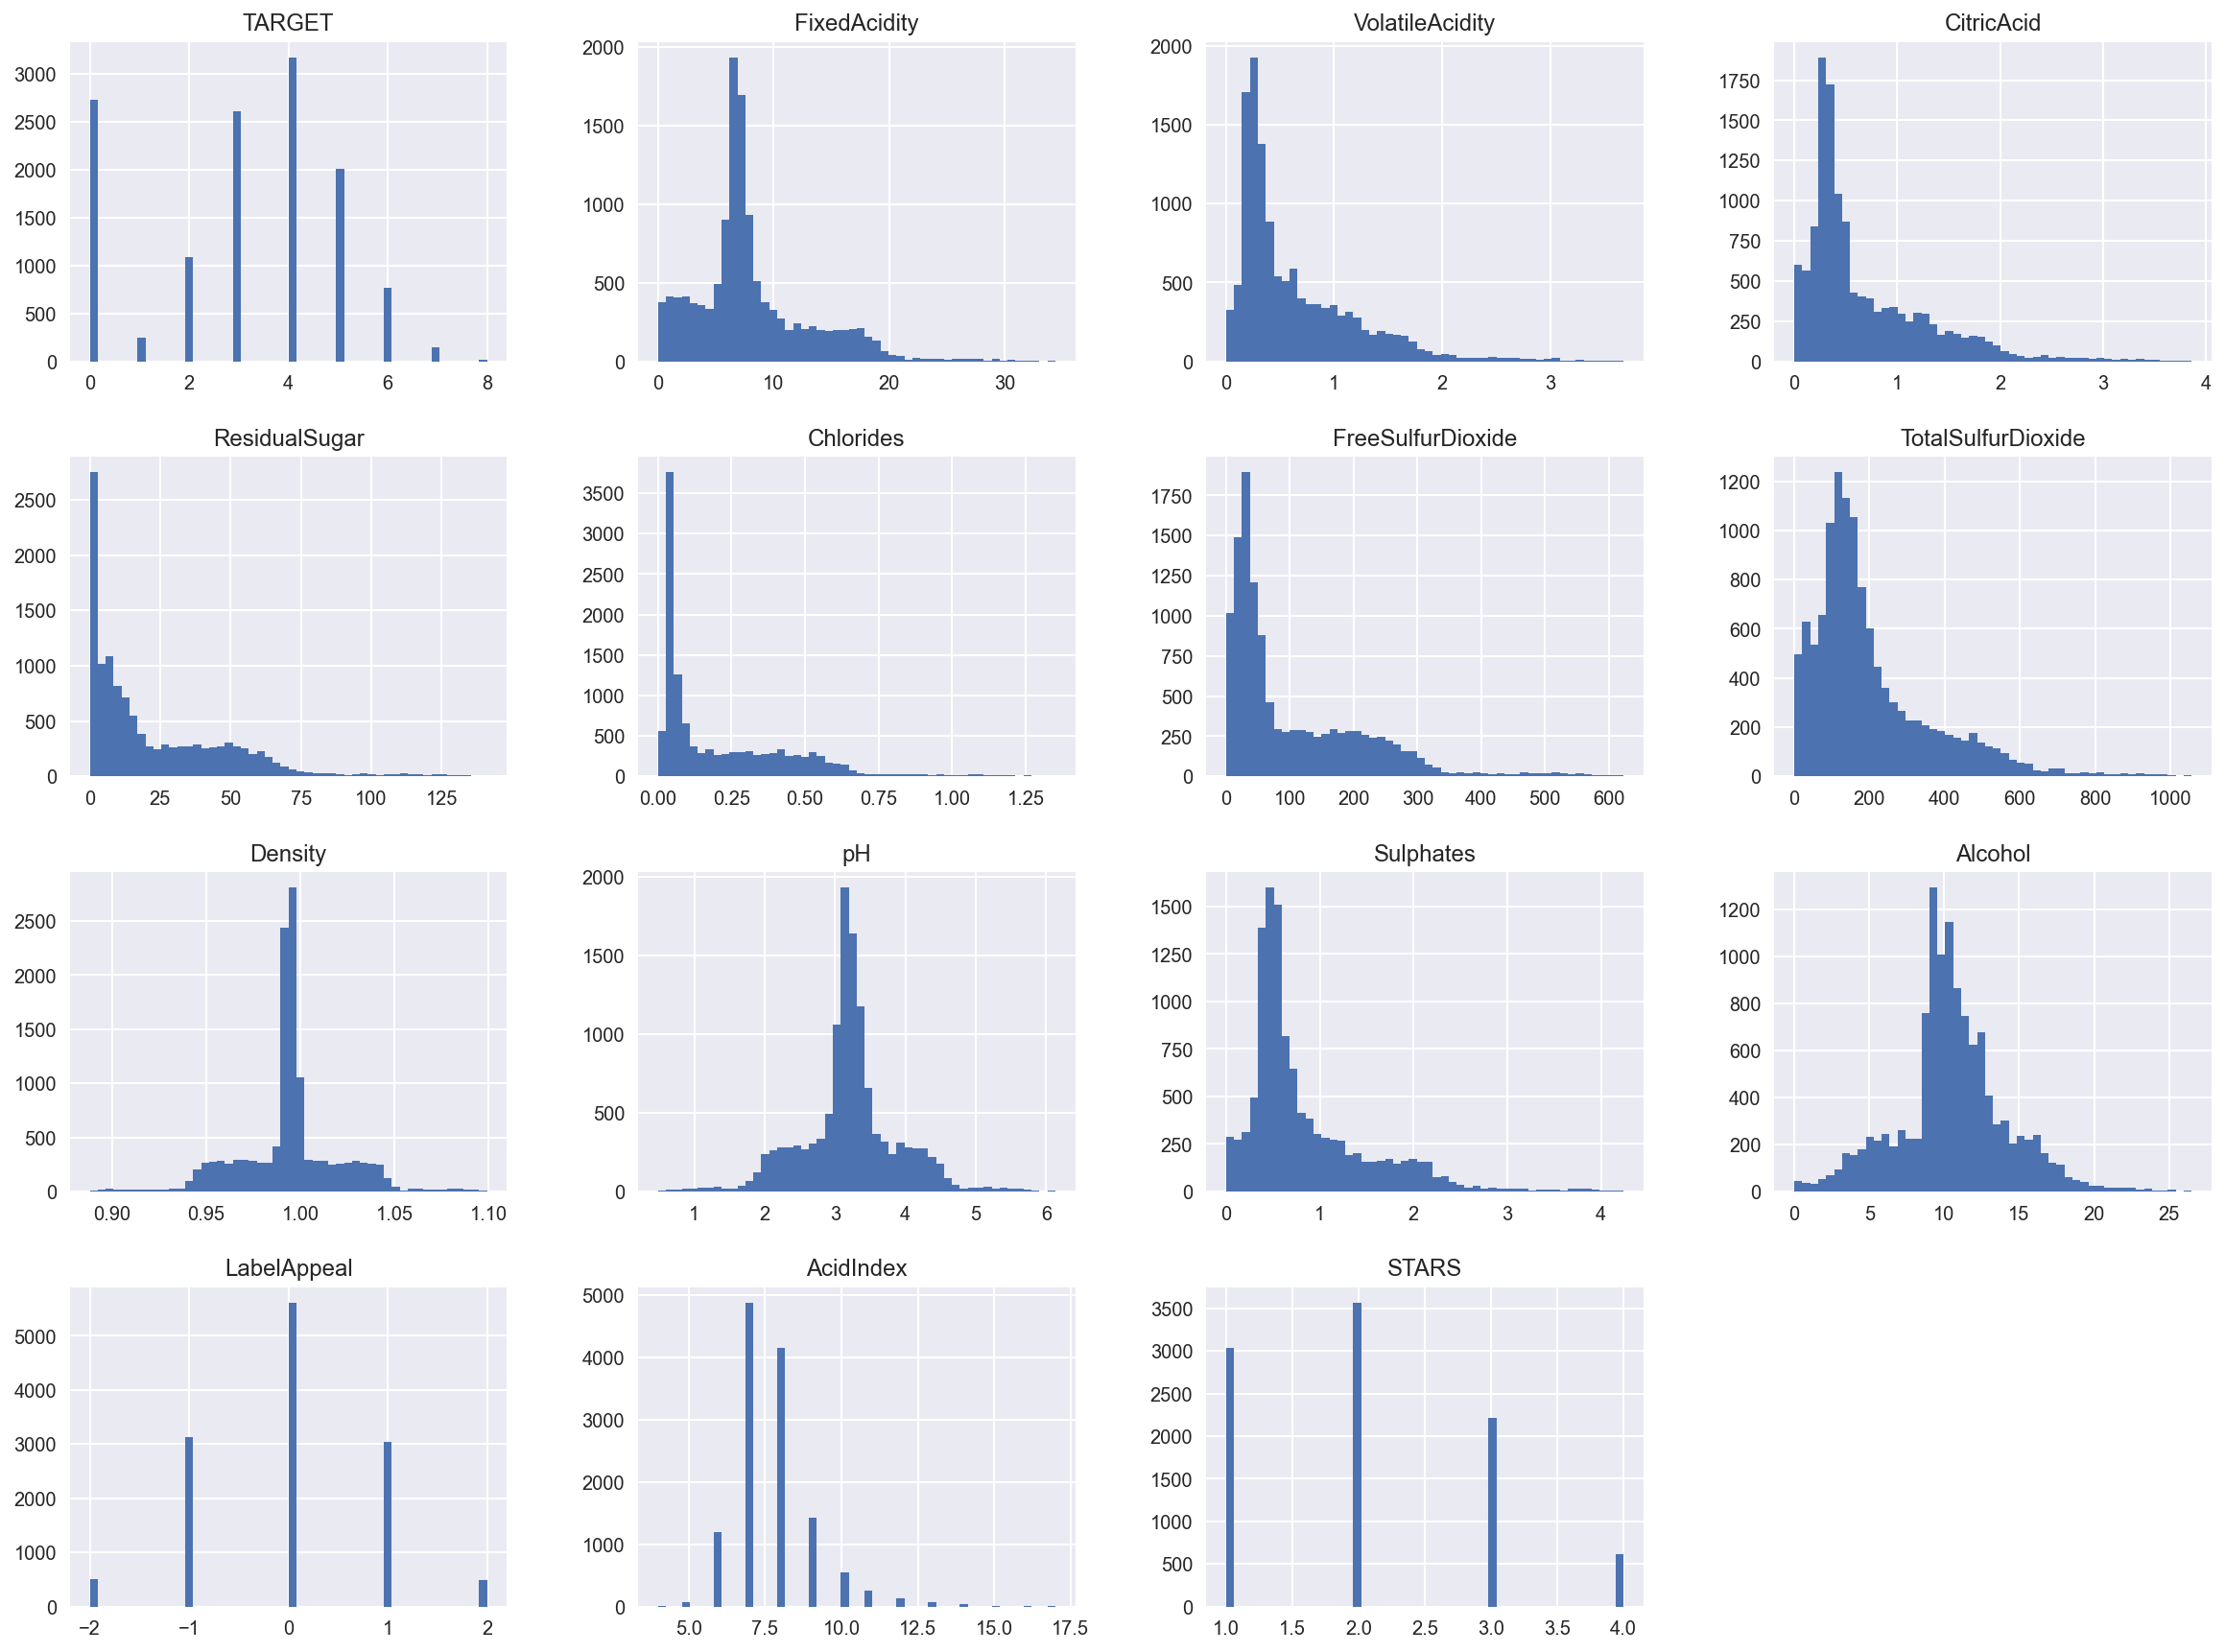

In [8]:
%matplotlib inline

wine_df.hist(bins=50, figsize=(20,15))
plt.show()

The above histogram and descriptive statistics show as following:

All numeric variables have obvious outliers. I will use box plot to show them.

'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'Sulphates', 'TotalSulfurDioxide', and 'AcidIndex' contain lot of outlier data points which skews the distribution towards right. They all have outliers.

'Density', 'pH', and 'Alcohol' show approximately normal distribution, but they all have outliers.

#### Select categorical variables and numeric variables
From the above histgram I select LabelAppeal and STARS as categorical variables.

In [9]:
categorical_cols = ['TARGET', 'LabelAppeal', 'STARS']
numeric_cols = ['FixedAcidity', 'VolatileAcidity',
                   'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide',
                   'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'AcidIndex']

In [10]:
#wine_df[categorical_cols] = wine_df[['LabelAppeal', 'STARS']].astype("category")

#### Using boxplot to find out outliers

In [11]:
def draw_boxpolt(wine_df):
    fig, axes = plt.subplots(nrows=3,ncols=4)
    fig.set_size_inches(20, 15)
    sns.boxplot(data=wine_df,y="FixedAcidity",orient="v",ax=axes[0][0])
    sns.boxplot(data=wine_df,y="VolatileAcidity",orient="v",ax=axes[0][1])
    sns.boxplot(data=wine_df,y="CitricAcid",orient="v",ax=axes[0][2])
    sns.boxplot(data=wine_df,y="ResidualSugar",orient="v",ax=axes[0][3])

    sns.boxplot(data=wine_df,y="Chlorides",orient="v",ax=axes[1][0])
    sns.boxplot(data=wine_df,y="FreeSulfurDioxide",orient="v",ax=axes[1][1])
    sns.boxplot(data=wine_df,y="TotalSulfurDioxide",orient="v",ax=axes[1][2])
    sns.boxplot(data=wine_df,y="Density",orient="v",ax=axes[1][3])

    sns.boxplot(data=wine_df,y="pH",orient="v",ax=axes[2][0])
    sns.boxplot(data=wine_df,y="Sulphates",orient="v",ax=axes[2][1])
    sns.boxplot(data=wine_df,y="Alcohol",orient="v",ax=axes[2][2])
    sns.boxplot(data=wine_df,y="AcidIndex",orient="v",ax=axes[2][3])

    #axes[0][0].set(ylabel='Count',title="Box Plot On Count")

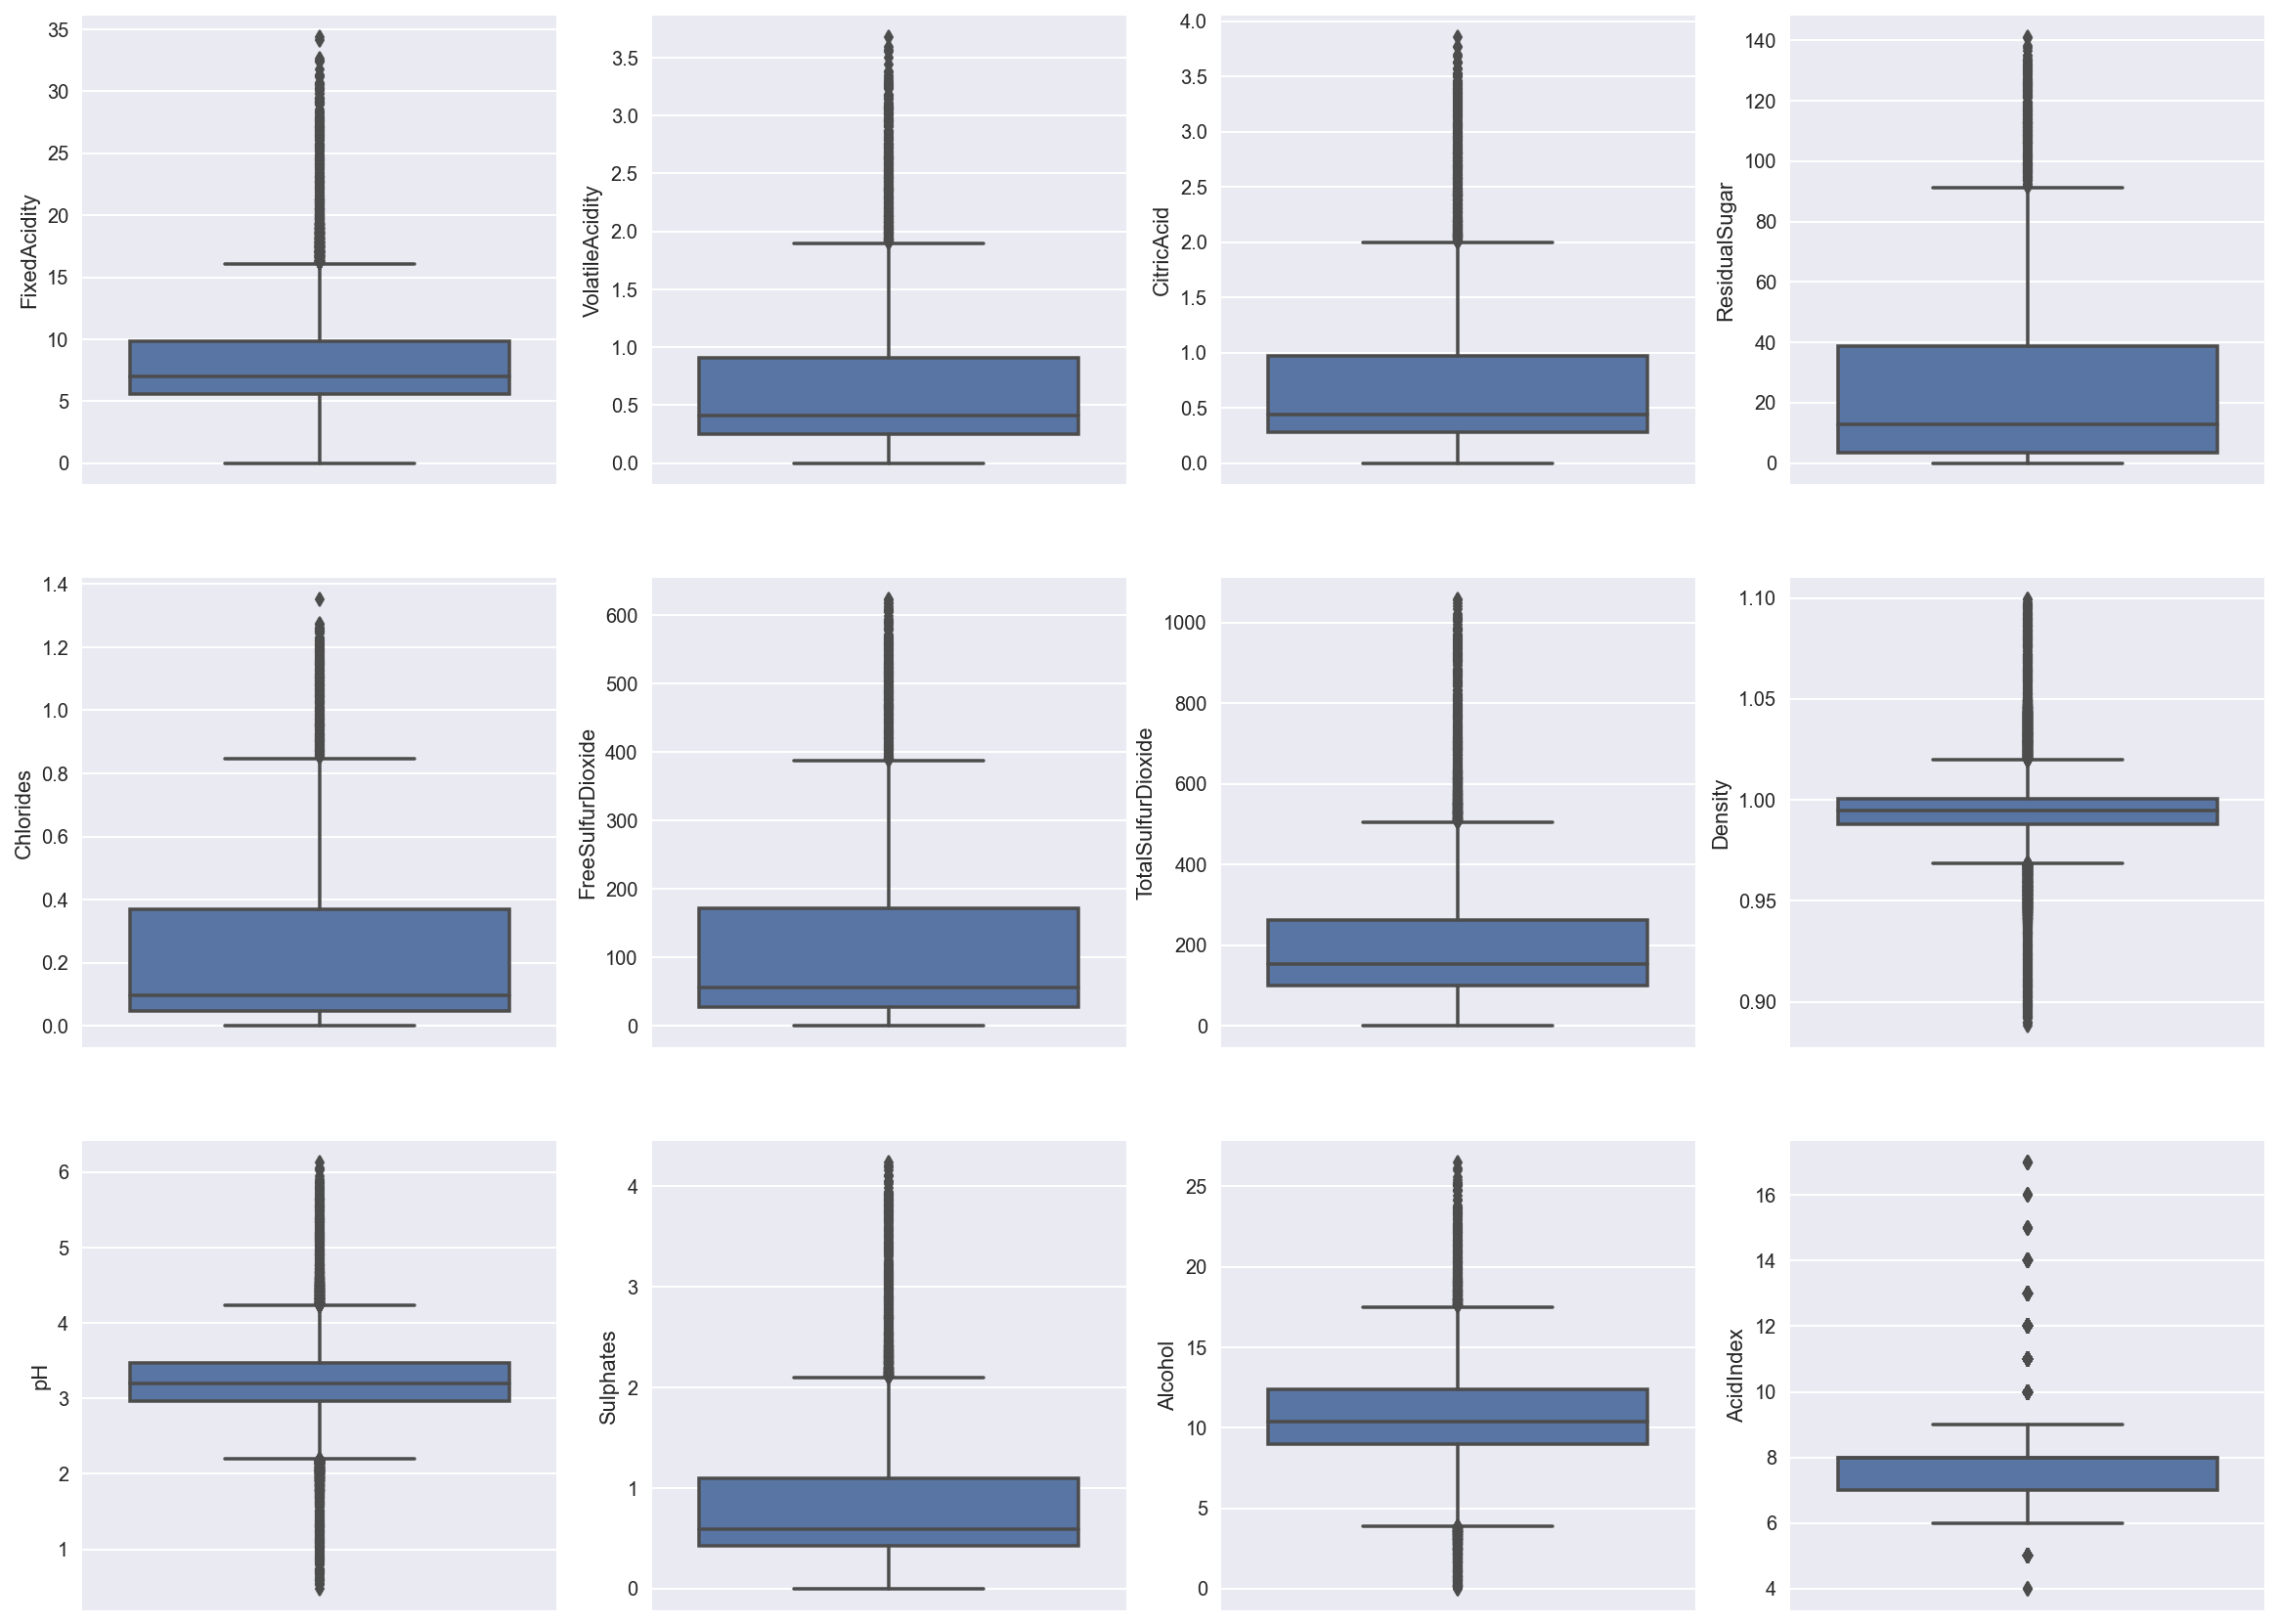

In [12]:
draw_boxpolt(wine_df)

The above box plots show as follows:

The outliers of 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'Sulphates', and 'TotalSulfurDioxide' appear at the right side.

The outliers of 'Density', 'pH', 'Alcohol', and 'AcidIndex' appear at both sides.

#### Using bar  chat to see categorical variables

In [13]:
def groupby_column_size(g_series, ax, title):
    bar_names = g_series.index
    bar_values = g_series.values
    X = np.arange(len(bar_values))
    width=0.1

    # to draw a bar chart
    ax.bar(X, bar_values, alpha=0.9, width = width, color='blue')
    
    # to set x and y axis label
    ax.set_xlabel(title)
    ax.set_ylabel('count')
    
    # the ticks of x axis
    ax.set_xticks(X)

    # the label of each group
    ax.set_xticklabels(bar_names)
    
def car_column_groupby_bar(df, cols):
    """
    To draw bar charts for all columns.

    Input parameters:
      none.

    Returns:
      null.

    Raises:
      none
    """
    
    # Create 24 subplots and unpack the output array immediately
    fig, axsubs = plt.subplots(1, 3, sharey=True, figsize=(20, 6))

    # To draw bar chart and best fit line
    groupby_column_size(df.groupby(cols[0], sort=True).size(), axsubs[0], cols[0])
    groupby_column_size(df.groupby(cols[1], sort=True).size(), axsubs[1], cols[1])
    groupby_column_size(df.groupby(cols[2], sort=True).size(), axsubs[2], cols[2])

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()


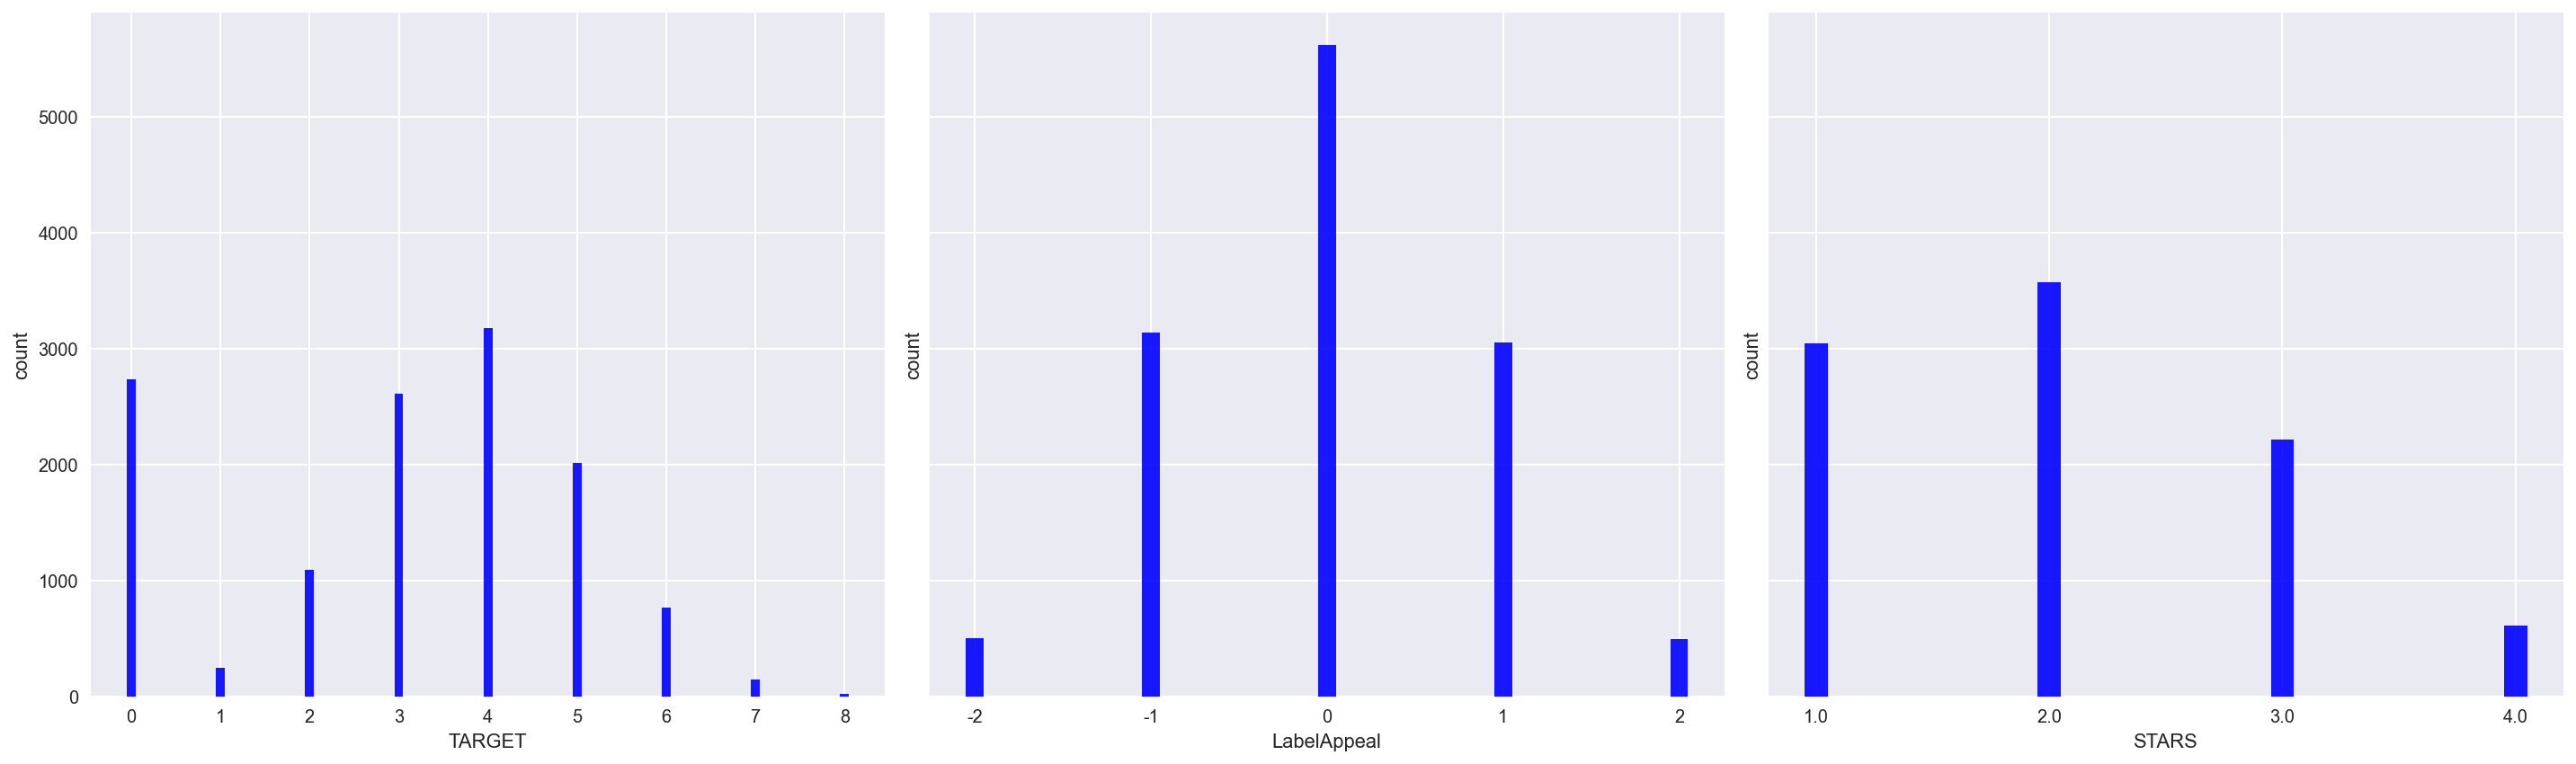

In [14]:
car_column_groupby_bar(wine_df, categorical_cols)

The above bar charts show that TARGET has many levels. I want to create an indicate variable to reduce the number of TARGET.

#### Using correlation table and heatmap to see correlations for TARGET versus other variables.

In [15]:
corr_matrix = wine_df[['TARGET'] + numeric_cols].corr()
corr_matrix['TARGET'].sort_values(ascending = False)

TARGET                1.000000
Alcohol               0.063394
TotalSulfurDioxide    0.035253
FreeSulfurDioxide     0.024503
CitricAcid            0.013953
ResidualSugar         0.003645
pH                   -0.009445
Chlorides            -0.028463
Sulphates            -0.035259
Density              -0.035518
FixedAcidity         -0.052984
VolatileAcidity      -0.070195
AcidIndex            -0.246049
Name: TARGET, dtype: float64

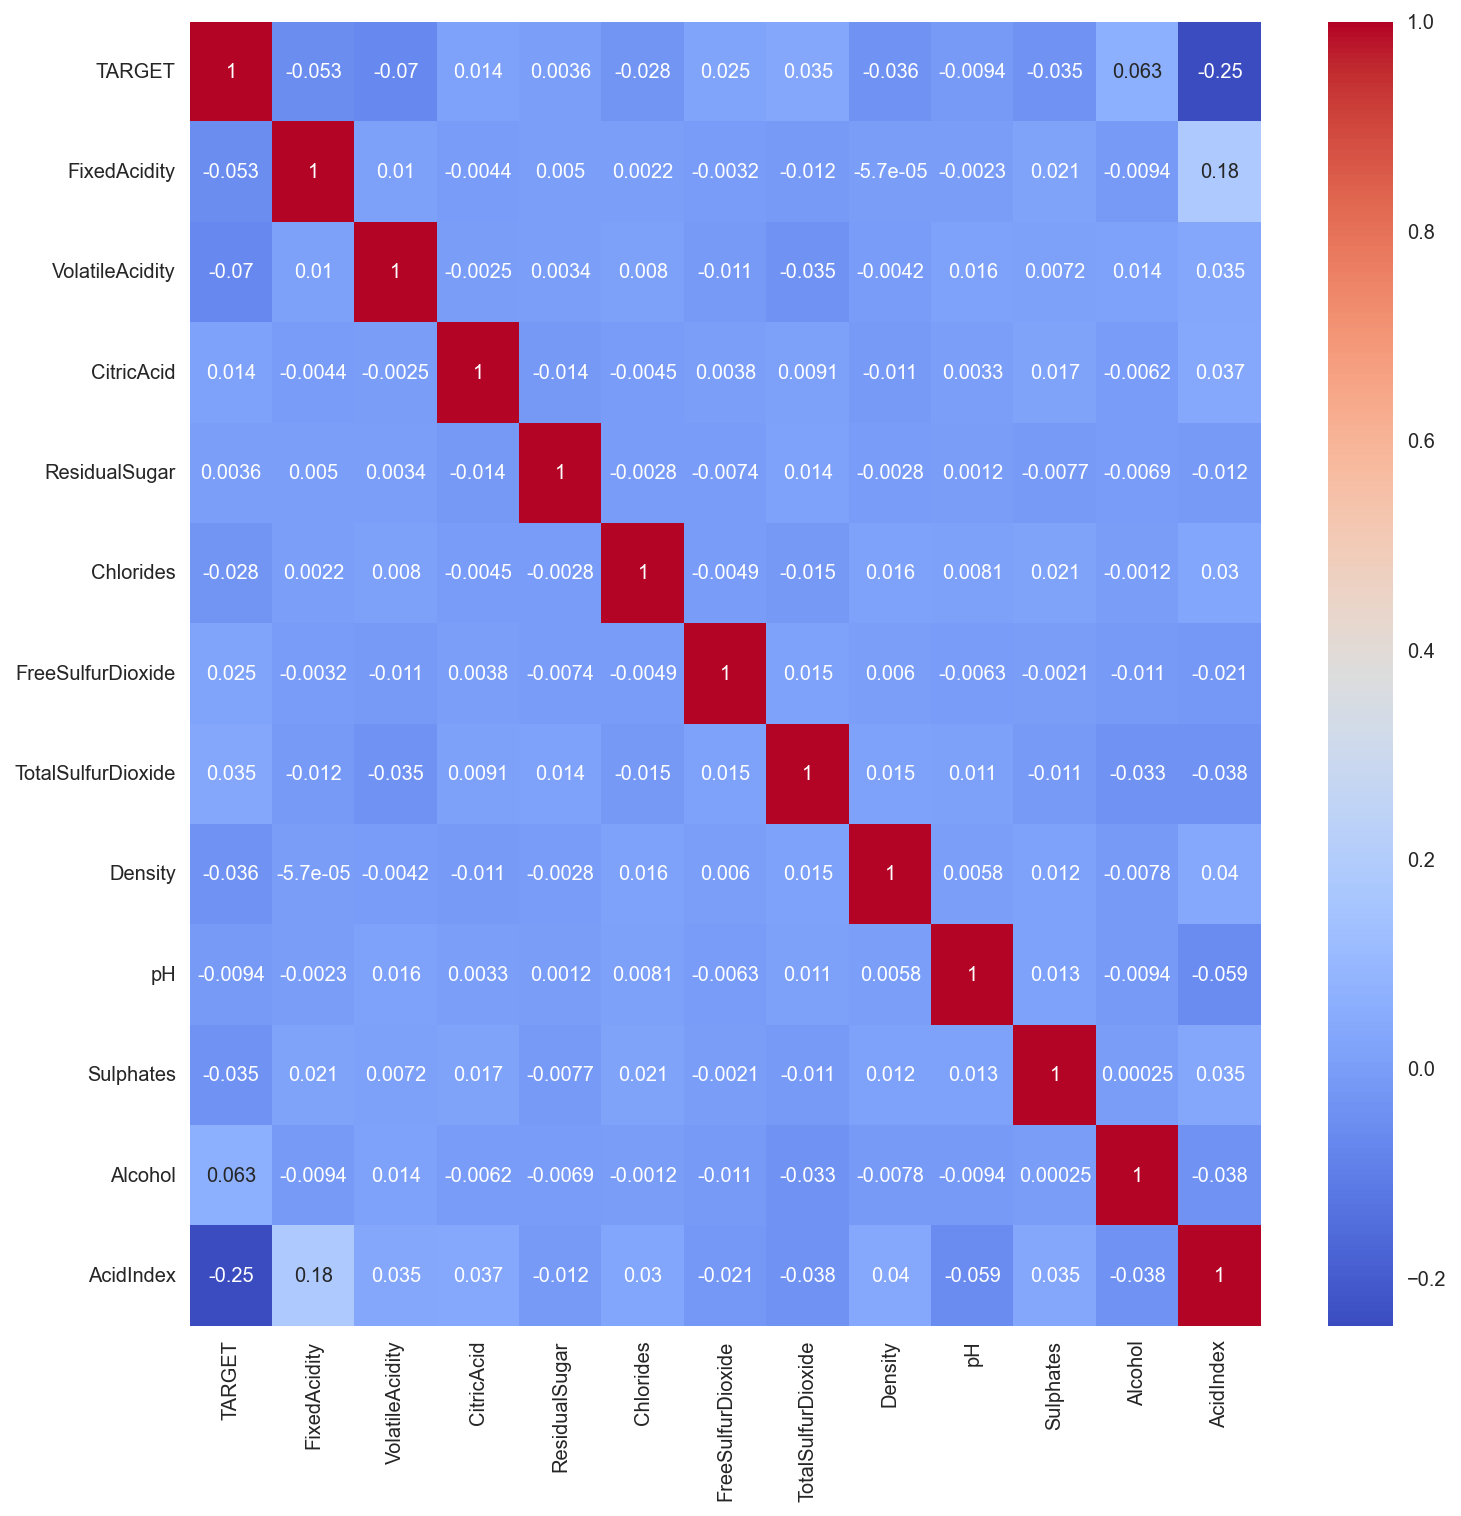

In [16]:
# correlation heatmap 
plt.figure(figsize=(12,12))
ax = sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

The above heatmap and correlation table show as following:

There are not any pair that has correlation value greater than 0.5. They can not use linear regression model to perdict respones variables directly.

## Summary of EDA

- Missing Values
  - 8 explanatory variables have Null or NaN values that should be analyze and process.
    - STARS, Sulphates, TotalSulfurDioxide, Alcohol, FreeSulfurDioxide, Chlorides, ResidualSugar, pH 
  
  
- Outliers
  - All explanatory variables have outilers that should be analyze and process.


- Discretization/Binning
  - 8 explanatory variables show skews the distribution towards right extremely.
    - I will cut them into different bins and convert them into cagegorical variables.
    - 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'Sulphates', 'TotalSulfurDioxide', and 'AcidIndex'.
  
  
- Potentially Derivable variables
  - I will create a rate variable that equals FreeSulfurDioxide / TotalSulfurDioxide.
  - I will drop FreeSulfurDioxide and Sulphates, because TotalSulfurDioxide can present them.
  - I will create a indicate variable for TARGET. 0, 1, 2 mean that the wines are not sold well. Other values mean that the wines are sold well.

# 4. Data Preparation
  - 4.1. Duplicate Rows Analysis
  - 4.2. Missing Value Analysis
    - 4.2.1 Analyze Missing values
    - 4.2.2 Imputing Missing values
  - 4.3 Outlier Analysis
    - 4.3.1 Drop Outliers
    - 4.3.2 Using BOX-COX to convert skewed distributions 
  - 4.4 Discretization/Binning
  - 4.5 Derivable variables
  - 4.6 Imbalanced Response Variable

In [17]:
# create a data frame for cleaning
wine_cleaned_df = wine_df.copy()
wine_cleaned_df.shape

(12795, 15)

### 4.1 Duplicate Rows Analysis

In [18]:
# To check whether there are duplicated rows in the other columns (without the 1st column INDEX) 
dup_rows = wine_cleaned_df.duplicated(subset=header_list[1:], keep='first')

In [19]:
dup_rows.value_counts()

False    12795
dtype: int64

There are no duplicated rows in the other columns. I do not need to do anything.

### 4.2 Missing Value Analysis
- 4.2.1 Analyze missing values
  - Find the missing percentage
  - Analyze missing values using bar graph 
  - Analyze missing values using matrix
  - Analyze missing values using heatmap
  - Analyze missing values using Dendrogram
  
  
- 4.2.2 Impute Missing Values

  Impute 8 variables (STARS, Sulphates, TotalSulfurDioxide, Alcohol, FreeSulfurDioxide, Chlorides, ResidualSugar, pH)


### 4.2.1 Analyze missing values
#### Find the missing percentage

In [20]:
missing_values_percent = wine_cleaned_df.isnull().mean()*100
missing_values_percent    # missing_values_percent.plot.bar()

TARGET                 0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
LabelAppeal            0.000000
AcidIndex              0.000000
STARS                 26.252442
dtype: float64

#### Analyze missing values using bar graph

<AxesSubplot:>

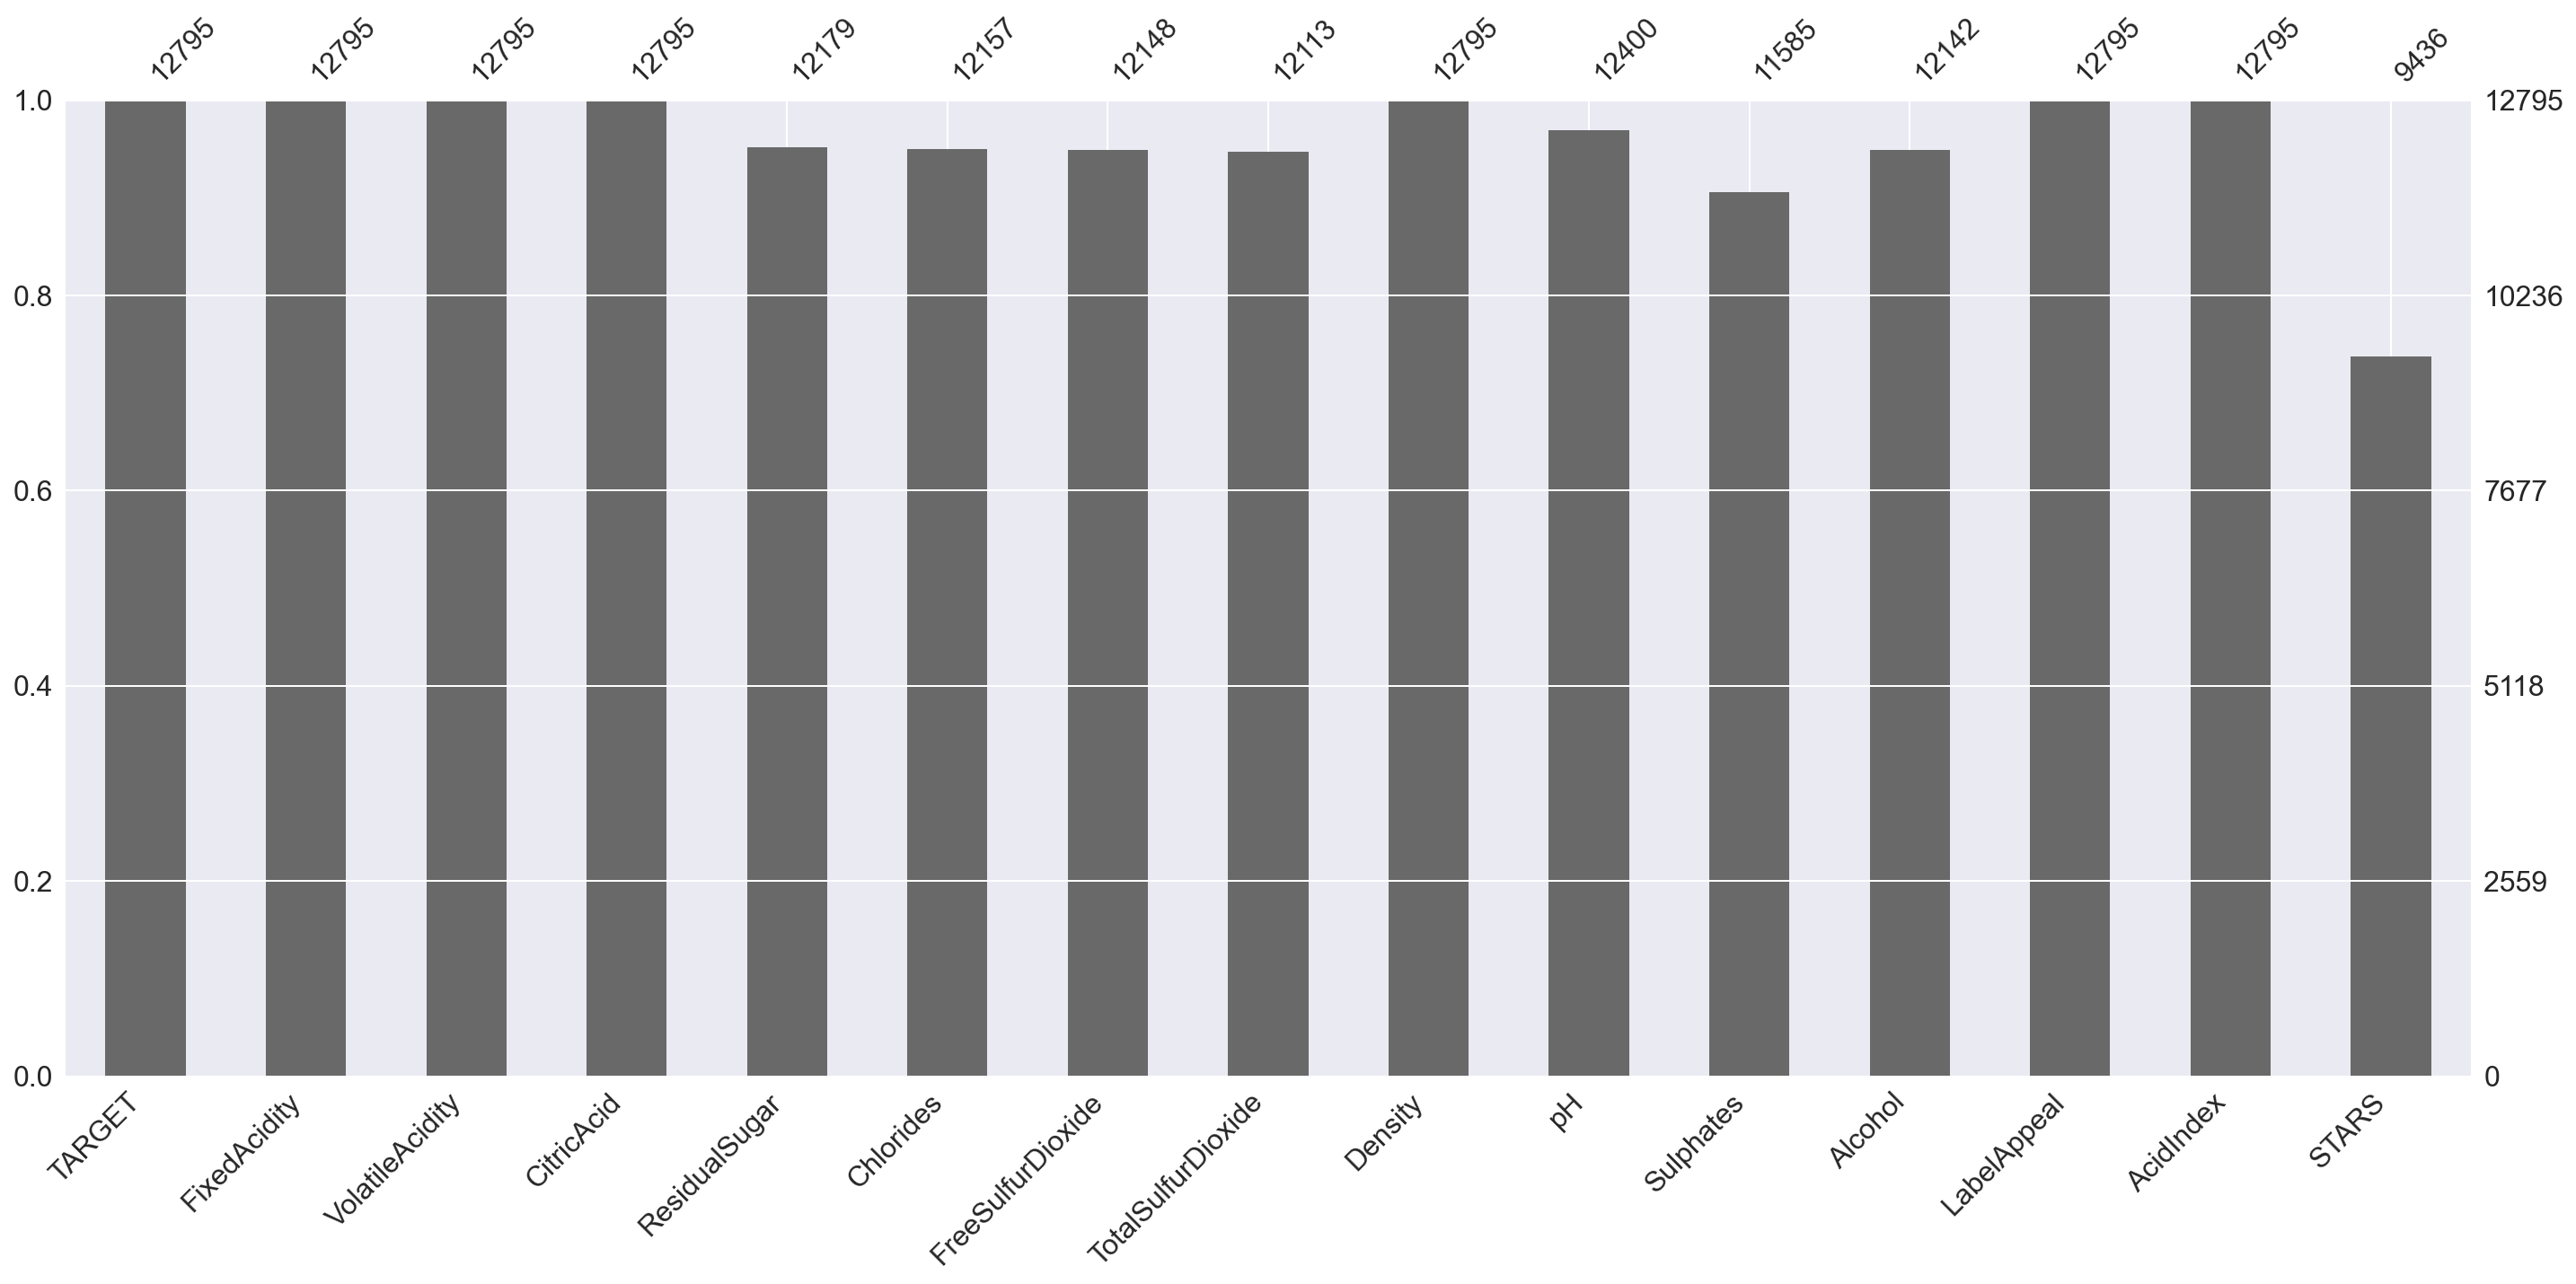

In [21]:
msno.bar(wine_cleaned_df)

#### Analyze missing values using matrix
From martix, we can see the skewness in distribution

<AxesSubplot:>

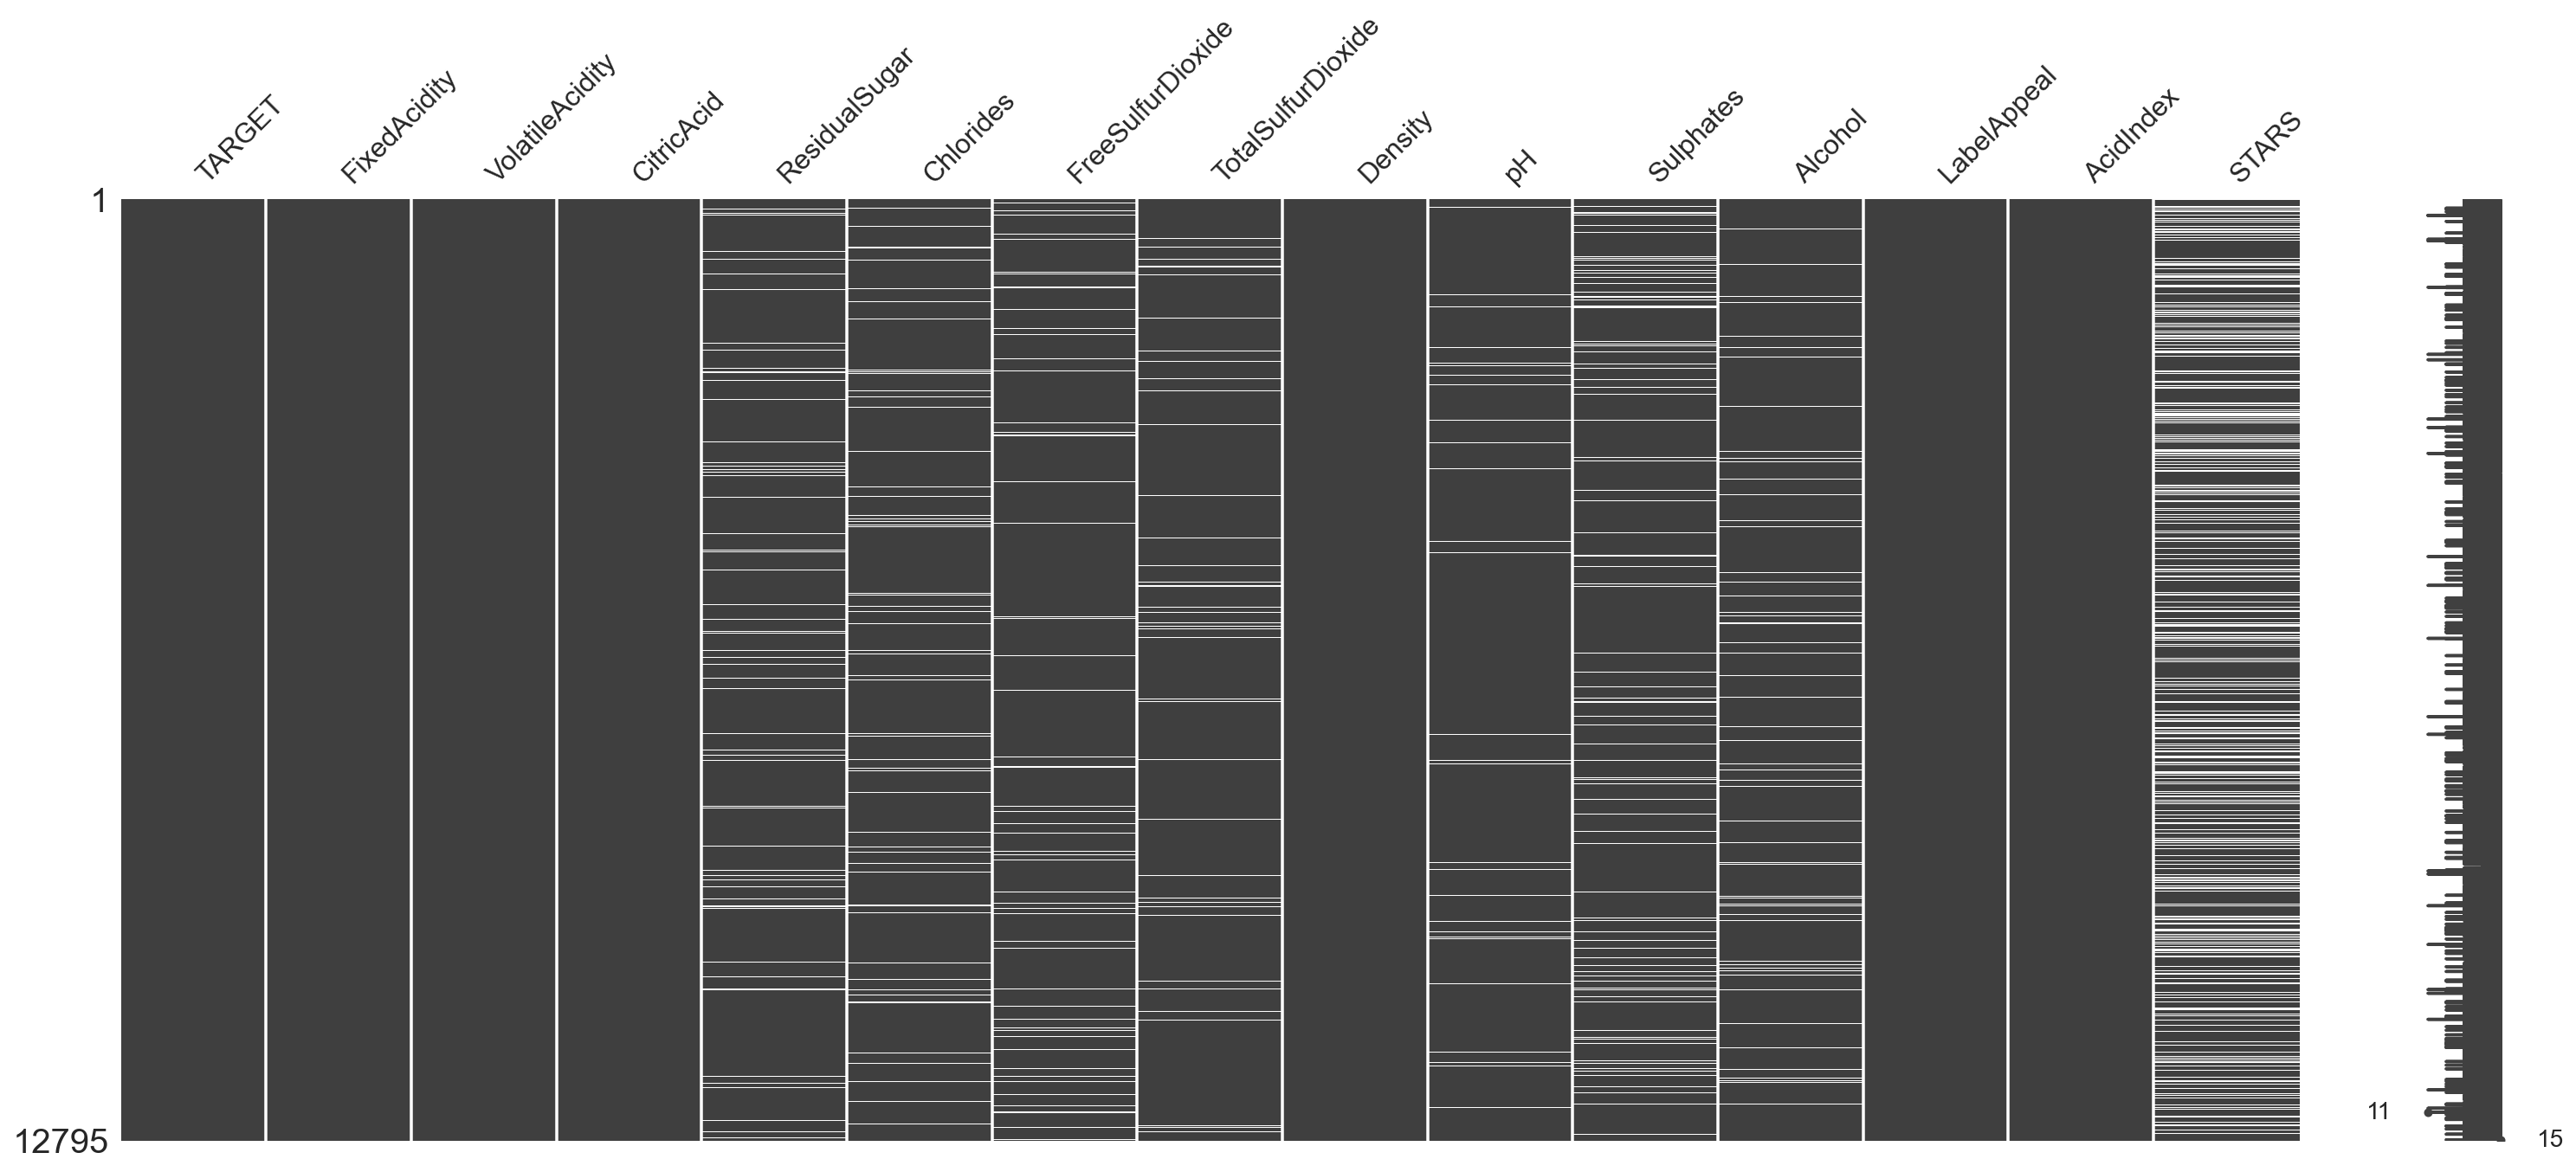

In [22]:
msno.matrix(wine_cleaned_df)

Where data is missing. No clear patterns are showed.

#### Analyze missing values using heatmap

A heat map can show if there are correlations where data is missing.

<AxesSubplot:>

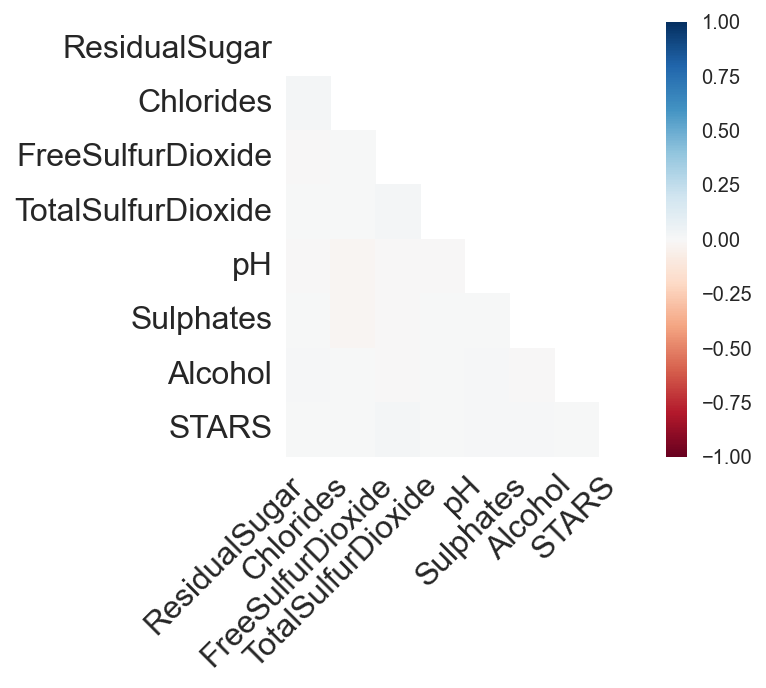

In [23]:
msno.heatmap(wine_cleaned_df, figsize=(4, 4))

The heat map showed that it doesn’t look like the locations where data are missing are correlated.

#### Analyze missing values using Dendrogram
A dendrogram can show the clusterings of where data is missing. Leaves that are at the same level predict one another’s presence (empty or filled). The vertical arms are used to indicate how different clusters are. Short arms mean that branches are similar.

<AxesSubplot:>

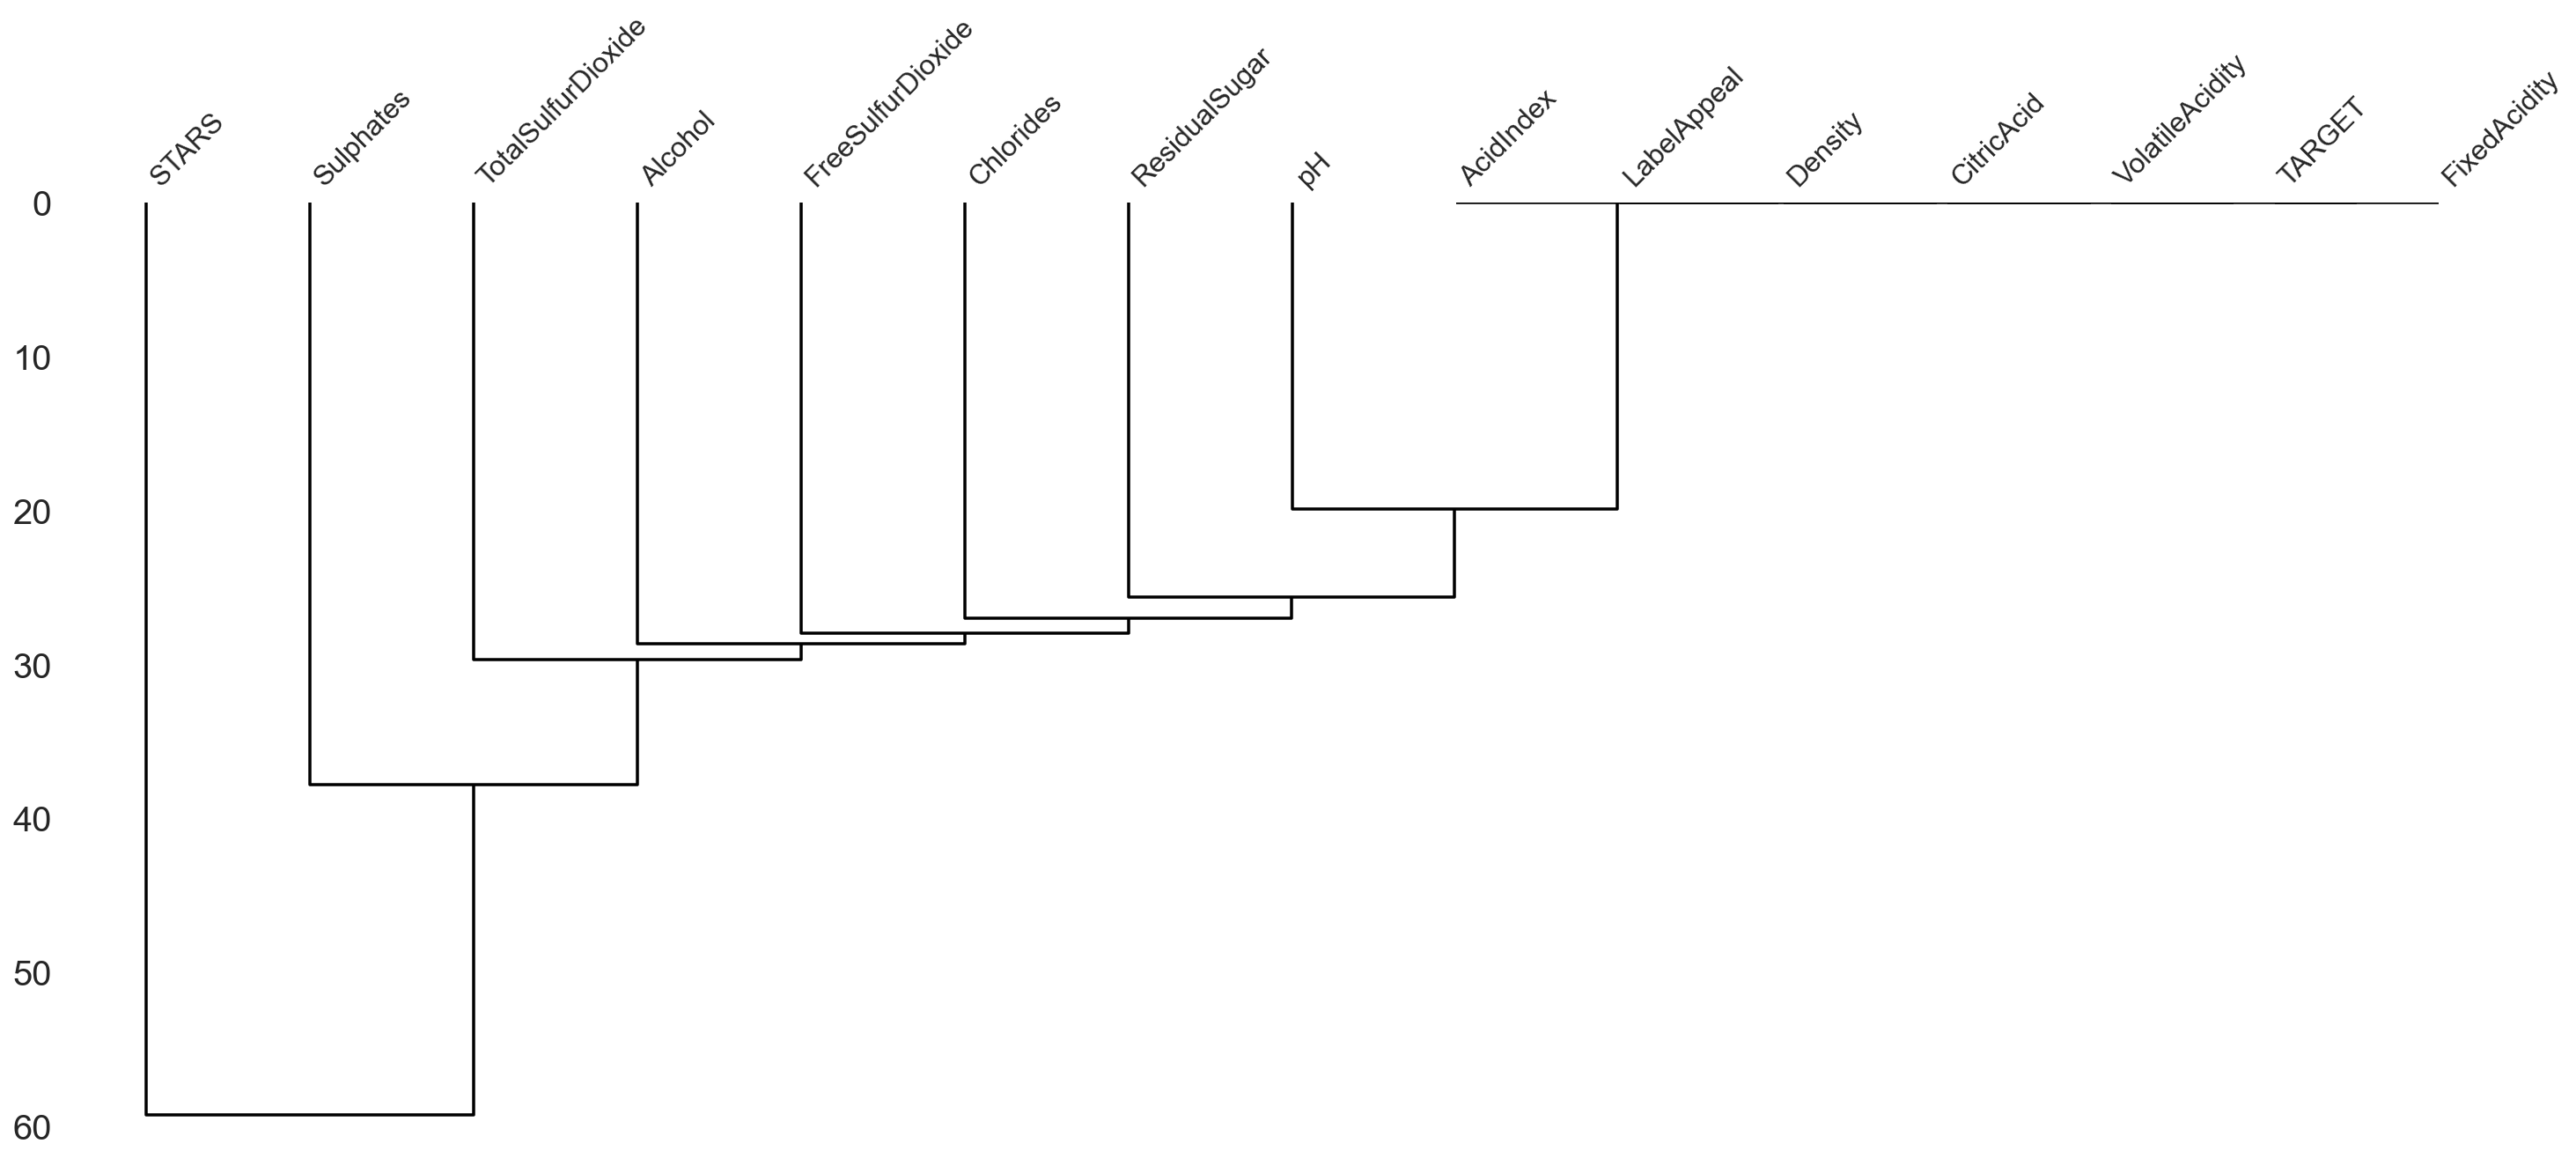

In [24]:
msno.dendrogram(wine_cleaned_df)

We can see the columns without missing data on the upper right. pH is close to AcidIndex, LabelAppeal, Density, CitricAcid, VolatileAcidity, TARGET and FixedAidity. I will use KNN to predict null values of pH.

### 4.2.2 Impute Missing Value
There are 8 variables that have Null or NaN values, I want to impute them individually.

STARS, Sulphates, TotalSulfurDioxide, Alcohol, FreeSulfurDioxide, Chlorides, ResidualSugar, pH

If a varibale shows normal distribution, I will use mean of this variable to fill Missing values.

If a variable shows skewed distribution, I will use median of this variable to fill Missing values.

I will use KNN to fill Null values for pH, because Dendrogram shows that pH is close to AcidIndex, LabelAppeal, Density, CitricAcid, VolatileAcidity, TARGET and FixedAidity.

- Using 0 to fill Null values for STARS
- Using median to fill Null values for Sulphates
- Using median to fill Null values for TotalSulfurDioxide
- Using mean to fill Null values for Alcohol
- Using median to fill Null values for FreeSulfurDioxide
- Using median to fill Null values for Chlorides
- Using median to fill Null values for ResidualSugar
- Using KNN to fill Null values for pH

#### Using 0 to fill Null values for STARS
Stars is a categorical variable, I can use a new value to fill null.

In [25]:
def print_miss_pct_count(data_df, col, isbefore = True):
    
    count = data_df[col].isnull().sum()
    pct = data_df[col].isnull().mean()*100
    
           
    if isbefore:
        print("Before filling Null values, the %s column has %d missing values, counting for %.2f %%" %(col, count, pct))
    else:
        print("After filling Null values, the %s column has %d missing values, counting for %.2f %%" %(col, count, pct))
        
        mean1 = data_df[col].mean()
        std1 = data_df[col].std()

        mean2 = wine_df[col].mean()
        std2 = wine_df[col].std()

        des_mean = (1 - mean2/ mean1) * 100
        des_std = (1 - std2/ std1) * 100

        print("%s :\n the mean from %.2f to %.2f , the mean value has changed %.2f %% .\n the standard deviation from %.2f to %.2f, the standard deviation value has changed by %.2f %%.\n"
             %(col, mean1, mean2, des_mean, std1, std2, des_std))

In [26]:
print_miss_pct_count(wine_cleaned_df, 'STARS')

Before filling Null values, the STARS column has 3359 missing values, counting for 26.25 %


In [27]:
stars = wine_cleaned_df['STARS'].values.reshape(-1, 1)
imp_0 = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value = 0)
imp_0 = imp_0.fit_transform(stars)
wine_cleaned_df['STARS'] = imp_0

In [28]:
# check null values
print_miss_pct_count(wine_cleaned_df, 'STARS', False)

After filling Null values, the STARS column has 0 missing values, counting for 0.00 %
STARS :
 the mean from 1.51 to 2.04 , the mean value has changed -35.60 % .
 the standard deviation from 1.19 to 0.90, the standard deviation value has changed by 23.94 %.



#### Using median to fill Null values for Sulphates
Sulphates shows skewed distribution, I will use median of this variable to fill Missing values.

In [29]:
print_miss_pct_count(wine_cleaned_df, 'Sulphates')

Before filling Null values, the Sulphates column has 1210 missing values, counting for 9.46 %


In [30]:
Sulphates = wine_cleaned_df['Sulphates'].values.reshape(-1, 1)
imp_median = SimpleImputer(strategy = 'median')
imp_median = imp_median.fit_transform(Sulphates)
wine_cleaned_df['Sulphates'] = imp_median

In [31]:
print_miss_pct_count(wine_cleaned_df, 'Sulphates', False)

After filling Null values, the Sulphates column has 0 missing values, counting for 0.00 %
Sulphates :
 the mean from 0.82 to 0.85 , the mean value has changed -2.95 % .
 the standard deviation from 0.63 to 0.66, the standard deviation value has changed by -4.34 %.



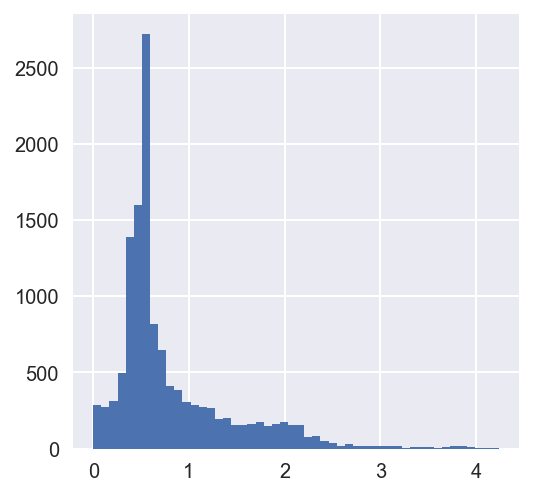

In [32]:
wine_cleaned_df['Sulphates'].hist(bins=50, figsize=(4,4))
plt.show()

#### Using median to fill Null values for TotalSulfurDioxide
TotalSulfurDioxide shows skewed distribution, I will use median of this variable to fill Missing values.

In [33]:
print_miss_pct_count(wine_cleaned_df, 'TotalSulfurDioxide')

Before filling Null values, the TotalSulfurDioxide column has 682 missing values, counting for 5.33 %


In [34]:
TotalSulfurDioxide = wine_cleaned_df['TotalSulfurDioxide'].values.reshape(-1, 1)
imp_median = SimpleImputer(strategy = 'median')
imp_median = imp_median.fit_transform(TotalSulfurDioxide)
wine_cleaned_df['TotalSulfurDioxide'] = imp_median

In [35]:
print_miss_pct_count(wine_cleaned_df, 'TotalSulfurDioxide', False)

After filling Null values, the TotalSulfurDioxide column has 0 missing values, counting for 0.00 %
TotalSulfurDioxide :
 the mean from 201.64 to 204.32 , the mean value has changed -1.33 % .
 the standard deviation from 159.11 to 163.12, the standard deviation value has changed by -2.52 %.



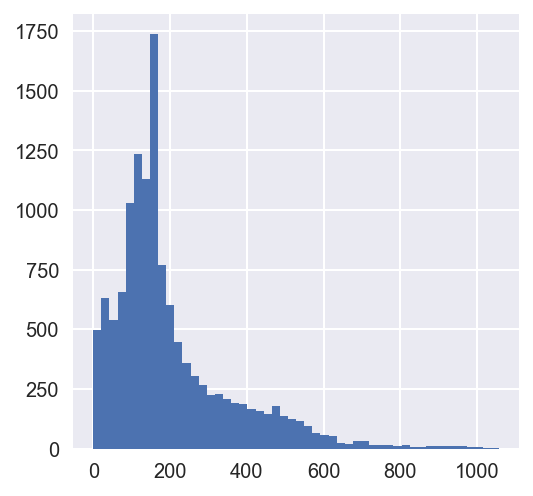

In [36]:
wine_cleaned_df['TotalSulfurDioxide'].hist(bins=50, figsize=(4,4))
plt.show()

#### Using mean to fill Null values for Alcohol
Alcohol shows normal distribution, I will use mean of this variable to fill Missing values.

In [37]:
print_miss_pct_count(wine_cleaned_df, 'Alcohol')

Before filling Null values, the Alcohol column has 653 missing values, counting for 5.10 %


In [38]:
Alcohol = wine_cleaned_df['Alcohol'].values.reshape(-1, 1)
imp_mean = SimpleImputer(strategy = 'mean')
imp_mean = imp_mean.fit_transform(Alcohol)
wine_cleaned_df['Alcohol'] = imp_mean

In [39]:
print_miss_pct_count(wine_cleaned_df, 'Alcohol', False)

After filling Null values, the Alcohol column has 0 missing values, counting for 0.00 %
Alcohol :
 the mean from 10.52 to 10.52 , the mean value has changed 0.00 % .
 the standard deviation from 3.54 to 3.63, the standard deviation value has changed by -2.65 %.



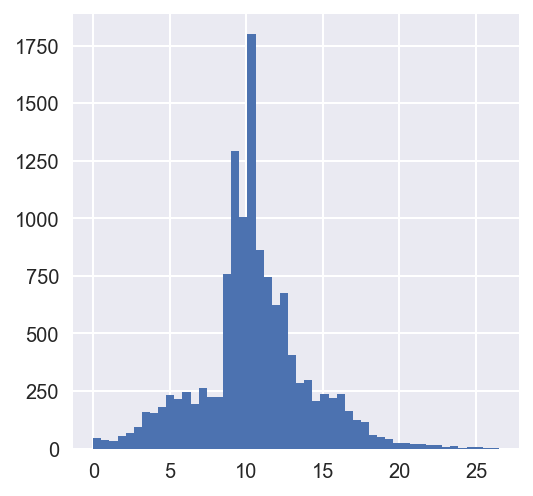

In [40]:
wine_cleaned_df['Alcohol'].hist(bins=50, figsize=(4,4))
plt.show()

#### Using median to fill Null values for FreeSulfurDioxide
FreeSulfurDioxide shows skewed distribution, I will use median of this variable to fill Missing values.

In [41]:
print_miss_pct_count(wine_cleaned_df, 'FreeSulfurDioxide')

Before filling Null values, the FreeSulfurDioxide column has 647 missing values, counting for 5.06 %


In [42]:
FreeSulfurDioxide = wine_cleaned_df['FreeSulfurDioxide'].values.reshape(-1, 1)
imp_median = SimpleImputer(strategy = 'median')
imp_median = imp_median.fit_transform(FreeSulfurDioxide)
wine_cleaned_df['FreeSulfurDioxide'] = imp_median

In [43]:
print_miss_pct_count(wine_cleaned_df, 'FreeSulfurDioxide', False)

After filling Null values, the FreeSulfurDioxide column has 0 missing values, counting for 0.00 %
FreeSulfurDioxide :
 the mean from 104.12 to 106.68 , the mean value has changed -2.46 % .
 the standard deviation from 105.92 to 108.10, the standard deviation value has changed by -2.06 %.



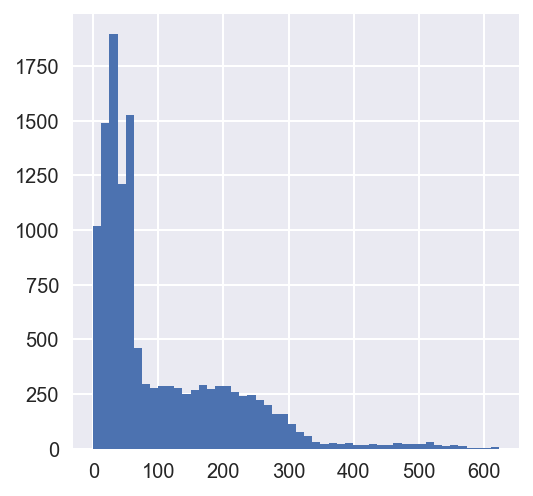

In [44]:
wine_cleaned_df['FreeSulfurDioxide'].hist(bins=50, figsize=(4,4))
plt.show()

#### Using median to fill Null values for Chlorides
Chlorides shows skewed distribution, I will use median of this variable to fill Missing values.

In [45]:
print_miss_pct_count(wine_cleaned_df, 'Chlorides')

Before filling Null values, the Chlorides column has 638 missing values, counting for 4.99 %


In [46]:
Chlorides = wine_cleaned_df['Chlorides'].values.reshape(-1, 1)
imp_median = SimpleImputer(strategy = 'median')
imp_median = imp_median.fit_transform(Chlorides)
wine_cleaned_df['Chlorides'] = imp_median

In [47]:
print_miss_pct_count(wine_cleaned_df, 'Chlorides', False)

After filling Null values, the Chlorides column has 0 missing values, counting for 0.00 %
Chlorides :
 the mean from 0.22 to 0.22 , the mean value has changed -2.87 % .
 the standard deviation from 0.23 to 0.23, the standard deviation value has changed by -1.88 %.



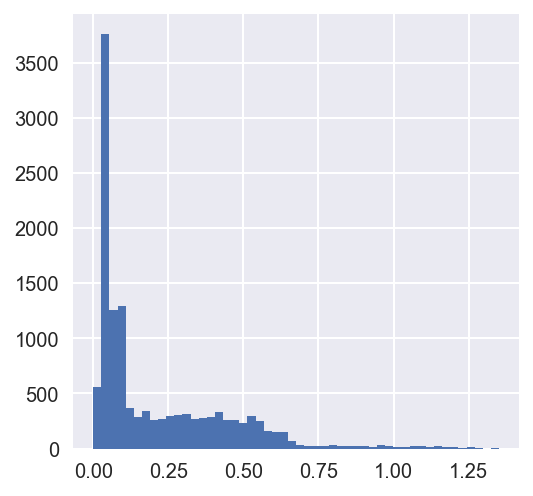

In [48]:
wine_cleaned_df['Chlorides'].hist(bins=50, figsize=(4,4))
plt.show()

#### Using median to fill Null values for ResidualSugar
ResidualSugar shows skewed distribution, I will use median of this variable to fill Missing values.

In [49]:
print_miss_pct_count(wine_cleaned_df, 'ResidualSugar')

Before filling Null values, the ResidualSugar column has 616 missing values, counting for 4.81 %


In [50]:
ResidualSugar = wine_cleaned_df['ResidualSugar'].values.reshape(-1, 1)
imp_median = SimpleImputer(strategy = 'median')
imp_median = imp_median.fit_transform(ResidualSugar)
wine_cleaned_df['ResidualSugar'] = imp_median

In [51]:
print_miss_pct_count(wine_cleaned_df, 'ResidualSugar', False)

After filling Null values, the ResidualSugar column has 0 missing values, counting for 0.00 %
ResidualSugar :
 the mean from 22.86 to 23.37 , the mean value has changed -2.20 % .
 the standard deviation from 24.44 to 24.95, the standard deviation value has changed by -2.07 %.



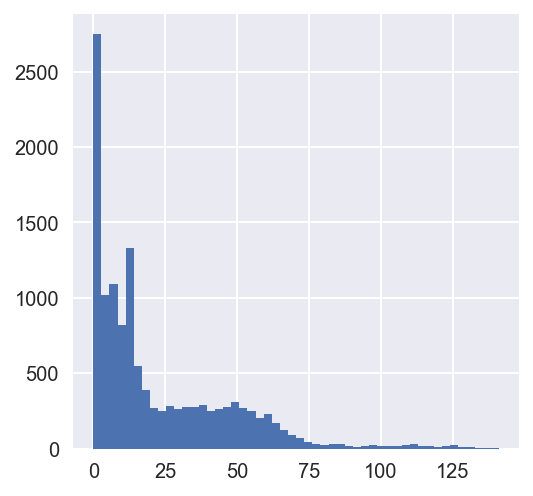

In [52]:
wine_cleaned_df['ResidualSugar'].hist(bins=50, figsize=(4,4))
plt.show()

#### Using KNN to fill Null values for pH

- Compare RandomForest and KNN

- Select KNN to fill Null values for pH

  - I will use KNN to fill Null values for pH, because Dendrogram shows that pH is close to AcidIndex, LabelAppeal, Density, CitricAcid, VolatileAcidity, TARGET and FixedAidity.

  - The k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors. It uses a Euclidean distance metric to impute the missing values.



#### Compare RandomForest and KNN

First, using RandomForest to fill Null values

In [53]:
# Copy a data set for RandomForest
wine_cleaned_random_forest_df = wine_cleaned_df.copy()

In [54]:
# Using Random-Forest to predict null values of pH

dataPHNull = wine_cleaned_random_forest_df[wine_cleaned_random_forest_df['pH'].isnull()]
dataPHNotNull = wine_cleaned_random_forest_df[wine_cleaned_random_forest_df['pH'].notnull()]

rfModel_ph = RandomForestRegressor()
otherNotNullCols = ["AcidIndex","LabelAppeal","Density","CitricAcid","VolatileAcidity","TARGET","FixedAcidity"]
rfModel_ph.fit(dataPHNotNull[otherNotNullCols], dataPHNotNull["pH"])

phNullValues = rfModel_ph.predict(X= dataPHNull[otherNotNullCols])
dataPHNull["pH"] = phNullValues

wine_cleaned_random_forest_df = dataPHNotNull.append(dataPHNull)


In [55]:
print_miss_pct_count(wine_cleaned_random_forest_df, 'pH', False)

After filling Null values, the pH column has 0 missing values, counting for 0.00 %
pH :
 the mean from 3.21 to 3.21 , the mean value has changed 0.01 % .
 the standard deviation from 0.67 to 0.68, the standard deviation value has changed by -1.47 %.



Second, using KNN to fill Null values

In [56]:
print_miss_pct_count(wine_cleaned_df, 'pH')

Before filling Null values, the pH column has 395 missing values, counting for 3.09 %


Using KNN to fill Null value. Neighbors is 5. The algrithom will select the nearest 5 neighhors to get mean that will be filled for null value.

In [57]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
wine_cleaned_df = pd.DataFrame(imputer.fit_transform(wine_cleaned_df),columns = wine_cleaned_df.columns)


In [58]:
print_miss_pct_count(wine_cleaned_df, 'pH', False)

After filling Null values, the pH column has 0 missing values, counting for 0.00 %
pH :
 the mean from 3.21 to 3.21 , the mean value has changed -0.00 % .
 the standard deviation from 0.67 to 0.68, the standard deviation value has changed by -1.24 %.



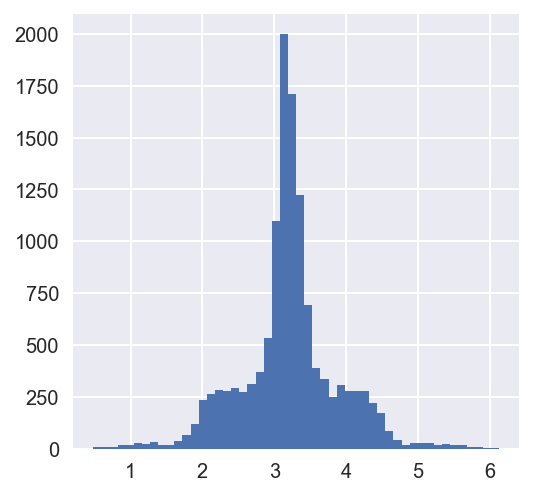

In [59]:
# draw histgram
wine_cleaned_df['pH'].hist(bins=50, figsize=(4,4))
plt.show()

Third, compare RandomForest and KNN

In [60]:
# To see the statistical information of pH filled by KNN
wine_cleaned_df['pH'].describe()

count    12795.000000
mean         3.207483
std          0.671342
min          0.480000
25%          2.960000
50%          3.200000
75%          3.468000
max          6.130000
Name: pH, dtype: float64

In [61]:
# To see the statistical information of pH filled by RandomForest
wine_cleaned_random_forest_df['pH'].describe()

count    12795.000000
mean         3.207864
std          0.669832
min          0.480000
25%          2.970000
50%          3.200000
75%          3.460000
max          6.130000
Name: pH, dtype: float64

#### Summary of pH

Although the standard deviation calculated by Random-Forest is lower than that calculated by KNN. I still select the KNN, because the Random-Forest KNN is suitable for large data sets. 

Reference:

Random Forest Missing Data Algorithms https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5796790/

### 4.3 Outlier Analysis
- 4.3.1 Drop Outliers
- 4.3.2 Using BOX-COX to convert skewed distributions to normal distributions

### 4.3.1 Drop Outliers

Because a value has a 99.7%  of probability  lower than the (mean + 3 * std), I will drop outliers that larger than (mean + 3 * std).

In [62]:
numeric_cols

['FixedAcidity',
 'VolatileAcidity',
 'CitricAcid',
 'ResidualSugar',
 'Chlorides',
 'FreeSulfurDioxide',
 'TotalSulfurDioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol',
 'AcidIndex']

In [63]:
def drop_outliers(data_df, cols, sigema = 3.0):
    del_arr = []
    for col in cols:
        del_outliers = data_df[np.abs(data_df[col] - data_df[col].mean() ) > (sigema * data_df[col].std() )]
        del_arr.append(del_outliers)
        
        
    del_df = pd.concat(del_arr)
    
    del_df.drop_duplicates(keep='first', inplace=True)
    print("There are %d outliers that account for %.2f percentage. They all large than (%.1f * std + mean) of column." 
          %(del_df.shape[0], (del_df.shape[0] / data_df.shape[0]) * 100, sigema))
    
    return del_df

In [64]:
# Getting outliers that larger than (mean + 3 * std).
del_outliers_df = drop_outliers(wine_cleaned_df, numeric_cols, 3.0)
#del_outliers_df.head(3)

There are 2348 outliers that account for 18.35 percentage. They all large than (3.0 * std + mean) of column.


In [65]:
# Showing the statistic information of these outliers
del_outliers_df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000
mean,2.822828,9.457538,0.821444,0.885652,30.456452,0.289011,138.590503,242.546422,0.994371,3.207992,1.029395,10.821528,-0.007240,8.263203,1.415247
std,2.002374,6.600806,0.796615,0.851480,34.732752,0.325819,152.576879,228.118126,0.036390,0.883915,0.901756,4.164230,0.888519,1.998438,1.191172
min,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,1.000000,0.888090,0.480000,0.000000,0.100000,-2.000000,4.000000,0.000000
25%,0.000000,5.800000,0.260000,0.300000,4.600000,0.050000,30.000000,98.750000,0.983605,2.910000,0.480000,9.100000,-1.000000,7.000000,0.000000
50%,3.000000,7.300000,0.480000,0.520000,14.000000,0.116000,59.000000,154.000000,0.995000,3.190000,0.620000,10.500000,0.000000,8.000000,1.000000
75%,4.000000,12.300000,1.110000,1.220000,44.925000,0.428250,206.250000,305.250000,1.004000,3.510000,1.250000,12.500000,1.000000,9.000000,2.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


Drop the outliers from data set.

In [66]:
# drop the outliers
wine_cleaned_df.drop(del_outliers_df.index.values, inplace=True)
wine_cleaned_df.shape

(10447, 15)

After dropping outliers, the data set has 10447 rows.

Next, showing the statistic information of data set without outliers

In [67]:
wine_cleaned_df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000
mean,3.075428,7.749880,0.600549,0.641513,21.157385,0.200016,96.368192,192.442472,0.994165,3.207369,0.775872,10.456857,-0.009476,7.662487,1.526084
std,1.905898,4.499695,0.475984,0.525313,21.087911,0.198675,90.457345,137.311838,0.023770,0.613565,0.537648,3.374516,0.891708,1.087760,1.184600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.914730,1.200000,0.000000,0.000000,-2.000000,4.000000,0.000000
25%,2.000000,5.500000,0.250000,0.280000,3.950000,0.046000,29.000000,104.000000,0.988590,2.970000,0.440000,9.100000,-1.000000,7.000000,0.000000
50%,3.000000,6.900000,0.400000,0.420000,12.900000,0.098000,56.000000,154.000000,0.994400,3.200000,0.590000,10.500000,0.000000,8.000000,2.000000
75%,4.000000,9.300000,0.875000,0.930000,35.200000,0.336000,155.500000,243.000000,1.000000,3.450000,0.960000,12.200000,1.000000,8.000000,2.000000
max,8.000000,23.000000,2.300000,2.500000,96.000000,0.905000,421.000000,675.000000,1.073750,5.200000,2.690000,21.000000,2.000000,11.000000,4.000000


Showing the statistic information of data set contained outliers.

In [68]:
wine_df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


#### Compare the statistic information between undropped outliers and dropped outliers 

In [69]:
def statistic_compare(data_1, data_2, cols):
    for col in cols:
        mean1 = data_1[col].mean()
        std1 = data_1[col].std()
        
        mean2 = data_2[col].mean()
        std2 = data_2[col].std()
        
        des_mean = (1 - mean2/ mean1) * 100
        des_std = (1 - std2/ std1) * 100
        
        print("%s :\n the mean decreased from %.2f to %.2f , the mean value has decreased by more than %.2f %% .\n the standard deviation decreased from %.2f to %.2f the standard deviation value has decreased by more than %.2f %%.\n"
             %(col, mean1, mean2, des_mean, std1, std2, des_std))
    # the mean decreased from 8.2977 to 7.046 
    # while the standard deviation decreased from 23.934218 to 17.899: 
    # these are significant changes, i.e., the mean value has decreased by more than 15% while the standard deviation value has decreased by more than 25%.

In [70]:
statistic_compare(wine_df, wine_cleaned_df, numeric_cols)

FixedAcidity :
 the mean decreased from 8.06 to 7.75 , the mean value has decreased by more than 3.89 % .
 the standard deviation decreased from 5.00 to 4.50 the standard deviation value has decreased by more than 9.94 %.

VolatileAcidity :
 the mean decreased from 0.64 to 0.60 , the mean value has decreased by more than 6.32 % .
 the standard deviation decreased from 0.56 to 0.48 the standard deviation value has decreased by more than 14.33 %.

CitricAcid :
 the mean decreased from 0.69 to 0.64 , the mean value has decreased by more than 6.53 % .
 the standard deviation decreased from 0.61 to 0.53 the standard deviation value has decreased by more than 13.32 %.

ResidualSugar :
 the mean decreased from 23.37 to 21.16 , the mean value has decreased by more than 9.46 % .
 the standard deviation decreased from 24.95 to 21.09 the standard deviation value has decreased by more than 15.46 %.

Chlorides :
 the mean decreased from 0.22 to 0.20 , the mean value has decreased by more than 10.13

Next, using histgrams and boxplots to show the dataset without outliers.

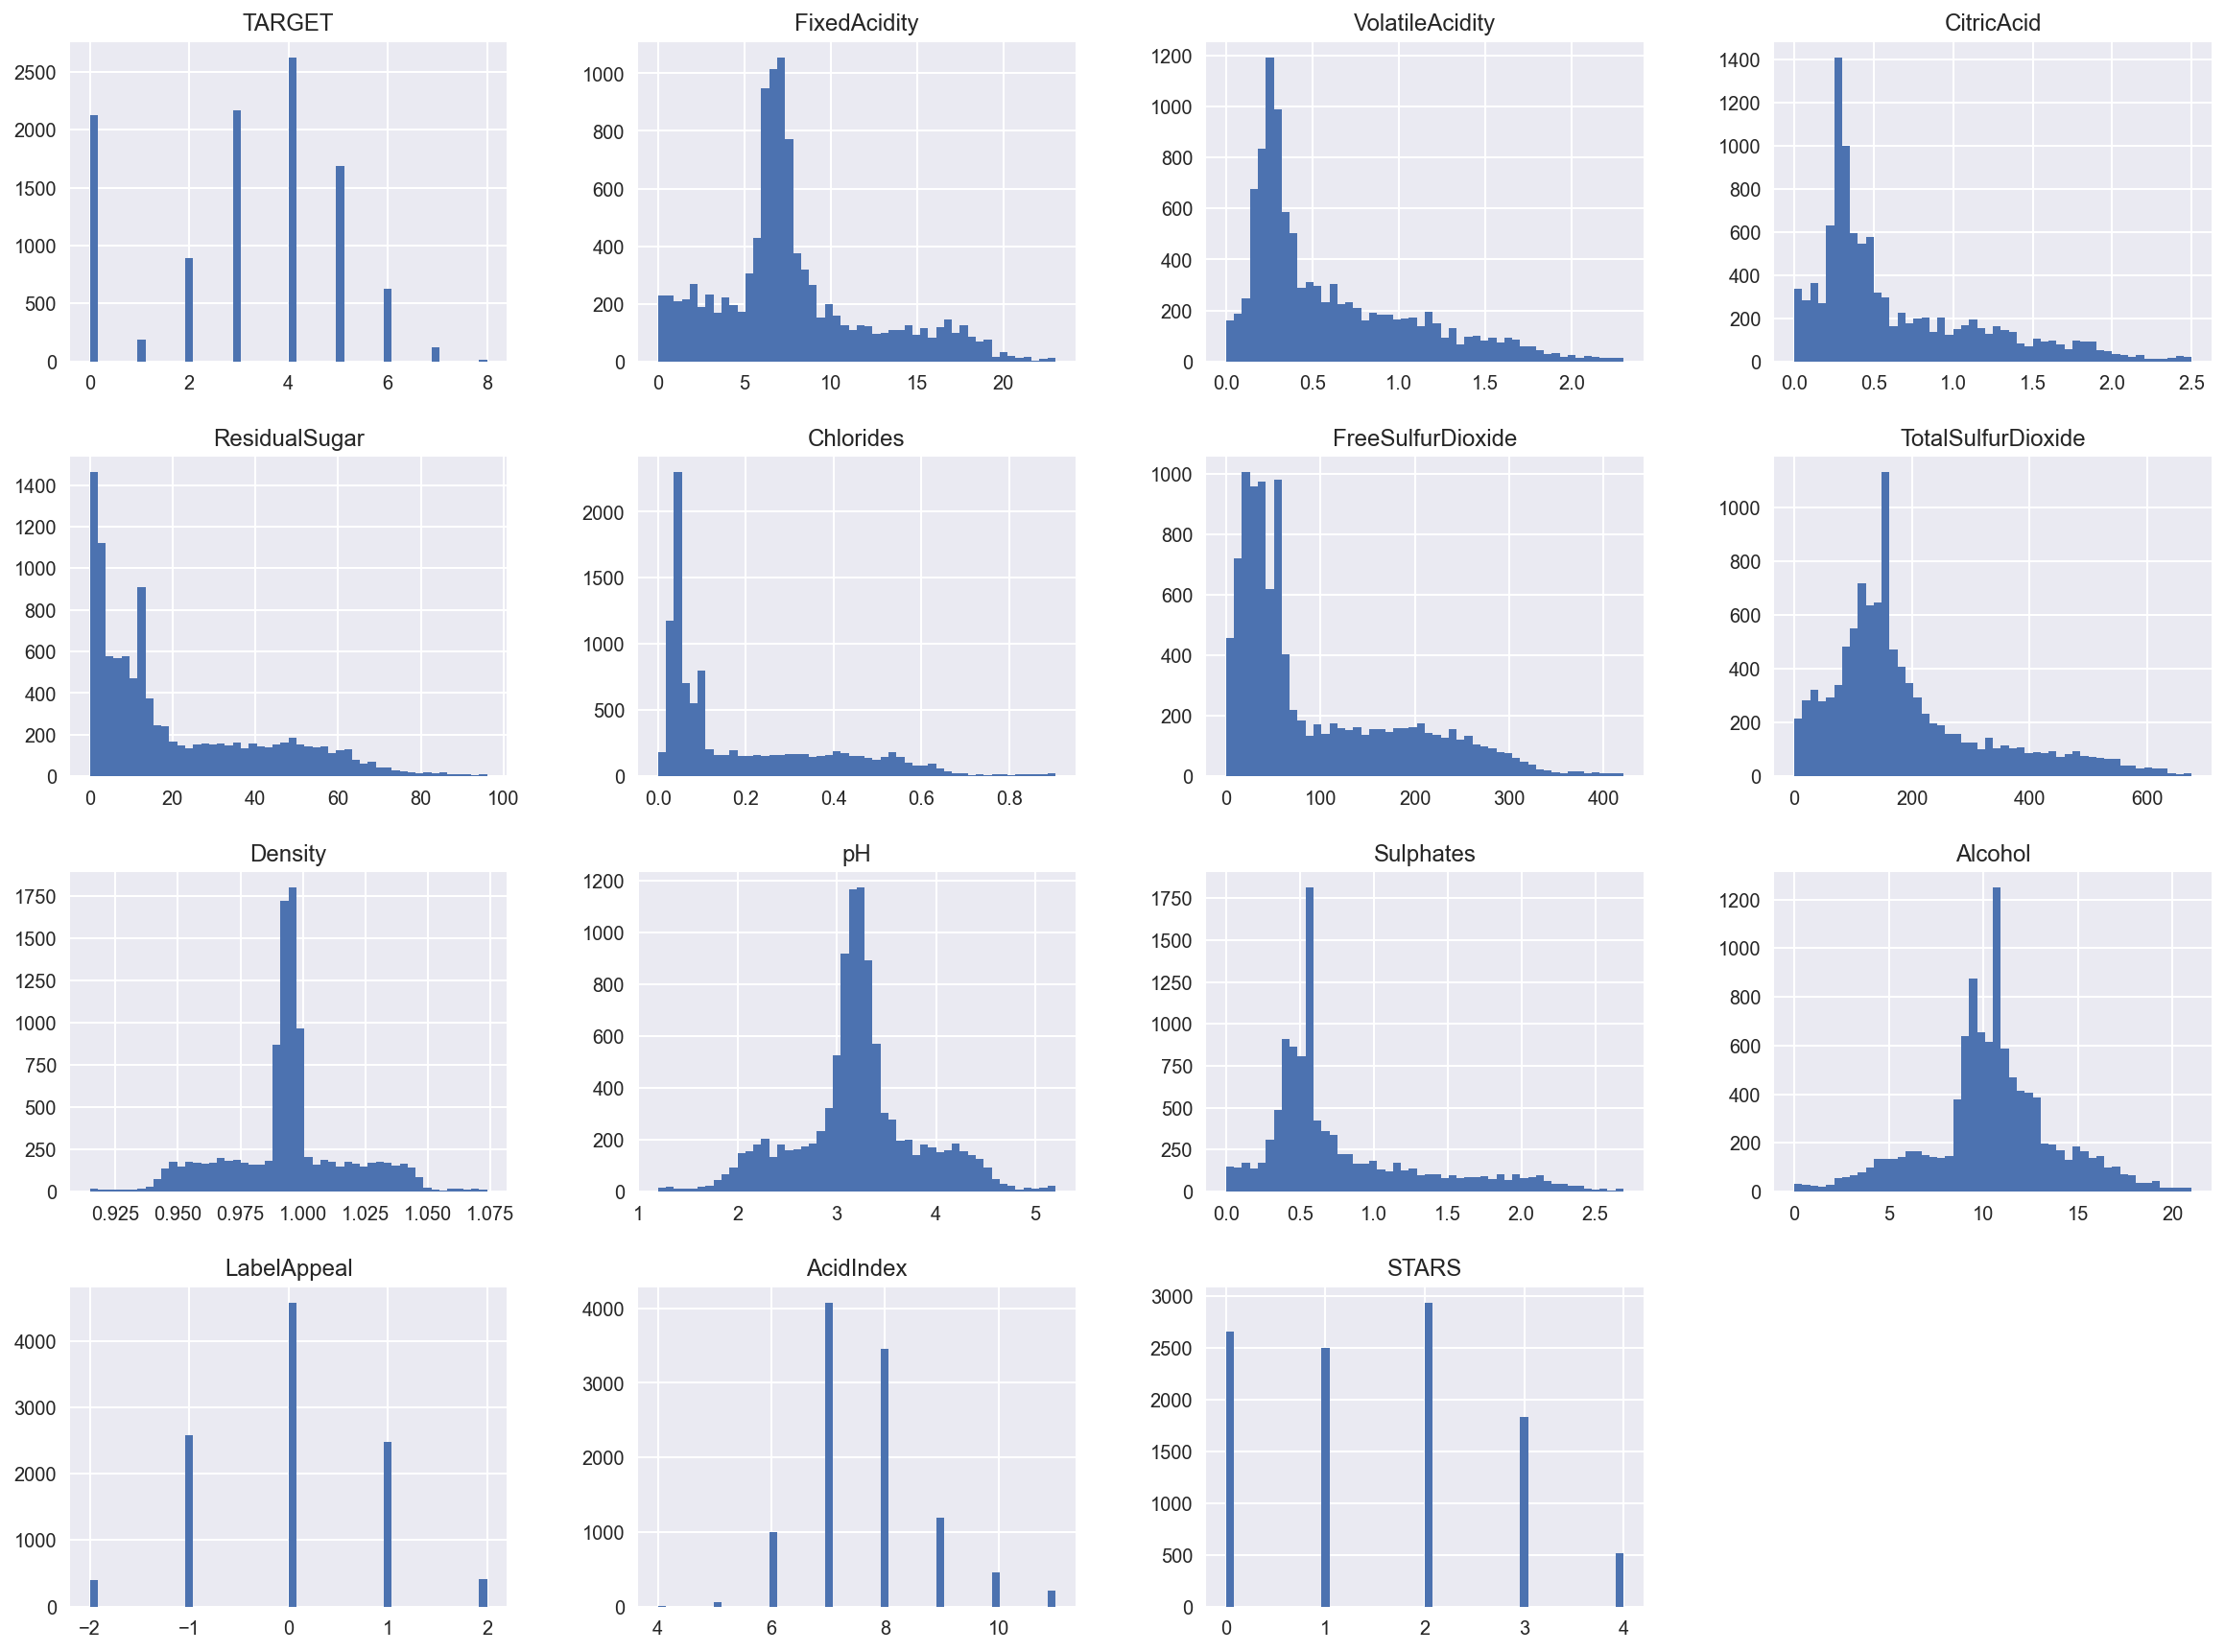

In [71]:
# draw histgrams
wine_cleaned_df.hist(bins=50, figsize=(20,15))
plt.show()

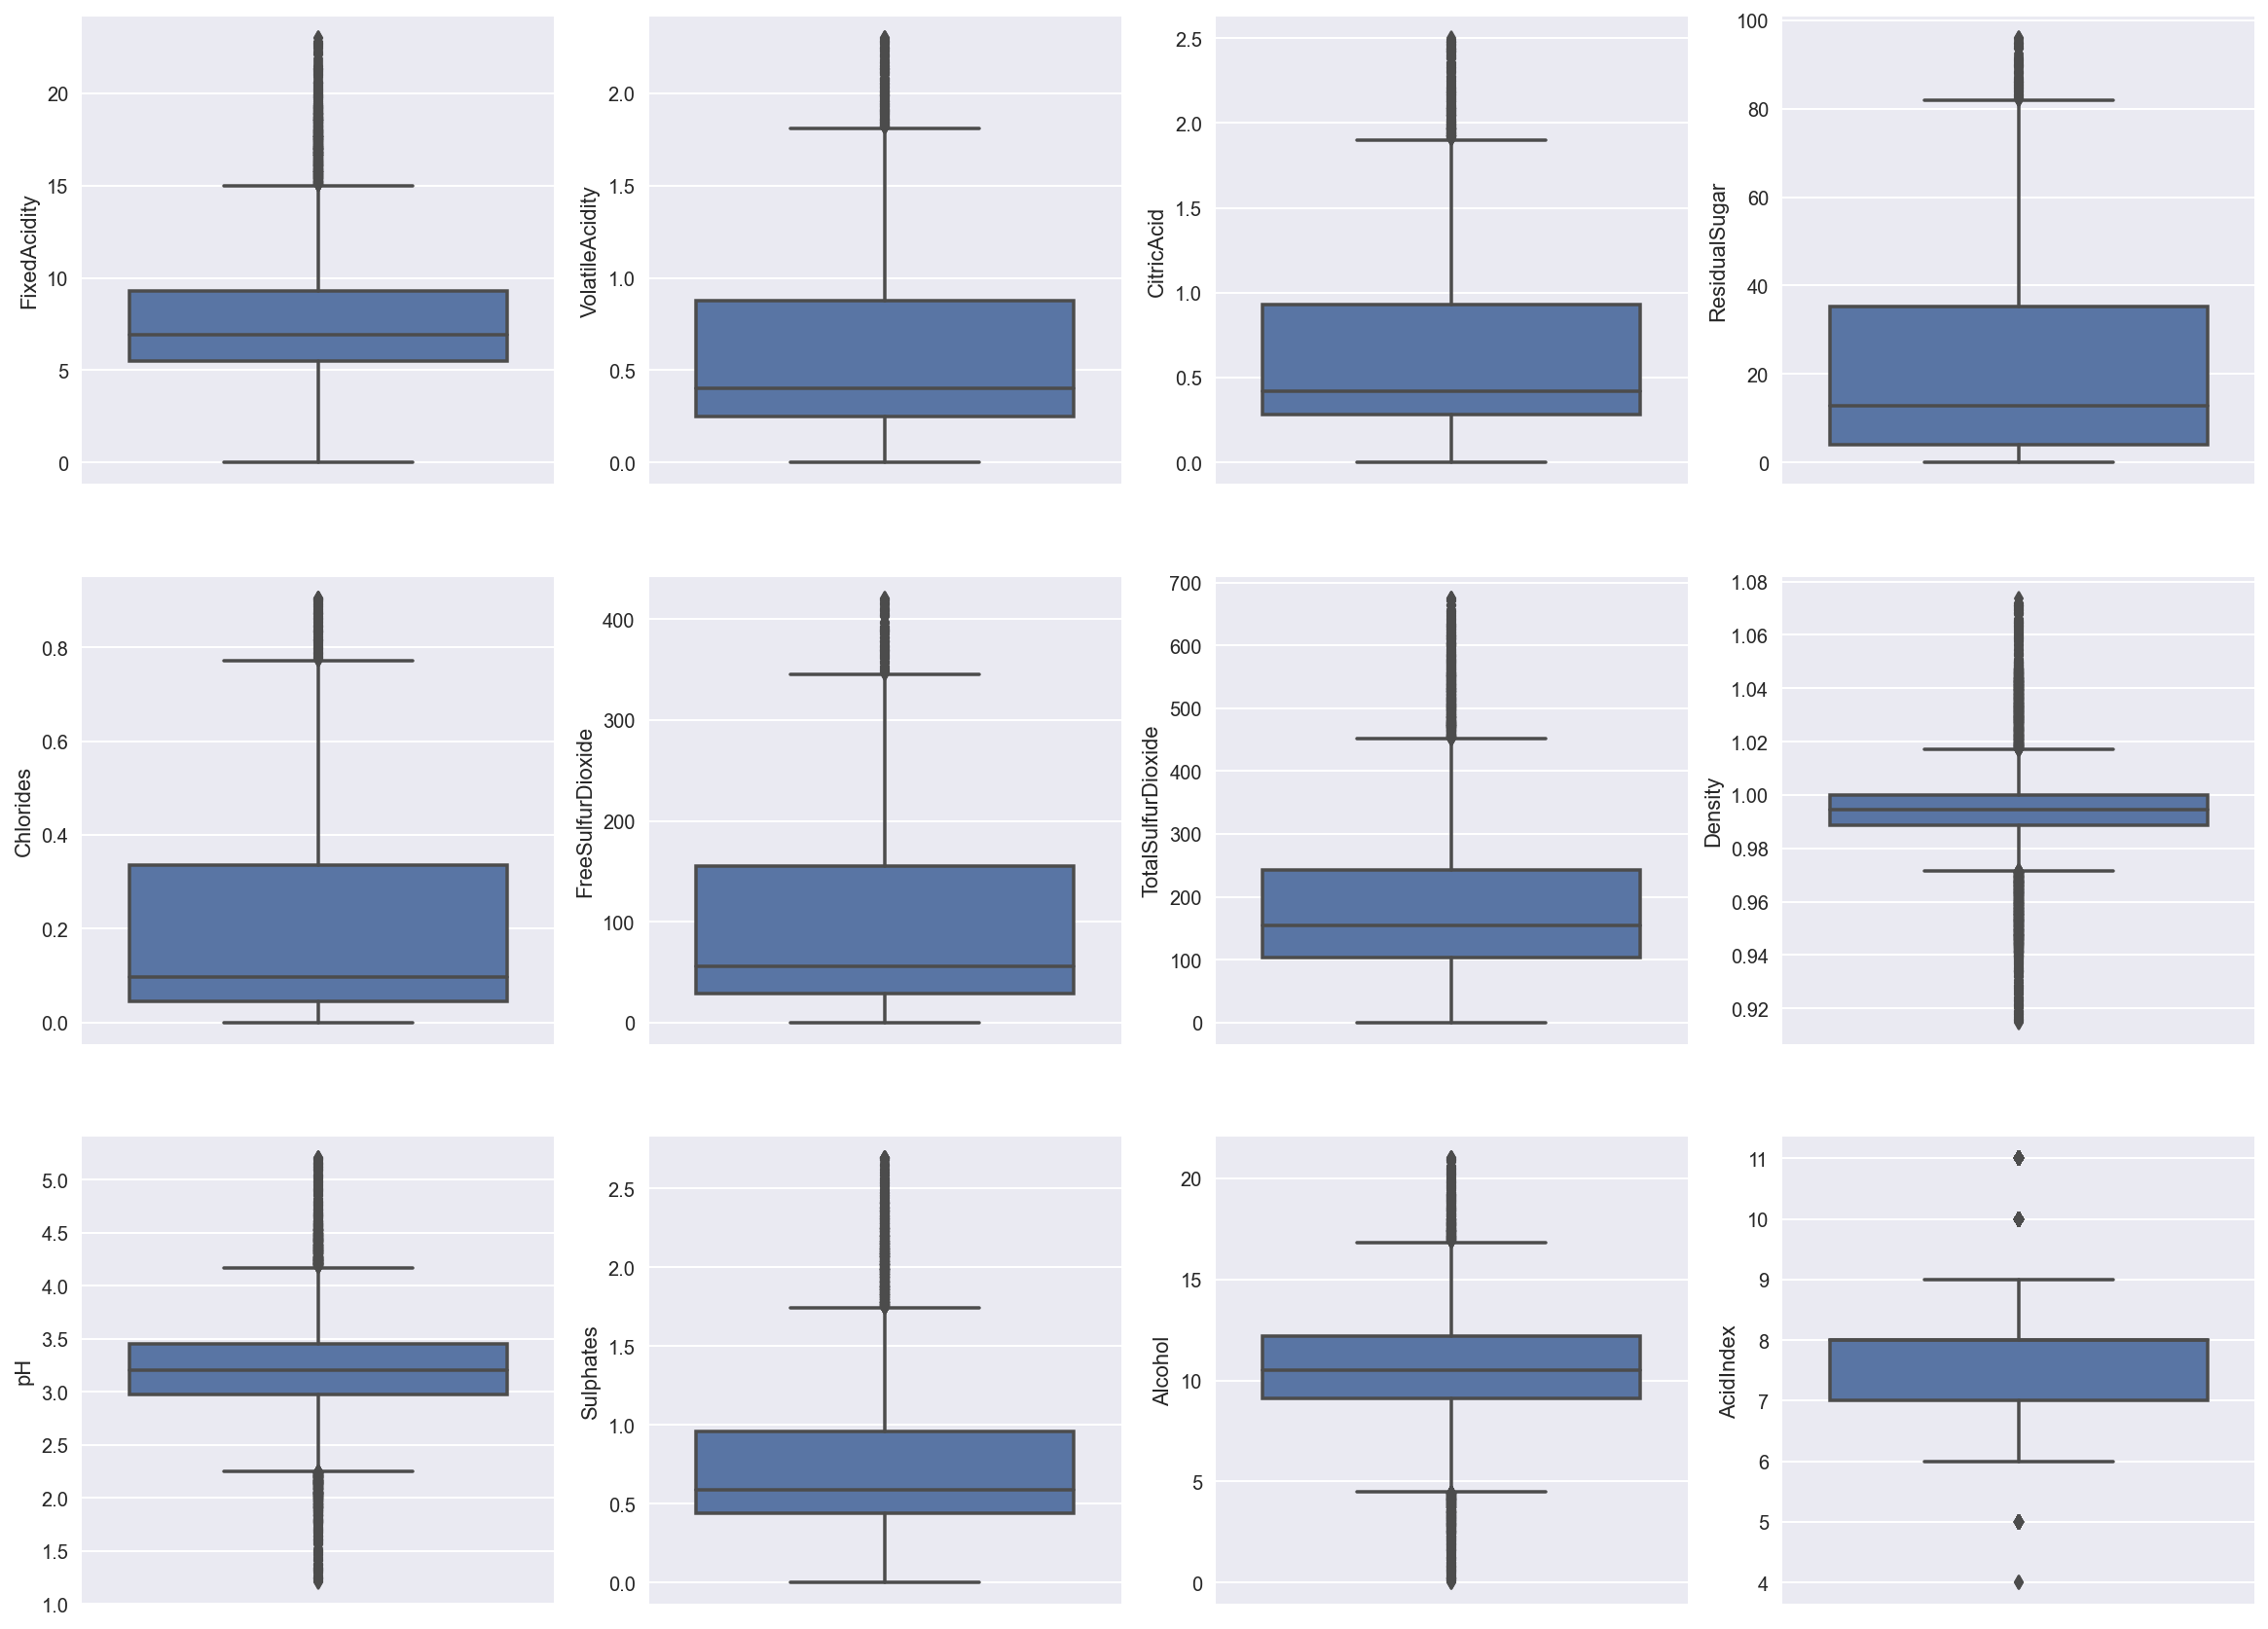

In [72]:
draw_boxpolt(wine_cleaned_df)

#### Summary of drop outliers.

From above statistic descriptions and histgrams, we can see as follows:

The distribution of all the variables becomes more centralized

Outliers become less, but there are still have some outliers for each variable. 

Some variables are still skewed distribution.

I will use domain knowledge and binning to distribute these variables.

### 4.3.2 Using BOX-COX to convert skewed distributions to normal distributions

I used the BOX-COX to solve the skewed distributions, but it didn't work well for this data set. I will cut numeric variables into categorical variables.


In [73]:
from scipy import stats
from scipy.special import boxcox1p
def boxcox_transfer(data_df, col, lmbda, original_df, show_plot = False):
    
    # boxcox
    key = "norm_stand_" + col
    data_df[key] = boxcox1p(data_df[col], lmbda)
    data_df[key] = preprocessing.scale(data_df[key])
    
    if (show_plot == True) :
        fig,axes = plt.subplots(ncols=3,nrows=2)
        fig.set_size_inches(15, 10)

        sns.histplot(original_df[col], label = "Non-Normal", ax=axes[0][0])
        stats.probplot(original_df[col], dist='norm', fit=True, plot=axes[0][1])
        sns.boxplot(data=original_df,y=col,orient="v",ax=axes[0][2])

        # after box-cox
        sns.histplot(data_df[key], label = "Normal" ,ax=axes[1][0])
        stats.probplot(data_df[key], dist='norm', fit=True, plot=axes[1][1])
        sns.boxplot(data=data_df,y=key,orient="v",ax=axes[1][2])

In [74]:
wine_cleaned_box_cox_df = wine_cleaned_df.copy()
# Using boxcox to build a normal distribution of FixedAcidity
#boxcox_transfer(wine_cleaned_box_cox_df, 'FixedAcidity', lmbda = 0.5, original_df = wine_df)

cols = ['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide'
        ,'TotalSulfurDioxide','Density','pH','Sulphates','Alcohol']

for col in cols:
    boxcox_transfer(wine_cleaned_df, col, lmbda = 0.5, original_df = wine_df)

In [75]:
wine_cleaned_df.head(3)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,norm_stand_VolatileAcidity,norm_stand_CitricAcid,norm_stand_ResidualSugar,norm_stand_Chlorides,norm_stand_FreeSulfurDioxide,norm_stand_TotalSulfurDioxide,norm_stand_Density,norm_stand_pH,norm_stand_Sulphates,norm_stand_Alcohol
0,3.0,3.2,1.160,0.98,54.2,0.567,56.0,268.0,0.99280,3.33,...,1.223087,0.730192,1.493548,1.830006,-0.296232,0.698464,-0.054447,0.233129,-0.309840,-0.075866
1,3.0,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,...,-0.989301,0.409034,0.474279,1.165193,-1.107908,1.055798,1.417054,0.312330,-0.081947,0.098052
3,3.0,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,...,-0.426840,-1.283834,0.127764,1.165193,-0.925940,-0.478514,0.096983,-1.623735,1.928831,-1.230106


The BOX-COX can convert a skewed distribution to a nearly normal distribution. Why didnot select the way to clean data?

- I have used BOX-COX to convert all numeric variables, but the R^2 of Linear Regression was not good.
- After doing the research of wine, I deciede convert all numeric variables to categorical variables. Then useing Logisitic Regression to predict Response variable.

### 4.4 Discretization/Binning

 - 4.4.1 Using Domain Knowledge to create bins
 
 - 4.4.2 Using number of bins = sqrt(n)
 

In [76]:
# backup data set
wine_cleaned_df_bak = wine_cleaned_df.copy()

### 4.4.1 Using Domain Knowledge to create bins

#### Discretization & Binning of FixedAcidity

- 0 - 6 g/L : low acid
- 6 - 10 g/L : mid acid
- 10 - max g/L : high acid

In [77]:
cut_labels_4 = ['FA:low acid', 'FA:mid acid', 'FA:high acid']
cut_bins = [-10,6,10,100]
wine_cleaned_df['Manual_FixedAcidity'] = pd.cut(wine_cleaned_df['FixedAcidity'], bins=cut_bins, labels=cut_labels_4)

#wine_cleaned_df['Manual_FixedAcidity'].value_counts().plot.bar()

####  Discretization & Binning of VolatileAcidity

- less than 0.7 g/L : taste no-acid
- 0.7 - 1.3 g/L : taste good
- large than 1.3 g/L : taste unpleasant

In [78]:
cut_labels_4 = ['VA:taste no-acid', 'VA:taste good', 'VA:taste unpleasant']
cut_bins = [-10,0.7,1.3,100]
wine_cleaned_df['Manual_VolatileAcidity'] = pd.cut(wine_cleaned_df['VolatileAcidity'], bins=cut_bins, labels=cut_labels_4)

#wine_cleaned_df['Manual_VolatileAcidity'].value_counts().plot.bar()

####  Discretization & Binning of Citric acid

- less than 1 g/L good
- large than 1 g/L bad

In [79]:
cut_labels_4 = ['CA:good', 'CA:bad']
cut_bins = [-10,1,100]
wine_cleaned_df['Manual_CitricAcid'] = pd.cut(wine_cleaned_df['CitricAcid'], bins=cut_bins, labels=cut_labels_4)
#wine_cleaned_df['Manual_CitricAcid'].value_counts().plot.bar()

####  Discretization & Binning of ResidualSugar

- 0 - 4 g/L : dry wine
- 4 - 12 g/L : semi-dry wine 
- 12 - 45 g/L : semi-sweet wine
- 45 - max g/L : sweet wine

In [80]:
cut_labels_4 = ['RS:dry wine', 'RS:semi-dry wine', 'RS:semi-sweet wine', 'RS:sweet wine']
cut_bins = [-10, 4, 12, 45, 100]
wine_cleaned_df['Manual_ResidualSugar'] = pd.cut(wine_cleaned_df['ResidualSugar'], bins=cut_bins, labels=cut_labels_4)
#wine_cleaned_df['Manual_ResidualSugar'].value_counts().plot.bar()

####  Discretization & Binning of Chlorides

- 0 - 0.2 g/L good
- 0.2 - 0.607 g/L acceptable
- 0.607 - max g/L bad

In [81]:
cut_labels_4 = ['C:good', 'C:acceptable', 'C:bad']
cut_bins = [-10, 0.2, 0.607, 100]
wine_cleaned_df['Manual_Chlorides'] = pd.cut(wine_cleaned_df['Chlorides'], bins=cut_bins, labels=cut_labels_4)
#wine_cleaned_df['Manual_Chlorides'].value_counts().plot.bar()

####  Discretization & Binning of FreeSulfurDioxide

I do not transfer it.

####  Discretization & Binning of TotalSulfurDioxide

- 0 - 1 mg/L : No Sulfites
- 1 - 350 mg/L : Contains Sulfites
- 350 - max mg/L : Don't buy

In [82]:
cut_labels_4 = ['TSD:no sulfites', 'TSD:has sulfites', 'TSD:dont buy']
cut_bins = [-10000, 1, 350, 10000]
wine_cleaned_df['Manual_TotalSulfurDioxide'] = pd.cut(wine_cleaned_df['TotalSulfurDioxide'], bins=cut_bins, labels=cut_labels_4)
#wine_cleaned_df['Manual_TotalSulfurDioxide'].value_counts().plot.bar()

####  Discretization & Binning of Density

- less than 1.0 : yeast done / contain high alcohol / low sugar
- large than 1.0 : yeast not well / contain low alcohol / high sugar

In [83]:
cut_labels_4 = ['D:high ach low sugar', 'D:low ach high sugar']
cut_bins = [-10000, 1, 10000]
wine_cleaned_df['Manual_Density'] = pd.cut(wine_cleaned_df['Density'], bins=cut_bins, labels=cut_labels_4)
#wine_cleaned_df['Manual_Density'].value_counts().plot.bar()

####  Discretization & Binning of pH

- 0 - 3 : sweet whites
- 3 - 3.1 : light-bodied whites
- 3.1 - 3.5 : red & white wines
- 3.5 - 4 : low-acid red wines
- 4 - max : very low-acid red wines

In [84]:
cut_labels_4 = ['PH:sweet whites', 'PH:light-bodied whites', 'PH:red & white wines', 'PH:low-acid red wines', 'PH:very low-acid red wines']
cut_bins = [-100, 3, 3.1, 3.5, 4, 100]
wine_cleaned_df['Manual_pH'] = pd.cut(wine_cleaned_df['pH'], bins=cut_bins, labels=cut_labels_4)
#wine_cleaned_df['Manual_pH'].value_counts().plot.bar()

####  Discretization & Binning of Sulphates
I do not transfer it.

####  Discretization & Binning of Alcohol

- 0 - 10% : Low Alcohol Wines
- 10 - 11.5% : Medium-Low Alcohol Wines
- 11.5 - 13.5% : Medium Alcohol Wines
- 13.5 - 15% : Medium-High Alcohol Wines
- 15 - over% : High Alcohol Wines

In [85]:
cut_labels_4 = ['ACH:Low', 'ACH:Medium-Low', 'ACH:Medium', 'ACH:Medium-High', 'ACH:High']
cut_bins = [-100, 10, 11.5, 13.5, 15, 100]
wine_cleaned_df['Manual_Alcohol'] = pd.cut(wine_cleaned_df['Alcohol'], bins=cut_bins, labels=cut_labels_4)
#wine_cleaned_df['Manual_Alcohol'].value_counts().plot.bar()

#### Discretization & Binning of AcidIndex
- Convert into 3 levels

In [86]:
cut_labels_4 = ['AI:Low', 'AI:Medium-Low', 'AI:High']

wine_cleaned_df['Manual_AcidIndex'] = pd.qcut(wine_cleaned_df['AcidIndex'], q=4, labels=cut_labels_4, duplicates= 'drop')
#wine_cleaned_df['Manual_AcidIndex'].value_counts().plot.bar()

In [87]:
# see the columns
wine_cleaned_df.columns

Index(['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS', 'norm_stand_FixedAcidity', 'norm_stand_VolatileAcidity',
       'norm_stand_CitricAcid', 'norm_stand_ResidualSugar',
       'norm_stand_Chlorides', 'norm_stand_FreeSulfurDioxide',
       'norm_stand_TotalSulfurDioxide', 'norm_stand_Density', 'norm_stand_pH',
       'norm_stand_Sulphates', 'norm_stand_Alcohol', 'Manual_FixedAcidity',
       'Manual_VolatileAcidity', 'Manual_CitricAcid', 'Manual_ResidualSugar',
       'Manual_Chlorides', 'Manual_TotalSulfurDioxide', 'Manual_Density',
       'Manual_pH', 'Manual_Alcohol', 'Manual_AcidIndex'],
      dtype='object')

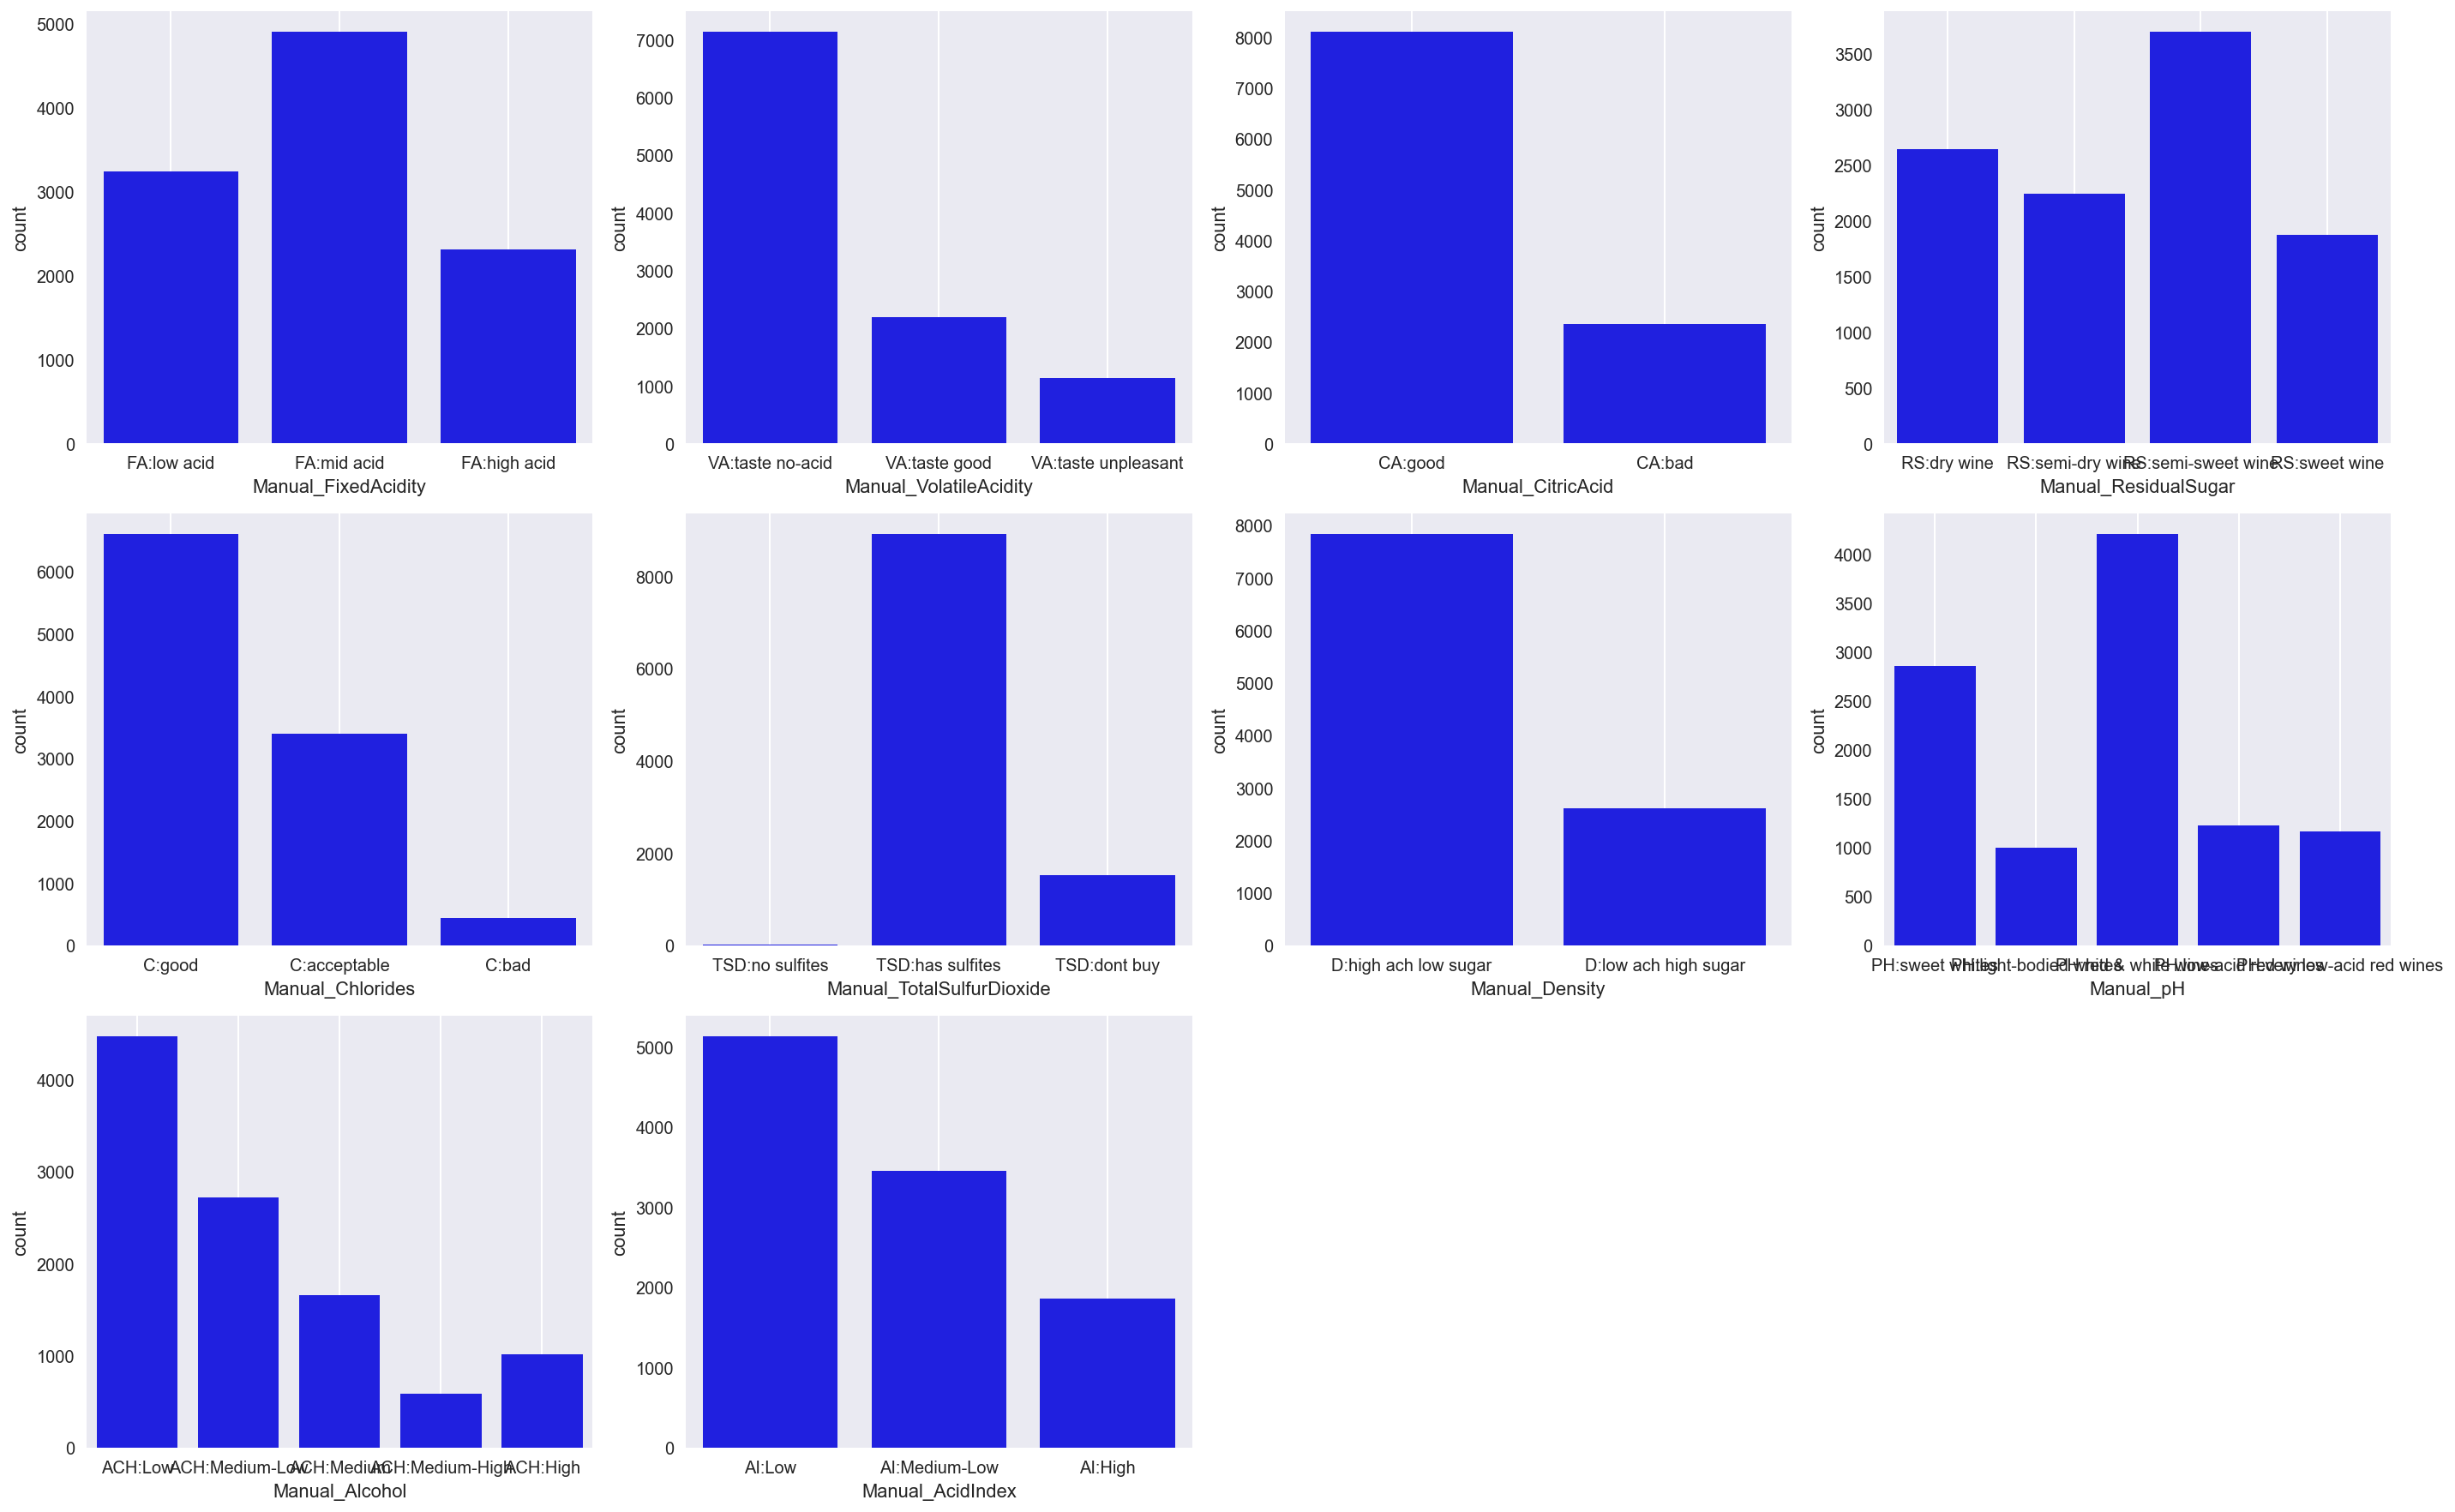

In [88]:
# see the bar chart
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(['Manual_FixedAcidity', 'Manual_VolatileAcidity','Manual_CitricAcid',
                              'Manual_ResidualSugar','Manual_Chlorides','Manual_TotalSulfurDioxide', 
                              'Manual_Density', 'Manual_pH', 'Manual_Alcohol', 'Manual_AcidIndex'])):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=wine_cleaned_df, color='blue')
    plt.grid()
    plt.tight_layout()

### 4.4.2 Using number of bins = sqrt(n) to create bins (Skip this step for assignment 3)

I will calculate the size of bins for each variable by bins = sqrt(n). n is the number of records in the data set.

In [89]:
# a function to create bins
def sqrt_bins(data_df, col, draw = False):
    
    # get sqrt of the number of rows
    sqrt_n = int(math.sqrt( data_df.shape[0] ))
    
    # create a new name for new categarical variable
    new_col = "Auto_" + col
    
    # Convert to bins by qcut
    data_df[new_col]= pd.qcut(data_df[col], sqrt_n, duplicates= 'drop')
    
    if draw == True:
        data_df[col].hist(bins=sqrt_n)
        plt.show()

        data_df[new_col].value_counts(sort=False).plot.bar()
        plt.show()
    
    print("%s has converted as %d bins. New column name is %s" %(col, sqrt_n, new_col))

# test code
# sqrt_bins(wine_cleaned_df_bak, 'FixedAcidity')

#cols = ['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide'
#        ,'TotalSulfurDioxide','Density','pH','Sulphates','Alcohol']

#for col in cols:
#    sqrt_bins(wine_cleaned_df, col)

In [90]:
# see the columns
# wine_cleaned_df.columns

### 4.5 Derivable variables

- 4.5.1 Create a binary indicate variable for TARGET
  - 0 mean that the wines are not sold. Other values mean that the wines are sold.

- 4.5.2 Create a rate variable that equals FreeSulfurDioxide / TotalSulfurDioxide.

### 4.5.1 Create a binary indicate variable for TARGET

In [91]:
def get_target_type(x):
    if x["TARGET"] > 0:
        # it has a sales. (1 - max)
        return 1
    else:
        # it has not a sales. (0)
        return 0

In [92]:
# axis ==1, columns
wine_cleaned_df.loc[:,"Indicator_TARGET"] = wine_cleaned_df.apply(get_target_type, axis=1)

In [93]:
wine_cleaned_df["Indicator_TARGET"].value_counts()

1    8323
0    2124
Name: Indicator_TARGET, dtype: int64

### 4.5.2 Create a rate variable that equals FreeSulfurDioxide / TotalSulfurDioxide.

There are lots of rates that equal FreeSulfurDioxide / TotalSulfurDioxide greater than one. The reason for this is that there is dirty data. I assign rates to 1, if rates larger than 1. 

In [94]:
def get_rate_sulfur(x):

    if abs(x['TotalSulfurDioxide']) <= 0:
        return 0.0
    else:
        rate = abs(x['FreeSulfurDioxide']) / abs(x['TotalSulfurDioxide'])
        if rate > 1.0:
            rate = 1.0
        return rate

In [95]:
wine_cleaned_df.loc[:,"Rate_TotalSulfurDioxide"] = wine_cleaned_df.apply(get_rate_sulfur, axis=1)

In [96]:
wine_cleaned_df['Rate_TotalSulfurDioxide'].head(3)

0    0.208955
1    0.045872
3    0.191304
Name: Rate_TotalSulfurDioxide, dtype: float64

In [97]:
wine_cleaned_df['Rate_TotalSulfurDioxide'].describe()

count    10447.000000
mean         0.489000
std          0.360183
min          0.000000
25%          0.174461
50%          0.363636
75%          0.989617
max          1.000000
Name: Rate_TotalSulfurDioxide, dtype: float64

<AxesSubplot:>

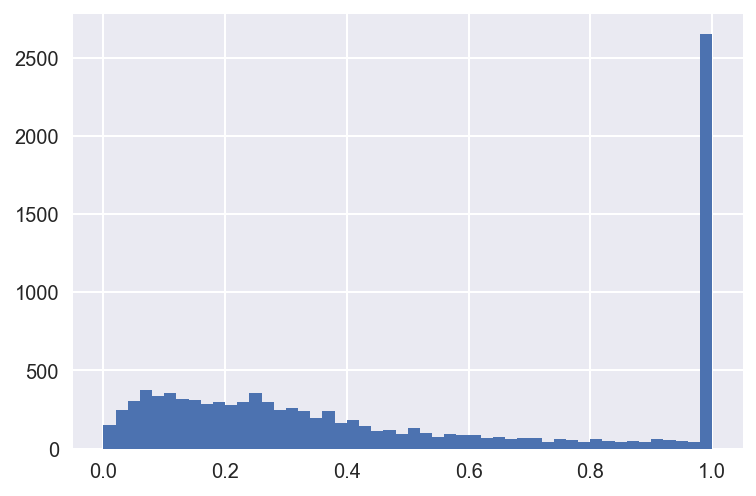

In [98]:
wine_cleaned_df['Rate_TotalSulfurDioxide'].hist(bins = 50)

From the above histogram, we can see there are more than 2500 values greater than 1. I think the rate can not be a useful variable.

Next, drop this new variables.

In [99]:
wine_cleaned_df.drop(['Rate_TotalSulfurDioxide'], axis = 1, inplace=True)

# 5. Re-run Exploratory Data Analysis
- Using statistic information to explore categorical variables.

- Using bar chart to see the categorical variables.

In [100]:
# see the columns
wine_cleaned_df.columns

Index(['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS', 'norm_stand_FixedAcidity', 'norm_stand_VolatileAcidity',
       'norm_stand_CitricAcid', 'norm_stand_ResidualSugar',
       'norm_stand_Chlorides', 'norm_stand_FreeSulfurDioxide',
       'norm_stand_TotalSulfurDioxide', 'norm_stand_Density', 'norm_stand_pH',
       'norm_stand_Sulphates', 'norm_stand_Alcohol', 'Manual_FixedAcidity',
       'Manual_VolatileAcidity', 'Manual_CitricAcid', 'Manual_ResidualSugar',
       'Manual_Chlorides', 'Manual_TotalSulfurDioxide', 'Manual_Density',
       'Manual_pH', 'Manual_Alcohol', 'Manual_AcidIndex', 'Indicator_TARGET'],
      dtype='object')

In [101]:
# all columns
re_eda_all_cols = ['Indicator_TARGET', 'LabelAppeal', 'Manual_AcidIndex',
       'STARS', 'Manual_FixedAcidity', 'Manual_VolatileAcidity',
       'Manual_CitricAcid', 'Manual_ResidualSugar', 'Manual_Chlorides',
       'Manual_TotalSulfurDioxide', 'Manual_Density', 'Manual_pH',
       'Manual_Alcohol', 'norm_stand_FixedAcidity', 'norm_stand_VolatileAcidity',
       'norm_stand_CitricAcid', 'norm_stand_ResidualSugar',
       'norm_stand_Chlorides', 'norm_stand_FreeSulfurDioxide',
       'norm_stand_TotalSulfurDioxide', 'norm_stand_Density', 'norm_stand_pH',
       'norm_stand_Sulphates', 'norm_stand_Alcohol']

# all numerical columns
re_eda_num_cols = ['norm_stand_FixedAcidity', 'norm_stand_VolatileAcidity',
       'norm_stand_CitricAcid', 'norm_stand_ResidualSugar',
       'norm_stand_Chlorides', 'norm_stand_FreeSulfurDioxide',
       'norm_stand_TotalSulfurDioxide', 'norm_stand_Density', 'norm_stand_pH',
       'norm_stand_Sulphates', 'norm_stand_Alcohol']

# all categorical columns
re_eda_cate_cols = ['LabelAppeal', 'Manual_AcidIndex',
       'STARS', 'Manual_FixedAcidity', 'Manual_VolatileAcidity',
       'Manual_CitricAcid', 'Manual_ResidualSugar', 'Manual_Chlorides',
       'Manual_TotalSulfurDioxide', 'Manual_Density', 'Manual_pH',
       'Manual_Alcohol']

In [102]:
# copy a data set for re-EDA
re_eda_df = wine_cleaned_df[re_eda_all_cols].copy()

In [103]:
# To see the data values
re_eda_df.head(3)

,Indicator_TARGET,LabelAppeal,Manual_AcidIndex,STARS,Manual_FixedAcidity,Manual_VolatileAcidity,Manual_CitricAcid,Manual_ResidualSugar,Manual_Chlorides,Manual_TotalSulfurDioxide,...,norm_stand_VolatileAcidity,norm_stand_CitricAcid,norm_stand_ResidualSugar,norm_stand_Chlorides,norm_stand_FreeSulfurDioxide,norm_stand_TotalSulfurDioxide,norm_stand_Density,norm_stand_pH,norm_stand_Sulphates,norm_stand_Alcohol
0,1,0.0,AI:Medium-Low,2.0,FA:low acid,VA:taste good,CA:good,RS:sweet wine,C:acceptable,TSD:has sulfites,...,1.223087,0.730192,1.493548,1.830006,-0.296232,0.698464,-0.054447,0.233129,-0.309840,-0.075866
1,1,-1.0,AI:Low,3.0,FA:low acid,VA:taste no-acid,CA:good,RS:semi-sweet wine,C:acceptable,TSD:has sulfites,...,-0.989301,0.409034,0.474279,1.165193,-1.107908,1.055798,1.417054,0.312330,-0.081947,0.098052
3,1,-1.0,AI:Low,1.0,FA:low acid,VA:taste no-acid,CA:good,RS:semi-sweet wine,C:acceptable,TSD:has sulfites,...,-0.426840,-1.283834,0.127764,1.165193,-0.925940,-0.478514,0.096983,-1.623735,1.928831,-1.230106


In [104]:
# To see data size
re_eda_df.shape

(10447, 24)

Next, I will transfer some int columns into categorical columns

In [105]:
# convert LabelAppeal and STARS as categorical variables
re_eda_df[['STARS', 'LabelAppeal']] = re_eda_df[['STARS', 'LabelAppeal']].astype("category")
re_eda_df[['Indicator_TARGET']] = re_eda_df[['Indicator_TARGET']].astype("int")

In [106]:
# show the basic information of the data set
re_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10447 entries, 0 to 12794
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Indicator_TARGET               10447 non-null  int32   
 1   LabelAppeal                    10447 non-null  category
 2   Manual_AcidIndex               10447 non-null  category
 3   STARS                          10447 non-null  category
 4   Manual_FixedAcidity            10447 non-null  category
 5   Manual_VolatileAcidity         10447 non-null  category
 6   Manual_CitricAcid              10447 non-null  category
 7   Manual_ResidualSugar           10447 non-null  category
 8   Manual_Chlorides               10447 non-null  category
 9   Manual_TotalSulfurDioxide      10447 non-null  category
 10  Manual_Density                 10447 non-null  category
 11  Manual_pH                      10447 non-null  category
 12  Manual_Alcohol                 1

The above table shows that the data set does not have Null value and all variables of it are categorical.

Next, I want to see the description of all columns.

In [107]:
# To describe the data set
re_eda_df[['Indicator_TARGET'] + re_eda_num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Indicator_TARGET,10447.0,7.966880e-01,0.402482,0.000000,1.000000,1.000000,1.000000,1.000000
norm_stand_FixedAcidity,10447.0,1.062135e-16,1.000048,-2.408101,-0.397511,-0.058607,0.458690,2.651080
norm_stand_VolatileAcidity,10447.0,-1.870386e-17,1.000048,-1.423332,-0.758287,-0.391029,0.657469,3.177621
norm_stand_CitricAcid,10447.0,3.974571e-18,1.000048,-1.386812,-0.703698,-0.390318,0.637216,3.141401
norm_stand_ResidualSugar,10447.0,-7.487921e-17,1.000048,-1.453325,-0.891943,-0.202893,0.845924,2.602320
norm_stand_Chlorides,10447.0,1.652741e-16,1.000048,-1.052951,-0.792575,-0.505038,0.731499,3.300329
norm_stand_FreeSulfurDioxide,10447.0,-1.569849e-16,1.000048,-1.793864,-0.770138,-0.296232,0.837914,2.674596
norm_stand_TotalSulfurDioxide,10447.0,3.730145e-18,1.000048,-2.520724,-0.587911,-0.127447,0.535277,2.704817
norm_stand_Density,10447.0,1.490547e-15,1.000048,-3.372693,-0.231711,0.012872,0.248277,3.318264
norm_stand_pH,10447.0,-1.303744e-16,1.000048,-3.717910,-0.351167,0.025040,0.422455,2.937880


Next, to check the correlation values between response variable(Indicator_TARGET) and other numerical variables.

In [108]:
corr_matrix = re_eda_df[['Indicator_TARGET'] + re_eda_num_cols].corr()
corr_matrix['Indicator_TARGET'].sort_values(ascending = False)

Indicator_TARGET                 1.000000
norm_stand_TotalSulfurDioxide    0.089863
norm_stand_FreeSulfurDioxide     0.036935
norm_stand_CitricAcid            0.024978
norm_stand_ResidualSugar         0.018578
norm_stand_Alcohol               0.001578
norm_stand_Density              -0.013590
norm_stand_Chlorides            -0.015391
norm_stand_pH                   -0.032638
norm_stand_FixedAcidity         -0.040130
norm_stand_Sulphates            -0.050030
norm_stand_VolatileAcidity      -0.069679
Name: Indicator_TARGET, dtype: float64

All correlation values are blow 0.5. The correlations can not be a reason for selecting variables to train models.

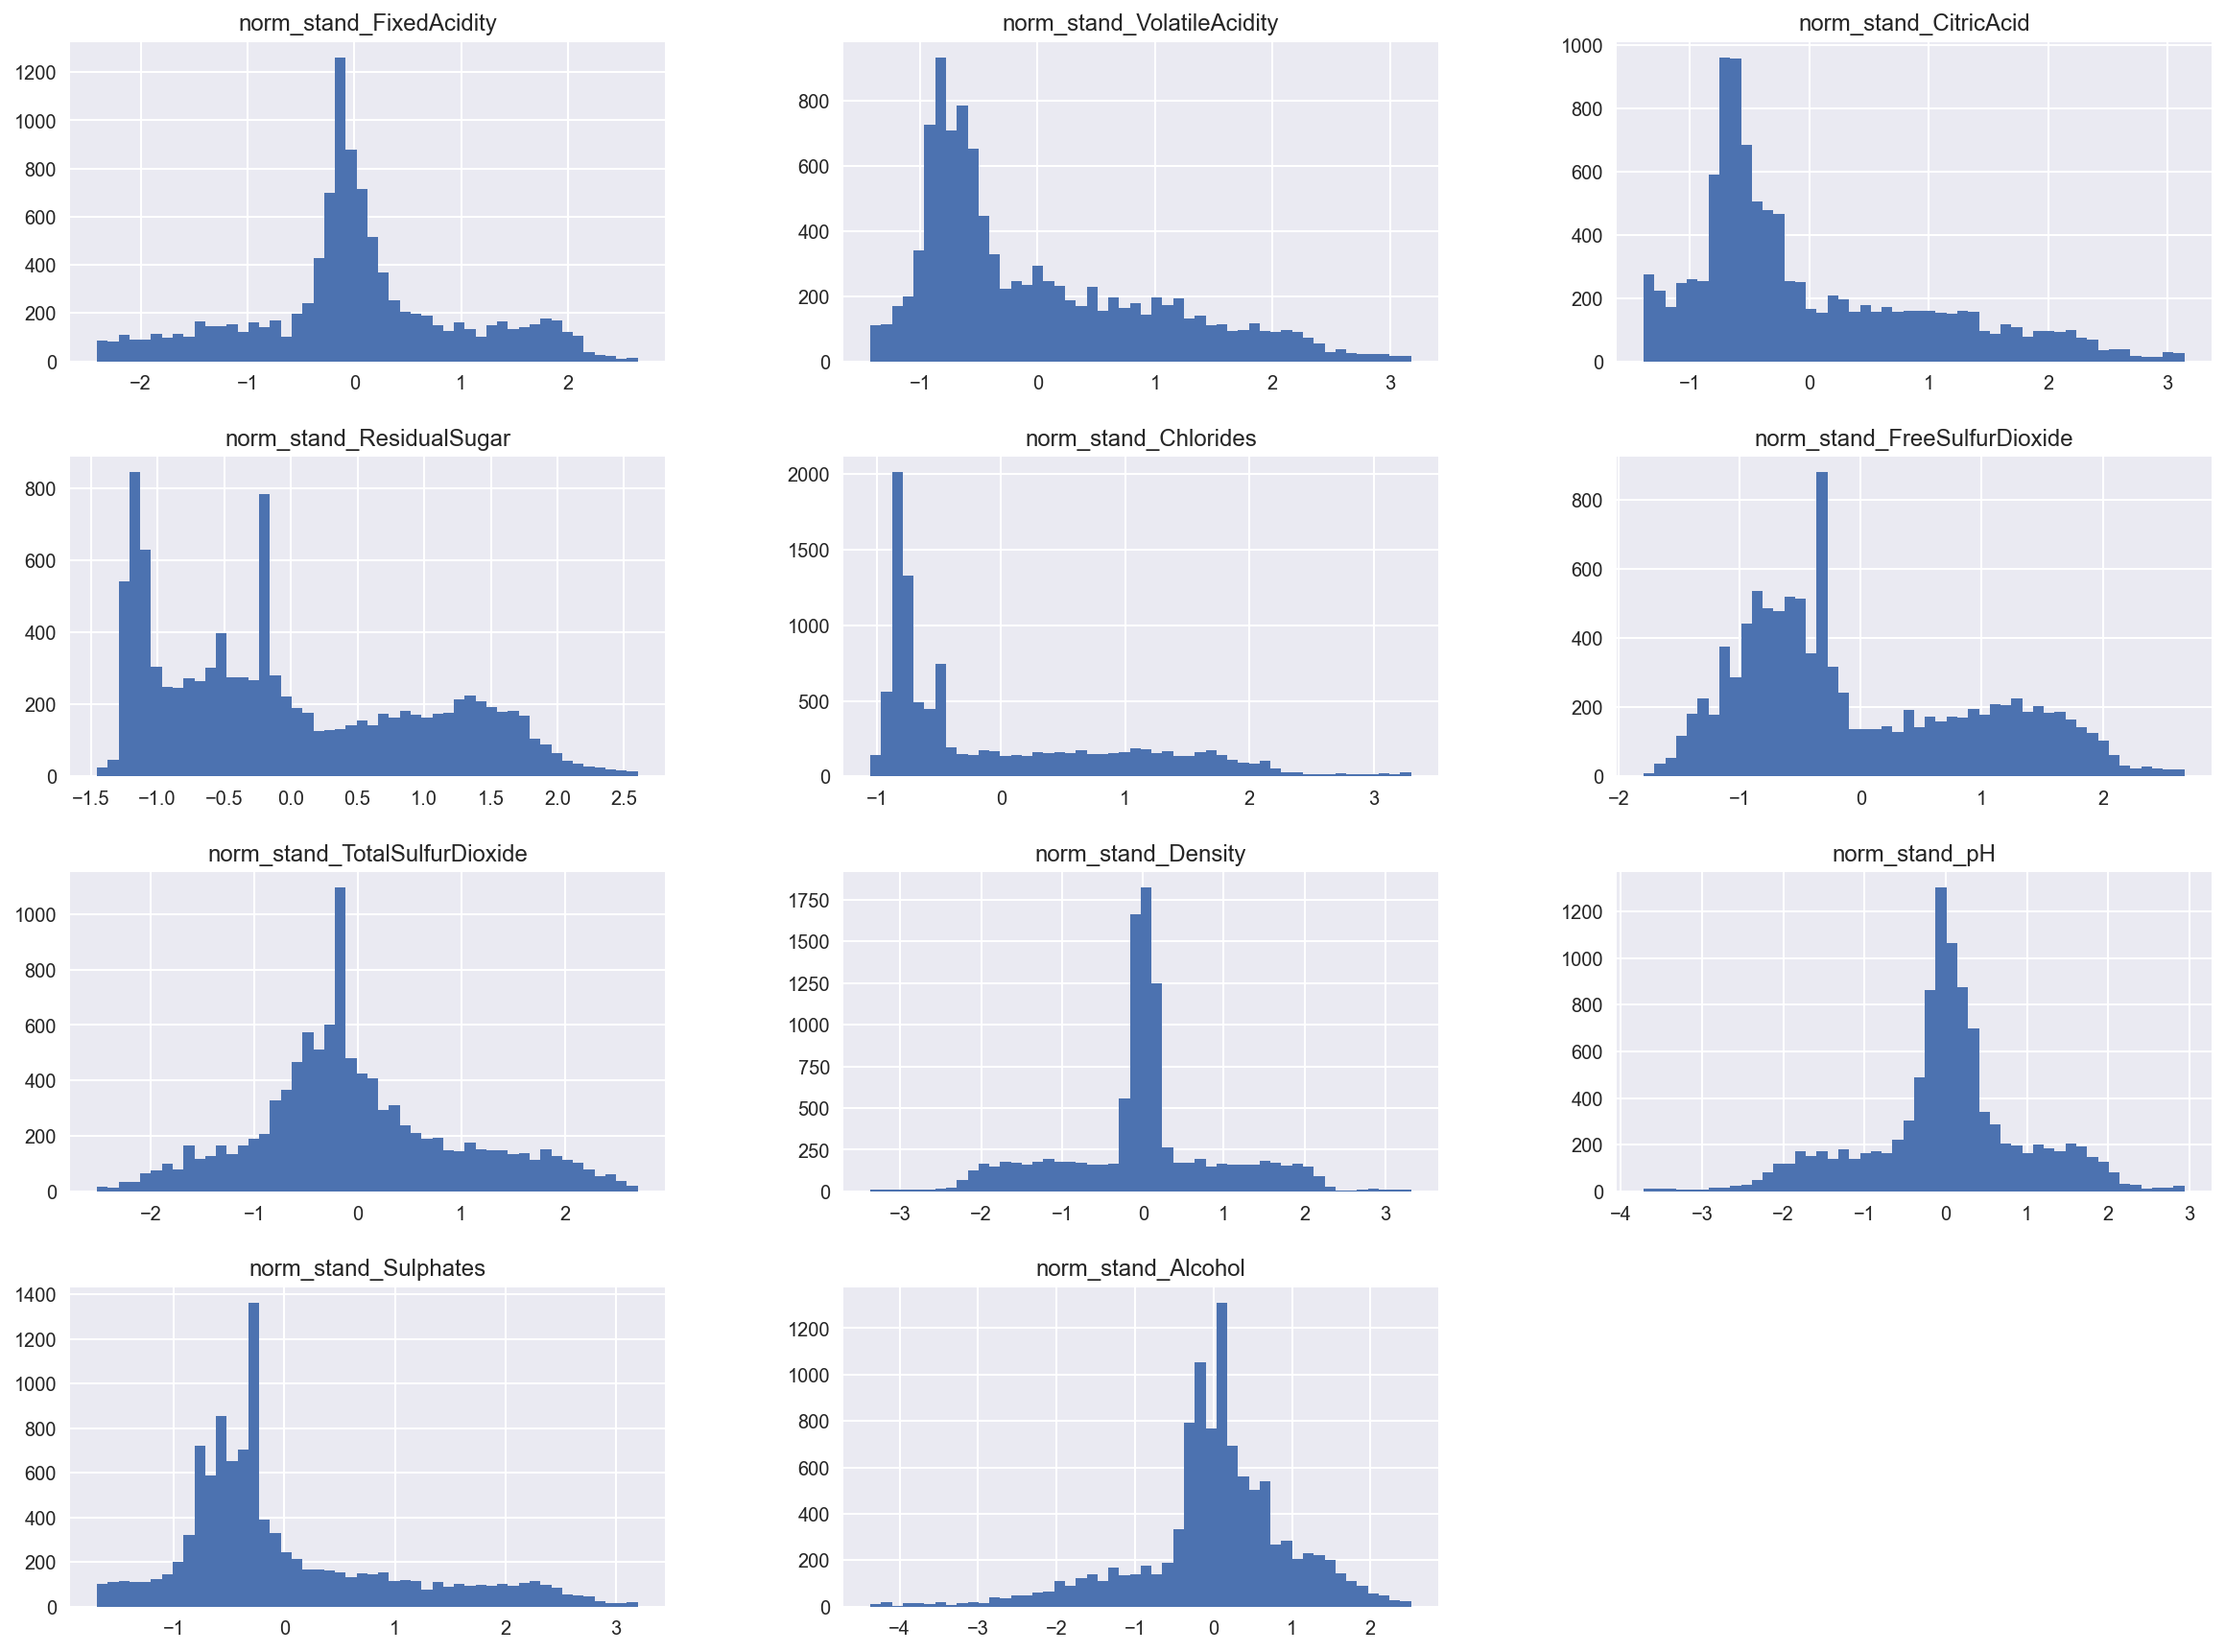

In [109]:
# draw histgrams
re_eda_df[re_eda_num_cols].hist(bins=50, figsize=(20,15))
plt.show()

From above histograms we can see as followed:

After processing BOX-COx and Standardize, the norm_stand_FixedAcidity, norm_stand_TotalSulfurDioxide, and norm_stand_pH are nearly normal distribution. I will select the 3 variables to train the Logistic Model.

Next, I will explore categorical variables that are created by learnt domain knowledge.

In [110]:
# To describe the data set
re_eda_df[re_eda_cate_cols].describe().T

,count,unique,top,freq
LabelAppeal,10447,5,0,4576
Manual_AcidIndex,10447,3,AI:Low,5138
STARS,10447,5,2,2940
Manual_FixedAcidity,10447,3,FA:mid acid,4898
Manual_VolatileAcidity,10447,3,VA:taste no-acid,7130
Manual_CitricAcid,10447,2,CA:good,8101
Manual_ResidualSugar,10447,4,RS:semi-sweet wine,3693
Manual_Chlorides,10447,3,C:good,6605
Manual_TotalSulfurDioxide,10447,3,TSD:has sulfites,8914
Manual_Density,10447,2,D:high ach low sugar,7836


All have more than 2 attribute.

The TSD:has sulfites in Manual_TotalSulfurDioxide has 14282 records.

Then, I want to see the the ratio of attributes for each column.

In [111]:
from IPython.display import HTML, display
def display_html_ratio_table(data):
    
    df_shape = re_eda_df.shape
    re_eda_column_names = re_eda_df.columns
    
    for i in range(len(data.columns)):
        
        html = "<table>"
        html += "<tr><td>name</td><td>count</td><td>ratio</td></tr>"
        
        g = data.iloc[:,i].value_counts()

        print(re_eda_column_names[i])
        
        for index, value in g.items():
            html += "<tr><td>%s</td><td>%d</td><td>%.4f</td></tr>" %(index, value, value / df_shape[0])

        html += "</table>"
        display(HTML(html))

display_html_ratio_table(re_eda_df[re_eda_cate_cols])

Indicator_TARGET


name,count,ratio
0.0,4576,0.4380
-1.0,2583,0.2472
1.0,2476,0.2370
2.0,408,0.0391
-2.0,404,0.0387


LabelAppeal


name,count,ratio
AI:Low,5138,0.4918
AI:Medium-Low,3453,0.3305
AI:High,1856,0.1777


Manual_AcidIndex


name,count,ratio
2.0,2940,0.2814
0.0,2654,0.2540
1.0,2504,0.2397
3.0,1837,0.1758
4.0,512,0.0490


STARS


name,count,ratio
FA:mid acid,4898,0.4688
FA:low acid,3234,0.3096
FA:high acid,2315,0.2216


Manual_FixedAcidity


name,count,ratio
VA:taste no-acid,7130,0.6825
VA:taste good,2190,0.2096
VA:taste unpleasant,1127,0.1079


Manual_VolatileAcidity


name,count,ratio
CA:good,8101,0.7754
CA:bad,2346,0.2246


Manual_CitricAcid


name,count,ratio
RS:semi-sweet wine,3693,0.3535
RS:dry wine,2644,0.2531
RS:semi-dry wine,2240,0.2144
RS:sweet wine,1870,0.1790


Manual_ResidualSugar


name,count,ratio
C:good,6605,0.6322
C:acceptable,3398,0.3253
C:bad,444,0.0425


Manual_Chlorides


name,count,ratio
TSD:has sulfites,8914,0.8533
TSD:dont buy,1517,0.1452
TSD:no sulfites,16,0.0015


Manual_TotalSulfurDioxide


name,count,ratio
D:high ach low sugar,7836,0.7501
D:low ach high sugar,2611,0.2499


Manual_Density


name,count,ratio
PH:red & white wines,4203,0.4023
PH:sweet whites,2858,0.2736
PH:low-acid red wines,1226,0.1174
PH:very low-acid red wines,1164,0.1114
PH:light-bodied whites,996,0.0953


Manual_pH


name,count,ratio
ACH:Low,4474,0.4283
ACH:Medium-Low,2722,0.2606
ACH:Medium,1658,0.1587
ACH:High,1008,0.0965
ACH:Medium-High,585,0.0560


Then, to draw bar charts to illustrate each columns.

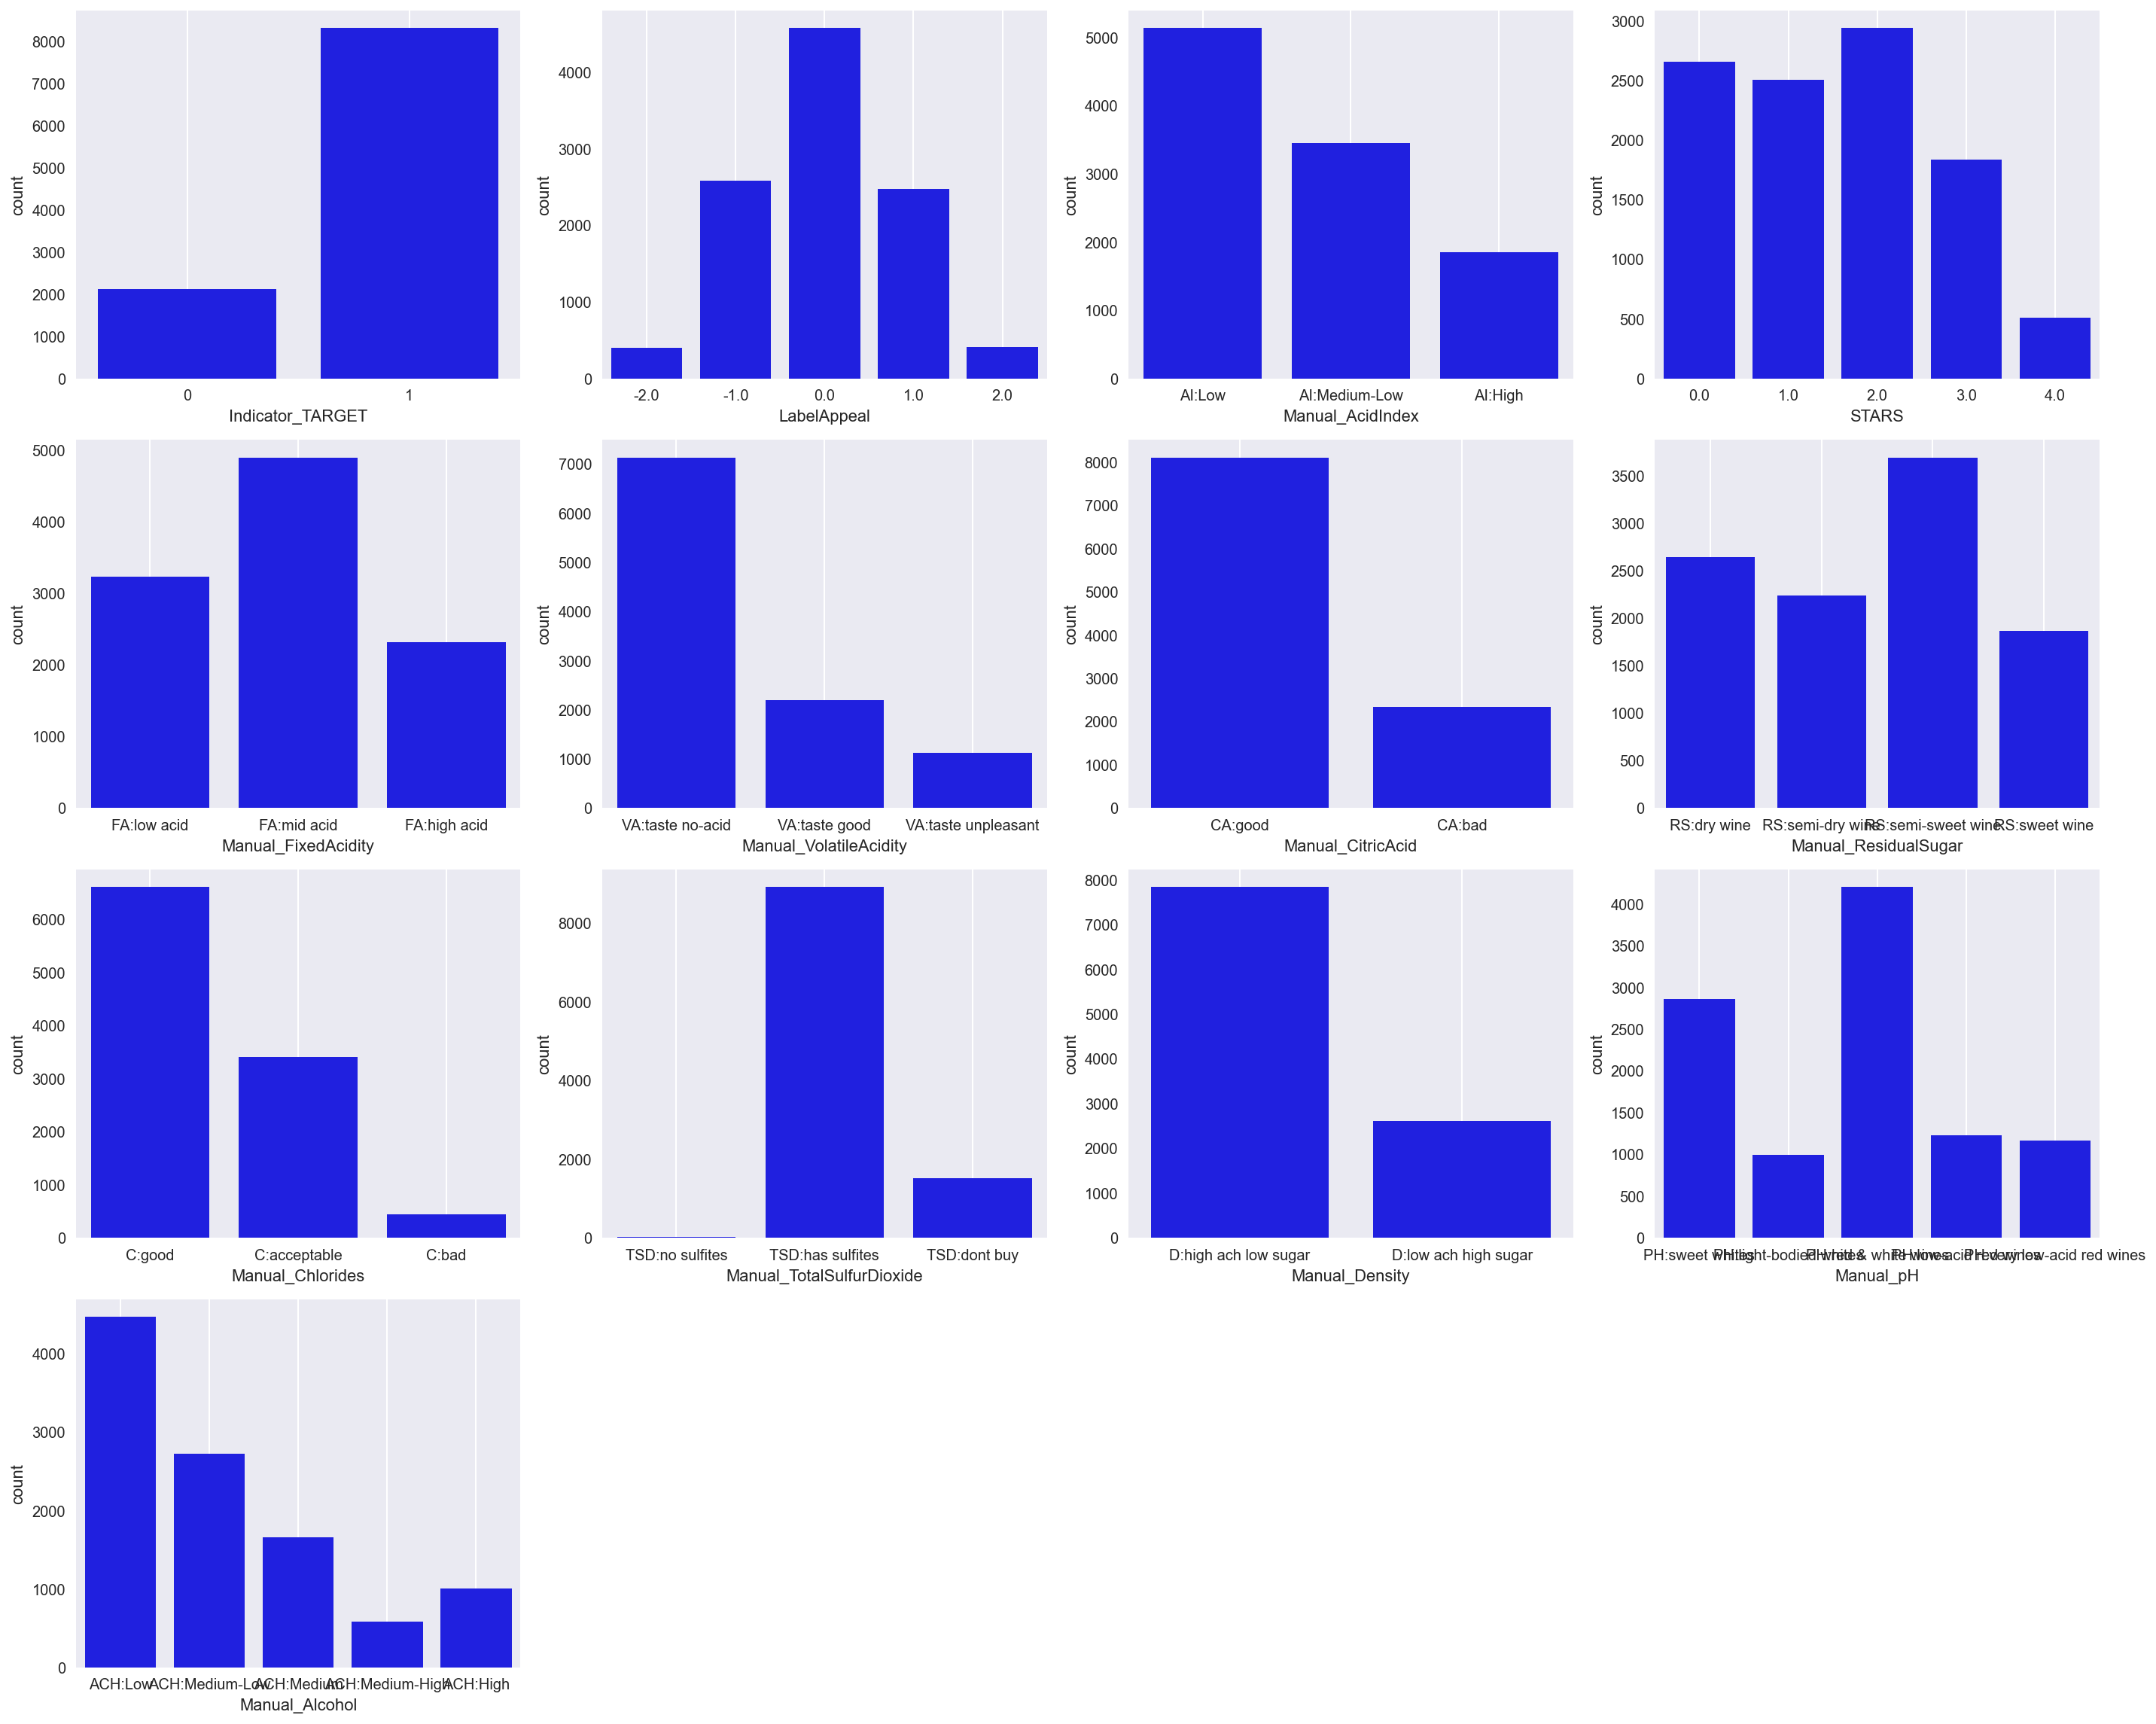

In [112]:
re_eda_df[['Indicator_TARGET']] = re_eda_df[['Indicator_TARGET']].astype("category")
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(['Indicator_TARGET'] + re_eda_cate_cols)):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=re_eda_df, color='blue')
    plt.grid()
    plt.tight_layout()

Next, I use bar charts to compare pairs of variables between Response and Explanatory

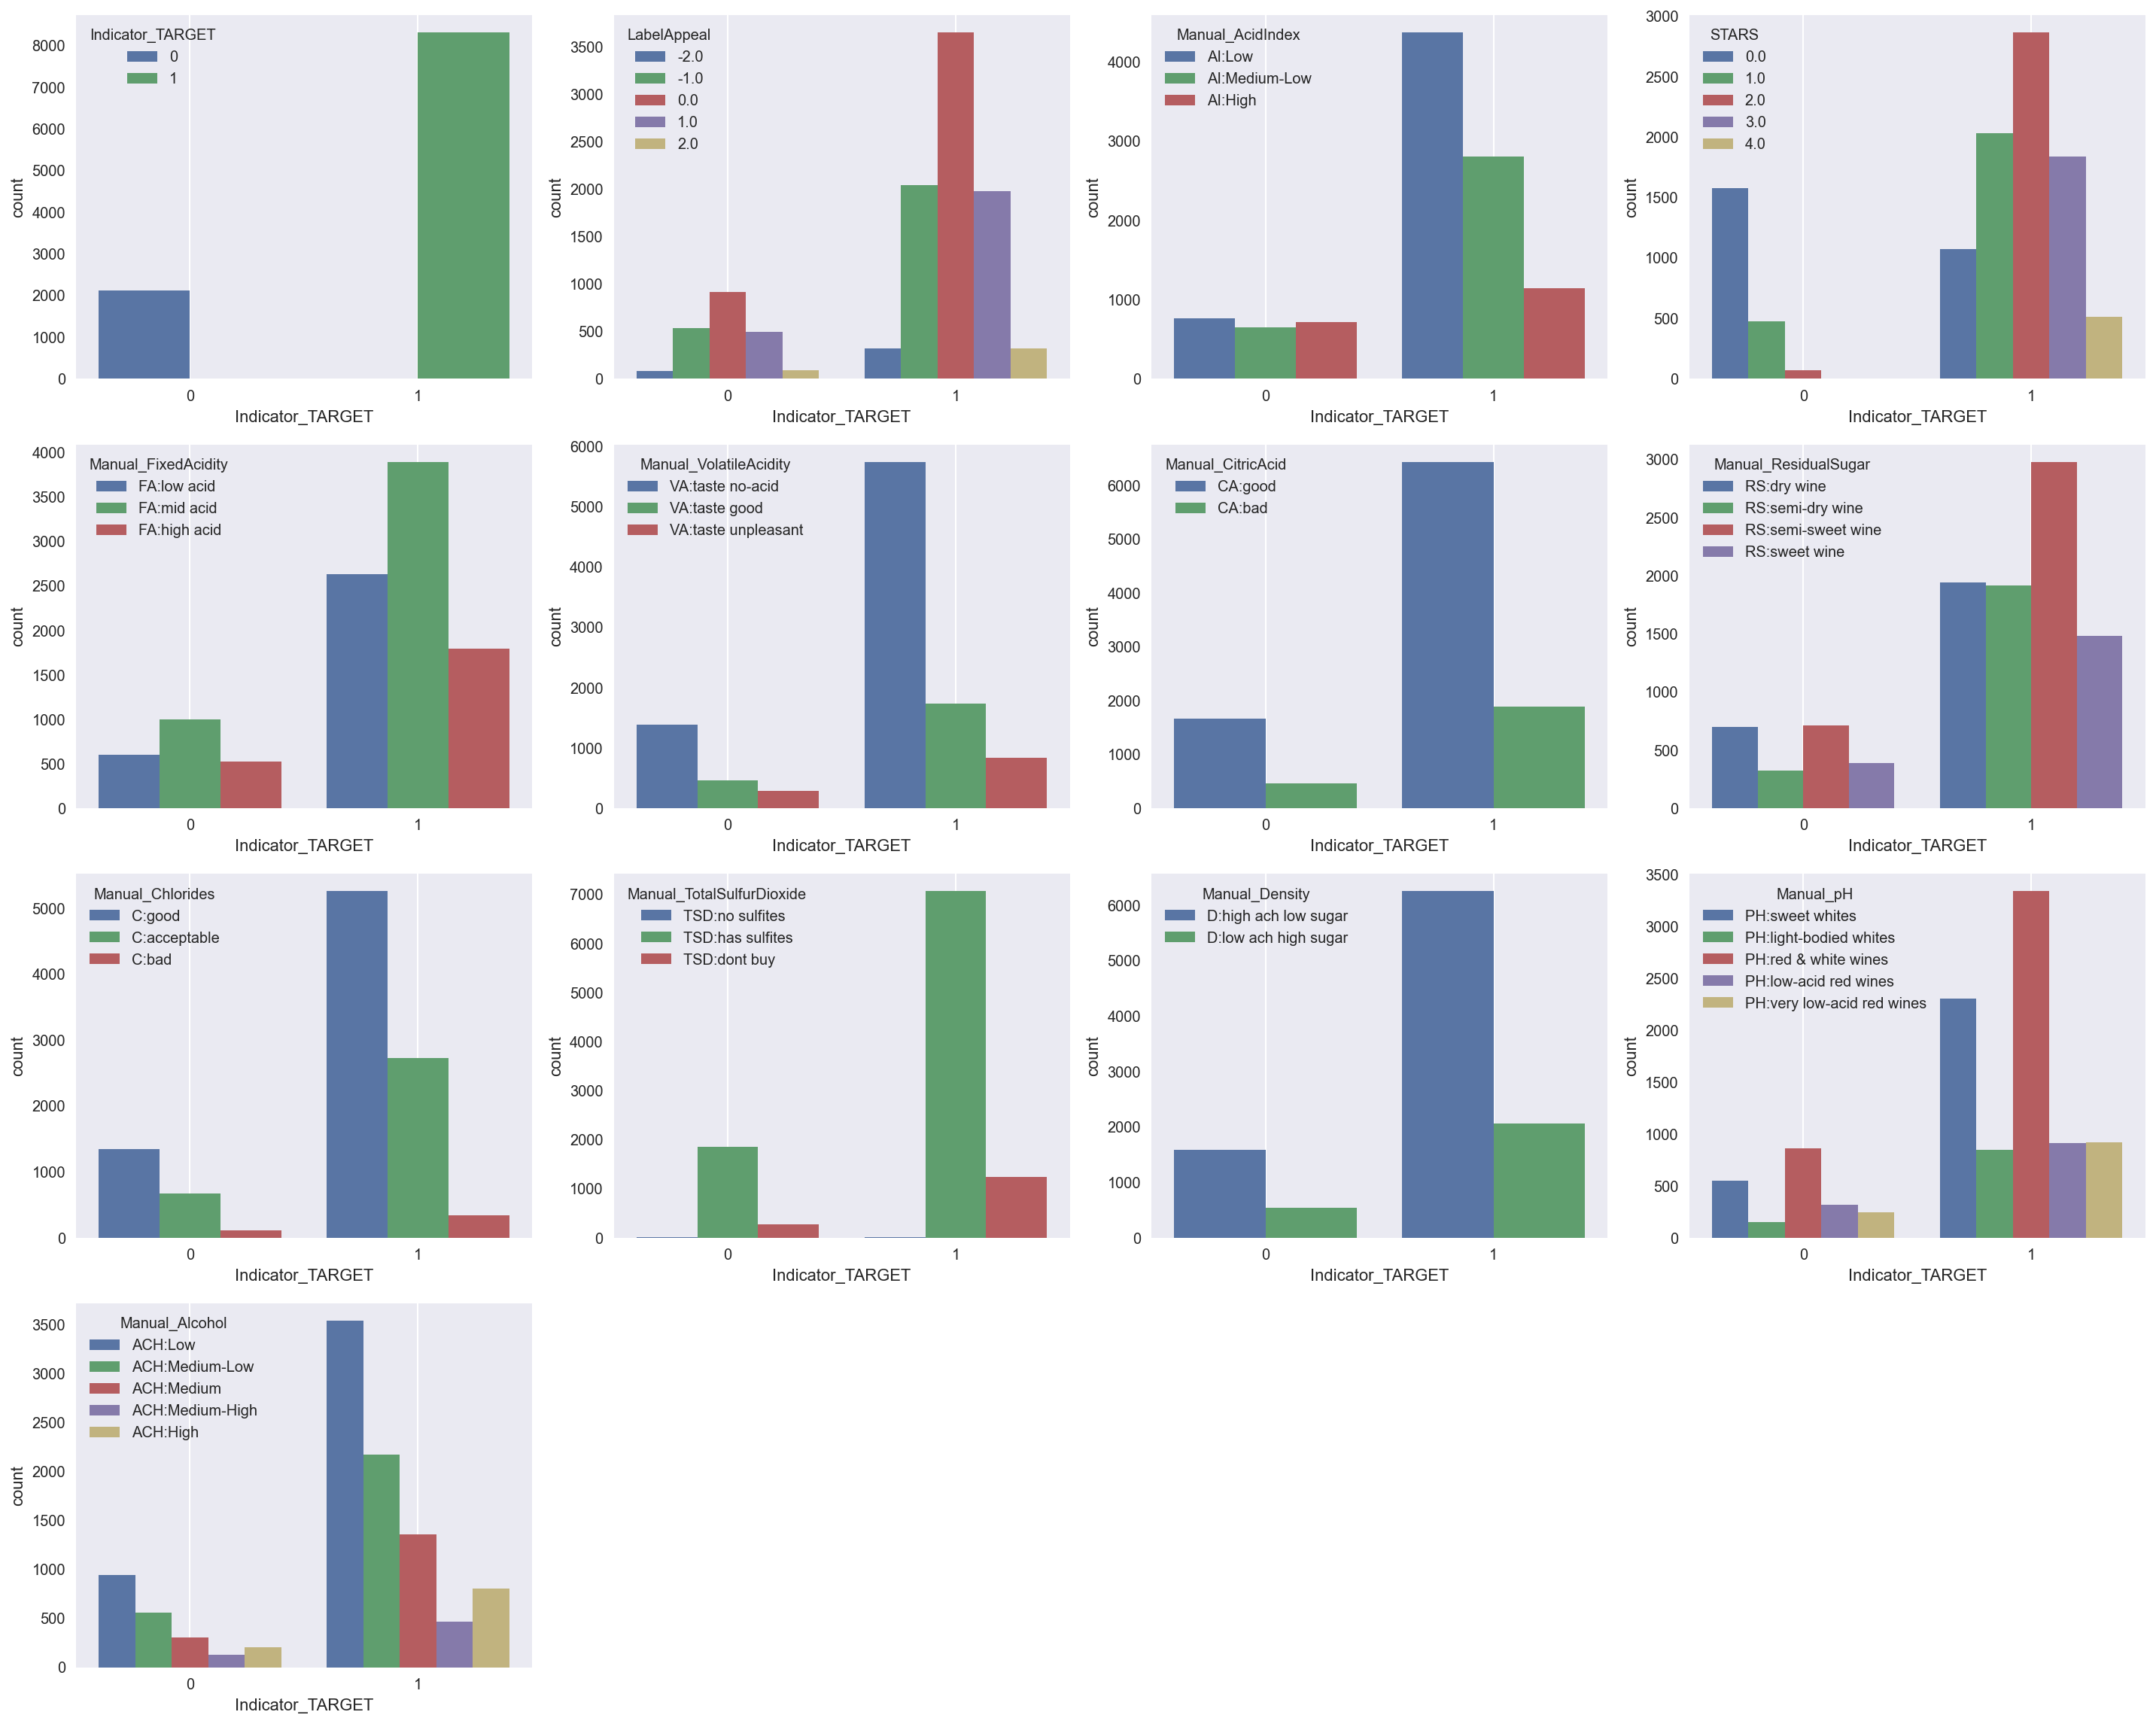

In [113]:
# To use bar charts to compare pairs of variables between Response and Explanatory
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(['Indicator_TARGET'] + re_eda_cate_cols)):
    plt.subplot(4, 4, i + 1)
    # sns.countplot(x=col, data=re_eda_df, color='blue')
    sns.countplot(x='Indicator_TARGET', hue=col, data=re_eda_df)
    plt.grid()
    plt.tight_layout()

From the above description and bar charts, one thing observed from the database was the Indicator_FixedAcidity has 2 categorical types with the same numbers. The TotalSulfurDioxide and CitricAcid have one value that accounts for most percentages.

The pair of TARGET and AcidIndex shows Low AcidIndex wines are sold well.

The pair of TARGET and STARS shows that Higher star ratings are associated with more cases purchased in cases where the wine was purchased at all.

The pair of TARGET and ResidualSugar shows dry wines are not sold well.

I will select LabelAppeal, STARS, Manual_Acidindex, Manual_ResidualSugar, and Manual_Alcohol to train the Logistic Regression.

### Summary of Re-EDA
Why do I decide to convert all numerical variables to categorical variables? Because the original variables are all skewed distribution, Linear Regression can not get a high accuracy result. After I did research on wines, I converted numerics to categories by the knowledge of wines. I also created a binary indicator as a response variable. Next, I will select Logistic Regression to predict whether a bottle of wine can sell out or not.

Although the numerical variable showed nearly normal distribution after processing Box-Cox and Standardization, the correlation values between response and explanatories are still very low. I can only select numerical variables showing normal distribution to train models.

I will select variables to train models.

Response: Indicator_TARGET

Explanatory: norm_stand_FixedAcidity, norm_stand_TotalSulfurDioxide, norm_stand_pH, LabelAppeal, STARS, Manual_Acidindex, Manual_ResidualSugar, and Manual_Alcohol to be explanatories.

# 6. Create and Select Features

#### Create features

In [114]:
# Copy a data set
wine_features_df = re_eda_df.copy()

In [115]:
wine_features_df.head(3)

,Indicator_TARGET,LabelAppeal,Manual_AcidIndex,STARS,Manual_FixedAcidity,Manual_VolatileAcidity,Manual_CitricAcid,Manual_ResidualSugar,Manual_Chlorides,Manual_TotalSulfurDioxide,...,norm_stand_VolatileAcidity,norm_stand_CitricAcid,norm_stand_ResidualSugar,norm_stand_Chlorides,norm_stand_FreeSulfurDioxide,norm_stand_TotalSulfurDioxide,norm_stand_Density,norm_stand_pH,norm_stand_Sulphates,norm_stand_Alcohol
0,1,0.0,AI:Medium-Low,2.0,FA:low acid,VA:taste good,CA:good,RS:sweet wine,C:acceptable,TSD:has sulfites,...,1.223087,0.730192,1.493548,1.830006,-0.296232,0.698464,-0.054447,0.233129,-0.309840,-0.075866
1,1,-1.0,AI:Low,3.0,FA:low acid,VA:taste no-acid,CA:good,RS:semi-sweet wine,C:acceptable,TSD:has sulfites,...,-0.989301,0.409034,0.474279,1.165193,-1.107908,1.055798,1.417054,0.312330,-0.081947,0.098052
3,1,-1.0,AI:Low,1.0,FA:low acid,VA:taste no-acid,CA:good,RS:semi-sweet wine,C:acceptable,TSD:has sulfites,...,-0.426840,-1.283834,0.127764,1.165193,-0.925940,-0.478514,0.096983,-1.623735,1.928831,-1.230106


In [116]:
# To convert the "0/1" to '0' = 0, '1' = 1 for Indicator_TARGET
wine_features_df['Indicator_TARGET'] = wine_features_df[['Indicator_TARGET']].astype("int")

In [117]:
wine_features_df.head(3)

,Indicator_TARGET,LabelAppeal,Manual_AcidIndex,STARS,Manual_FixedAcidity,Manual_VolatileAcidity,Manual_CitricAcid,Manual_ResidualSugar,Manual_Chlorides,Manual_TotalSulfurDioxide,...,norm_stand_VolatileAcidity,norm_stand_CitricAcid,norm_stand_ResidualSugar,norm_stand_Chlorides,norm_stand_FreeSulfurDioxide,norm_stand_TotalSulfurDioxide,norm_stand_Density,norm_stand_pH,norm_stand_Sulphates,norm_stand_Alcohol
0,1,0.0,AI:Medium-Low,2.0,FA:low acid,VA:taste good,CA:good,RS:sweet wine,C:acceptable,TSD:has sulfites,...,1.223087,0.730192,1.493548,1.830006,-0.296232,0.698464,-0.054447,0.233129,-0.309840,-0.075866
1,1,-1.0,AI:Low,3.0,FA:low acid,VA:taste no-acid,CA:good,RS:semi-sweet wine,C:acceptable,TSD:has sulfites,...,-0.989301,0.409034,0.474279,1.165193,-1.107908,1.055798,1.417054,0.312330,-0.081947,0.098052
3,1,-1.0,AI:Low,1.0,FA:low acid,VA:taste no-acid,CA:good,RS:semi-sweet wine,C:acceptable,TSD:has sulfites,...,-0.426840,-1.283834,0.127764,1.165193,-0.925940,-0.478514,0.096983,-1.623735,1.928831,-1.230106


#### Select features

Based on Re-run EDA, select the required fields

In [118]:
# select columns to train
wine_features_df = wine_features_df[['Indicator_TARGET', 'norm_stand_FixedAcidity', 
                                    'norm_stand_TotalSulfurDioxide', 'norm_stand_pH',
                                   'LabelAppeal', 'STARS', 'Manual_AcidIndex', 'Manual_ResidualSugar', 'Manual_Alcohol']].copy()

In [119]:
wine_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10447 entries, 0 to 12794
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Indicator_TARGET               10447 non-null  int32   
 1   norm_stand_FixedAcidity        10447 non-null  float64 
 2   norm_stand_TotalSulfurDioxide  10447 non-null  float64 
 3   norm_stand_pH                  10447 non-null  float64 
 4   LabelAppeal                    10447 non-null  category
 5   STARS                          10447 non-null  category
 6   Manual_AcidIndex               10447 non-null  category
 7   Manual_ResidualSugar           10447 non-null  category
 8   Manual_Alcohol                 10447 non-null  category
dtypes: category(5), float64(3), int32(1)
memory usage: 739.2 KB


# 7. Logistic Regression Model

### 7.1 Split train set and test set

In [120]:
def split_df(model_df, response_name):
    # move the response variable (in this case "curb-weight") to a separate variable
    y = model_df[response_name]
    
    # If you want to preserve the original dataframe in its entirety, make a copy of the original dataframe 
    # so that the original is preserved
    X = model_df.copy()
    
    # now drop the ArrDelay column from 'X' so that the response variable is removed from the explanatory variables
    X.drop(response_name, axis=1, inplace=True)
    
    # Now split the data into training and testing subsets. 
    # We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
    # if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
    
    # Let's check the results
    # print(len(X_train), len(X_test))
    
    return X_train, X_test, y_train, y_test

In [121]:
wine_features_df.head(3)

,Indicator_TARGET,norm_stand_FixedAcidity,norm_stand_TotalSulfurDioxide,norm_stand_pH,LabelAppeal,STARS,Manual_AcidIndex,Manual_ResidualSugar,Manual_Alcohol
0,1,-1.046448,0.698464,0.233129,0.0,2.0,AI:Medium-Low,RS:sweet wine,ACH:Low
1,1,-0.662606,1.055798,0.312330,-1.0,3.0,AI:Low,RS:semi-sweet wine,ACH:Medium-Low
3,1,-0.347002,-0.478514,-1.623735,-1.0,1.0,AI:Low,RS:semi-sweet wine,ACH:Low


In [122]:
# Test split function
X_train, X_test, y_train, y_test = split_df(wine_features_df, 'Indicator_TARGET')

In [123]:
# Check
X_train.head(3)

,norm_stand_FixedAcidity,norm_stand_TotalSulfurDioxide,norm_stand_pH,LabelAppeal,STARS,Manual_AcidIndex,Manual_ResidualSugar,Manual_Alcohol
44,-0.322030,0.066773,1.065763,0.0,1.0,AI:Low,RS:semi-sweet wine,ACH:Low
141,-1.654035,0.262989,0.073343,0.0,0.0,AI:Medium-Low,RS:semi-dry wine,ACH:Medium
1902,-0.272631,-0.301134,2.616120,0.0,0.0,AI:Low,RS:dry wine,ACH:Medium-High


In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7312 entries, 44 to 7106
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   norm_stand_FixedAcidity        7312 non-null   float64 
 1   norm_stand_TotalSulfurDioxide  7312 non-null   float64 
 2   norm_stand_pH                  7312 non-null   float64 
 3   LabelAppeal                    7312 non-null   category
 4   STARS                          7312 non-null   category
 5   Manual_AcidIndex               7312 non-null   category
 6   Manual_ResidualSugar           7312 non-null   category
 7   Manual_Alcohol                 7312 non-null   category
dtypes: category(5), float64(3)
memory usage: 265.1 KB


I will check whether the number of types for the Response variable is balanced or not. If the binary response variable is imbalanced, I will use an up-sample to make them balanced.

In [125]:
# show the Indicator_TARGET with bar plot
y_train.value_counts()

1    5814
0    1498
Name: Indicator_TARGET, dtype: int64

It is imbalanced response. I will use upsample to sovle the problem of imbalance.

### 7.2 Solve Imbalanced train set

The response variable is imbalanced, I will use SMOTENC to make it being balanced.

In [126]:
# import lib
from imblearn.over_sampling import SMOTENC

# [11, 13] are indexs of ['STARS', 'LabelAppeal']
smote_nc = SMOTENC(categorical_features=[3,4,5,6,7], random_state=13)
X_smo, y_smo = smote_nc.fit_sample(X_train, y_train)

In [127]:
# check data
X_smo.head(3)

,norm_stand_FixedAcidity,norm_stand_TotalSulfurDioxide,norm_stand_pH,LabelAppeal,STARS,Manual_AcidIndex,Manual_ResidualSugar,Manual_Alcohol
0,-0.322030,0.066773,1.065763,0.0,1.0,AI:Low,RS:semi-sweet wine,ACH:Low
1,-1.654035,0.262989,0.073343,0.0,0.0,AI:Medium-Low,RS:semi-dry wine,ACH:Medium
2,-0.272631,-0.301134,2.616120,0.0,0.0,AI:Low,RS:dry wine,ACH:Medium-High


In [128]:
# Check the number of two types for Response variable
y_smo.value_counts()

1    5814
0    5814
Name: Indicator_TARGET, dtype: int64

The train set is balanced now

In [129]:
# Concat X and y
xy_smo = pd.concat([X_smo, y_smo], axis=1)

In [130]:
# Show statistic of the two categories
xy_smo[['LabelAppeal', 'STARS']].describe()

,LabelAppeal,STARS
count,11628.0,11628.0
unique,5.0,5.0
top,0.0,0.0
freq,5435.0,5496.0


### 7.3 Using Logistic Regression to predict response variable.

In [131]:
# Dummy the categorival variables
X_dummy_smo = pd.get_dummies(X_smo)

In [132]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
result = lr.fit(X_dummy_smo, y_smo)
result

LogisticRegression(max_iter=1000)

In [133]:
print("The socre of train set is {}".format(lr.score(X_dummy_smo, y_smo)))

The socre of train set is 0.8536291709666323


In [134]:
X_test_dummy = pd.get_dummies(X_test)
print("The socre of test set is {}".format(lr.score(X_test_dummy,y_test)))

The socre of test set is 0.8226475279106858


By the simplest test, the Logistic Regression gets an acceptable score.

Next, I will use other models and cross-validate to check the data set. But, they are not requirements for this assignment.

# 8. Conclusion

### What did I do?

- The original data set has 1 response variable and 14 explanatory variables. They are all numeric type. They all have many Null values and outliers. The distribution of them are all skewed distribution.


- In Data Preparation. 
  - I processed duplicated data.
  - I filled Null values by mean, median, 0 and KNN to fill.
  - I dropped outliers that large than (mean + 3 * std).
  - I convert all numeric variables into categorical variables by learned domain knowledge.
  - I create an indicator response variable.
  - I do the up-sample to solve the imbalanced response variable. 


- In Re-EDA
  - I explor the data set that are all created categorical variables again.
  
  
- In Logistic Regression Model
  - I just used a Logistic Regression Model to test my data set, it is not strictness.
  

### What did I learn?

- To study domain knowledge is usefull.
- The Discretization/Binning can help solve that data are not the normal distribution.
- Imbalanced response variable should be processed to be balanced.
- BOX-COX can convert skewed distribution to nearly normal distribution.
- There are many ways to impute missing data. We should compare them when we prepare data.


### The part can be promoted
- I should compare two methods with statistic, not only compare Standard Deviation and Mean of them.
- How to show the evoluationary process effectively and clearly needs to be considered.

# 9. Reference

- scikit-learn.org. The User Guide. [online] Available at https://scikit-learn.org/stable/user_guide.html [Accessed 18 September 2021].

- wikipedia.org. Data binning. [online] Available at https://en.wikipedia.org/wiki/Data_binning [Accessed 18 September 2021].

- medium.com. A Guide To KNN Imputation. [online] Available at https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e [Accessed 18 September 2021].

- analyticsvidhya.com. KNN Imputation. [online] Available at https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/ [Accessed 18 September 2021].

- ncbi.nlm.nih.gov. Random Forest Missing Data Algorithms. [online] Available at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5796790/ [Accessed 18 September 2021].

- vitalflux.com. Handling class imbalance. [online] Available at https://vitalflux.com/handling-class-imbalance-sklearn-resample-python/ [Accessed 18 September 2021].

- pbpython.com. Pandas cut vs qcut. [online] Available at https://pbpython.com/pandas-qcut-cut.html [Accessed 18 September 2021].

- biomedcentral.com. Accuracy of random-forest-based imputation of missing data. [online] Available at https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-020-01080-1 [Accessed 18 September 2021].

- machinelearningmastery.com. How to Use Discretization Transforms for Machine Learning. [online] Available at 
https://machinelearningmastery.com/discretization-transforms-for-machine-learning/ [Accessed 18 September 2021].

- jamesrledoux.com. Impute Missing Values. [online] Available at 
https://jamesrledoux.com/code/imputation [Accessed 18 September 2021].


